In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from plotnine import *



A continuación vamos a trabajar con un dataset de Spotify, que entrenaremos y nos servirá para aplicar el modelo de clasificación de géneros obtenido a un dataset del que queremos predecir/clasificar los géneros de más de 1.200.000 canciones.

In [178]:
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
df_spotify = pd.read_csv('spotify_all_genres_tracks.csv')
df_spotify

track_id  \
0     4Gia17DzXBhYFbYiJj6SyW   
1     1BjYNhg7JhVfQdxqEThBwn   
2     2Cg3GUkhjX96nO4p2WRlIa   
3     5bC6ONDsL88snGN6QasjZH   
4     2TKykeHeVKsBqZC8M3SKcN   
...                      ...   
9193  2oGYxgu2ztDaf64of4edww   
9194  2TbbgHiwZVjErsxkTm63Lh   
9195  0Rwl08UX8lNW6Cn8eb068P   
9196  1M33B7EKfhIx3xtEYjnoKz   
9197  71be9NipmFf3zj0qTCXQJf   

                                           playlist_url        playlist_name  \
0     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
1     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
2     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
3     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
4     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
...                                                 ...                  ...   
9193  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9194  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9195  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9196  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9197  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   

                         track_name  track_popularity  \
0                       Working Man                51   
1                     Long Way Home                38   
2                 She's A Sweet One                49   
3                           Help Me                59   
4           Take Out Some Insurance                51   
...                             ...               ...   
9193            Walking with Clouds                17   
9194                  Start To Move                23   
9195  Take Me Away - Truncate Remix                 7   
9196                          Funny                24   
9197            Liquid Slow - Mixed                35   

                     artist_name  \
0                      Otis Rush   
1     Clarence "Gatemouth" Brown   
2                   Junior Wells   
3        Sonny Boy Williamson II   
4                     Jimmy Reed   
...                          ...   
9193                Transllusion   
9194                Oscar Mulero   
9195                     DJ 3000   
9196                     Mr. De'   
9197               Chris Liebing   

                                                  album  \
0                               Mourning In The Morning   
1                                         Long Way Home   
2     Calling All Blues - The Chief, Profile & USA R...   
3                                  More Real Folk Blues   
4                                     Rockin' With Reed   
...                                                 ...   
9193                   The Opening of the Cerebral Gate   
9194                                          Mannequin   
9195                                       Take Me Away   
9196                                Follow the Leader 4   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)   

                                            album_cover  \
0     https://i.scdn.co/image/ab67616d0000b273fea221...   
1     https://i.scdn.co/image/ab67616d0000b2730e1f13...   
2     https://i.scdn.co/image/ab67616d0000b27399b18c...   
3     https://i.scdn.co/image/ab67616d0000b273b48c81...   
4     https://i.scdn.co/image/ab67616d0000b2739b7573...   
...                                                 ...   
9193  https://i.scdn.co/image/ab67616d0000b2730c430e...   
9194  https://i.scdn.co/image/ab67616d0000b273abfdcb...   
9195  https://i.scdn.co/image/ab67616d0000b273371dce...   
9196  https://i.scdn.co/image/ab67616d0000b273ba561d...   
9197  https://i.scdn.co/image/ab67616d0000b273e23812...   

                                          artist_genres  artist_popularity  \
0     ['blues', 'blues rock', 'chicago blues', 'elec...     

In [179]:
df_spotify.columns

Index(['track_id', 'playlist_url', 'playlist_name', 'track_name',
       'track_popularity', 'artist_name', 'album', 'album_cover',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

Eliminamos las columnas que no vamos a necesitar:

In [180]:
df_spotify_cleaned = df_spotify.drop(['track_id', 'playlist_url', 'playlist_name','track_popularity',
                                   'album_cover','artist_genres','artist_popularity'], axis=1)
df_spotify_cleaned

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[9198 rows x 17 columns]

In [ ]:
Vemos cuantos registros hay por cada género de nuestro dataset:

In [181]:
# Recuento de valores para cada género
recuento_generos = df_spotify_cleaned['genre'].value_counts()

print(recuento_generos)

electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: genre, dtype: int64


Comprobamos los tipos de variables y datos que tenemos:

In [182]:
df_spotify_cleaned.dtypes

track_name           object
artist_name          object
album                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

Nuestra variable objetivo será el género ('genre'). Hacemos conversión de 'object' a 'category':

In [183]:
df_spotify_cleaned['genre'] = df_spotify_cleaned['genre'].astype('category')

Vemos si hay valores nulos:

In [184]:
df_spotify_cleaned.isnull().sum()

track_name          0
artist_name         0
album               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

Comprobamos si hay canciones duplicadas:

In [185]:
duplicated_songs = df_spotify_cleaned[df_spotify_cleaned.duplicated('track_name', keep=False)]


print("Canciones duplicadas por artista:")
print(duplicated_songs[['track_name', 'artist_name']])

Canciones duplicadas por artista:
                 track_name              artist_name
3                   Help Me  Sonny Boy Williamson II
5         The Sky Is Crying             Elmore James
6             All Your Love                Magic Sam
9     I Can't Quit You Baby             Willie Dixon
13         Wang Dang Doodle              Koko Taylor
...                     ...                      ...
9079            Think Twice             Claude Young
9101            The Warning              Dark Energy
9105         Collard Greens                 Mad Mike
9156            Black Water               Octave One
9171            The Warning          Suburban Knight

[1206 rows x 2 columns]


Hacemos conteo de duplicados:

In [186]:
duplicated_count = df_spotify_cleaned['track_name'].value_counts()

# Filtramos solo las que tienen más de una ocurrencia (duplicados)
duplicates_count = duplicated_count[duplicated_count > 1]

print("Conteo de TrackName Duplicados:")
duplicates_count

Conteo de TrackName Duplicados:


Stardust                    7
Summertime                  5
Body And Soul               5
Sweet Home Chicago          5
There Is No Greater Love    5
                           ..
September In The Rain       2
April In Paris              2
Rollin' And Tumblin'        2
Night And Day               2
Bang Bang                   2
Name: track_name, Length: 538, dtype: int64

Eliminamos duplicados:

In [187]:
df_spotify_final = df_spotify_cleaned.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')


print("DataFrame final sin duplicados:")
df_spotify_final

DataFrame final sin duplicados:


track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

Reseteamos el índice del dataset resultante:

In [188]:
df_spotify_final = df_spotify_final.reset_index(drop=True)
df_spotify_final

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
8977            Walking with Clouds                Transllusion   
8978                  Start To Move                Oscar Mulero   
8979  Take Me Away - Truncate Remix                     DJ 3000   
8980                          Funny                     Mr. De'   
8981            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
8977                   The Opening of the Cerebral Gate          0.78    0.64   
8978                                          Mannequin          0.72    0.83   
8979                                       Take Me Away          0.72    0.65   
8980                                Follow the Leader 4          0.76    0.45   
8981        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
8977    1     -9.45     1         0.05          0.00              0.76   
8978    1     -9.15     1         0.11          0.01              0.94   
8979    9    -11.22     0         0.05          0.00              0.94   
8980    1    -10.23     0         0.07          0.03              0.86   
8981    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
8977      0.11     0.23 135.34       212160               4  electronic  
8978      0.12     0.42 133.99       317483               3  electronic  
8979      0.12     0.18 130.01       355586               4  electronic  
8980      0.11     0.69 148.00       236333               4  electronic  
8981      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

In [189]:
df_spotify_final.describe()

danceability  energy     key  loudness    mode  speechiness  \
count       8982.00 8982.00 8982.00   8982.00 8982.00      8982.00   
mean           0.60    0.54    5.37    -10.68    0.60         0.08   
std            0.19    0.27    3.56      6.54    0.49         0.08   
min            0.00    0.00    0.00    -47.00    0.00         0.00   
25%            0.47    0.34    2.00    -13.20    0.00         0.04   
50%            0.62    0.58    6.00     -8.75    1.00         0.05   
75%            0.74    0.76    8.00     -6.13    1.00         0.09   
max            0.98    1.00   11.00      1.34    1.00         0.83   

       acousticness  instrumentalness  liveness  valence   tempo  duration_ms  \
count       8982.00           8982.00   8982.00  8982.00 8982.00      8982.00   
mean           0.36              0.23      0.17     0.50  116.67    253183.75   
std            0.37              0.35      0.14     0.27   29.17    101287.96   
min            0.00              0.00      0.02     0.00    0.00     30333.00   
25%            0.03              0.00      0.09     0.28   94.02    189936.50   
50%            0.19              0.00      0.12     0.52  117.99    228353.50   
75%            0.73              0.46      0.20     0.72  132.70    286357.00   
max            1.00              0.98      0.98     0.99  216.09   1430840.00   

       time_signature  
count         8982.00  
mean             3.90  
std              0.40  
min              0.00  
25%              4.00  
50%              4.00  
75%              4.00  
max              5.00

Visualizamos matriz de correlaciones de las variables del dataset, con mapa de calor:

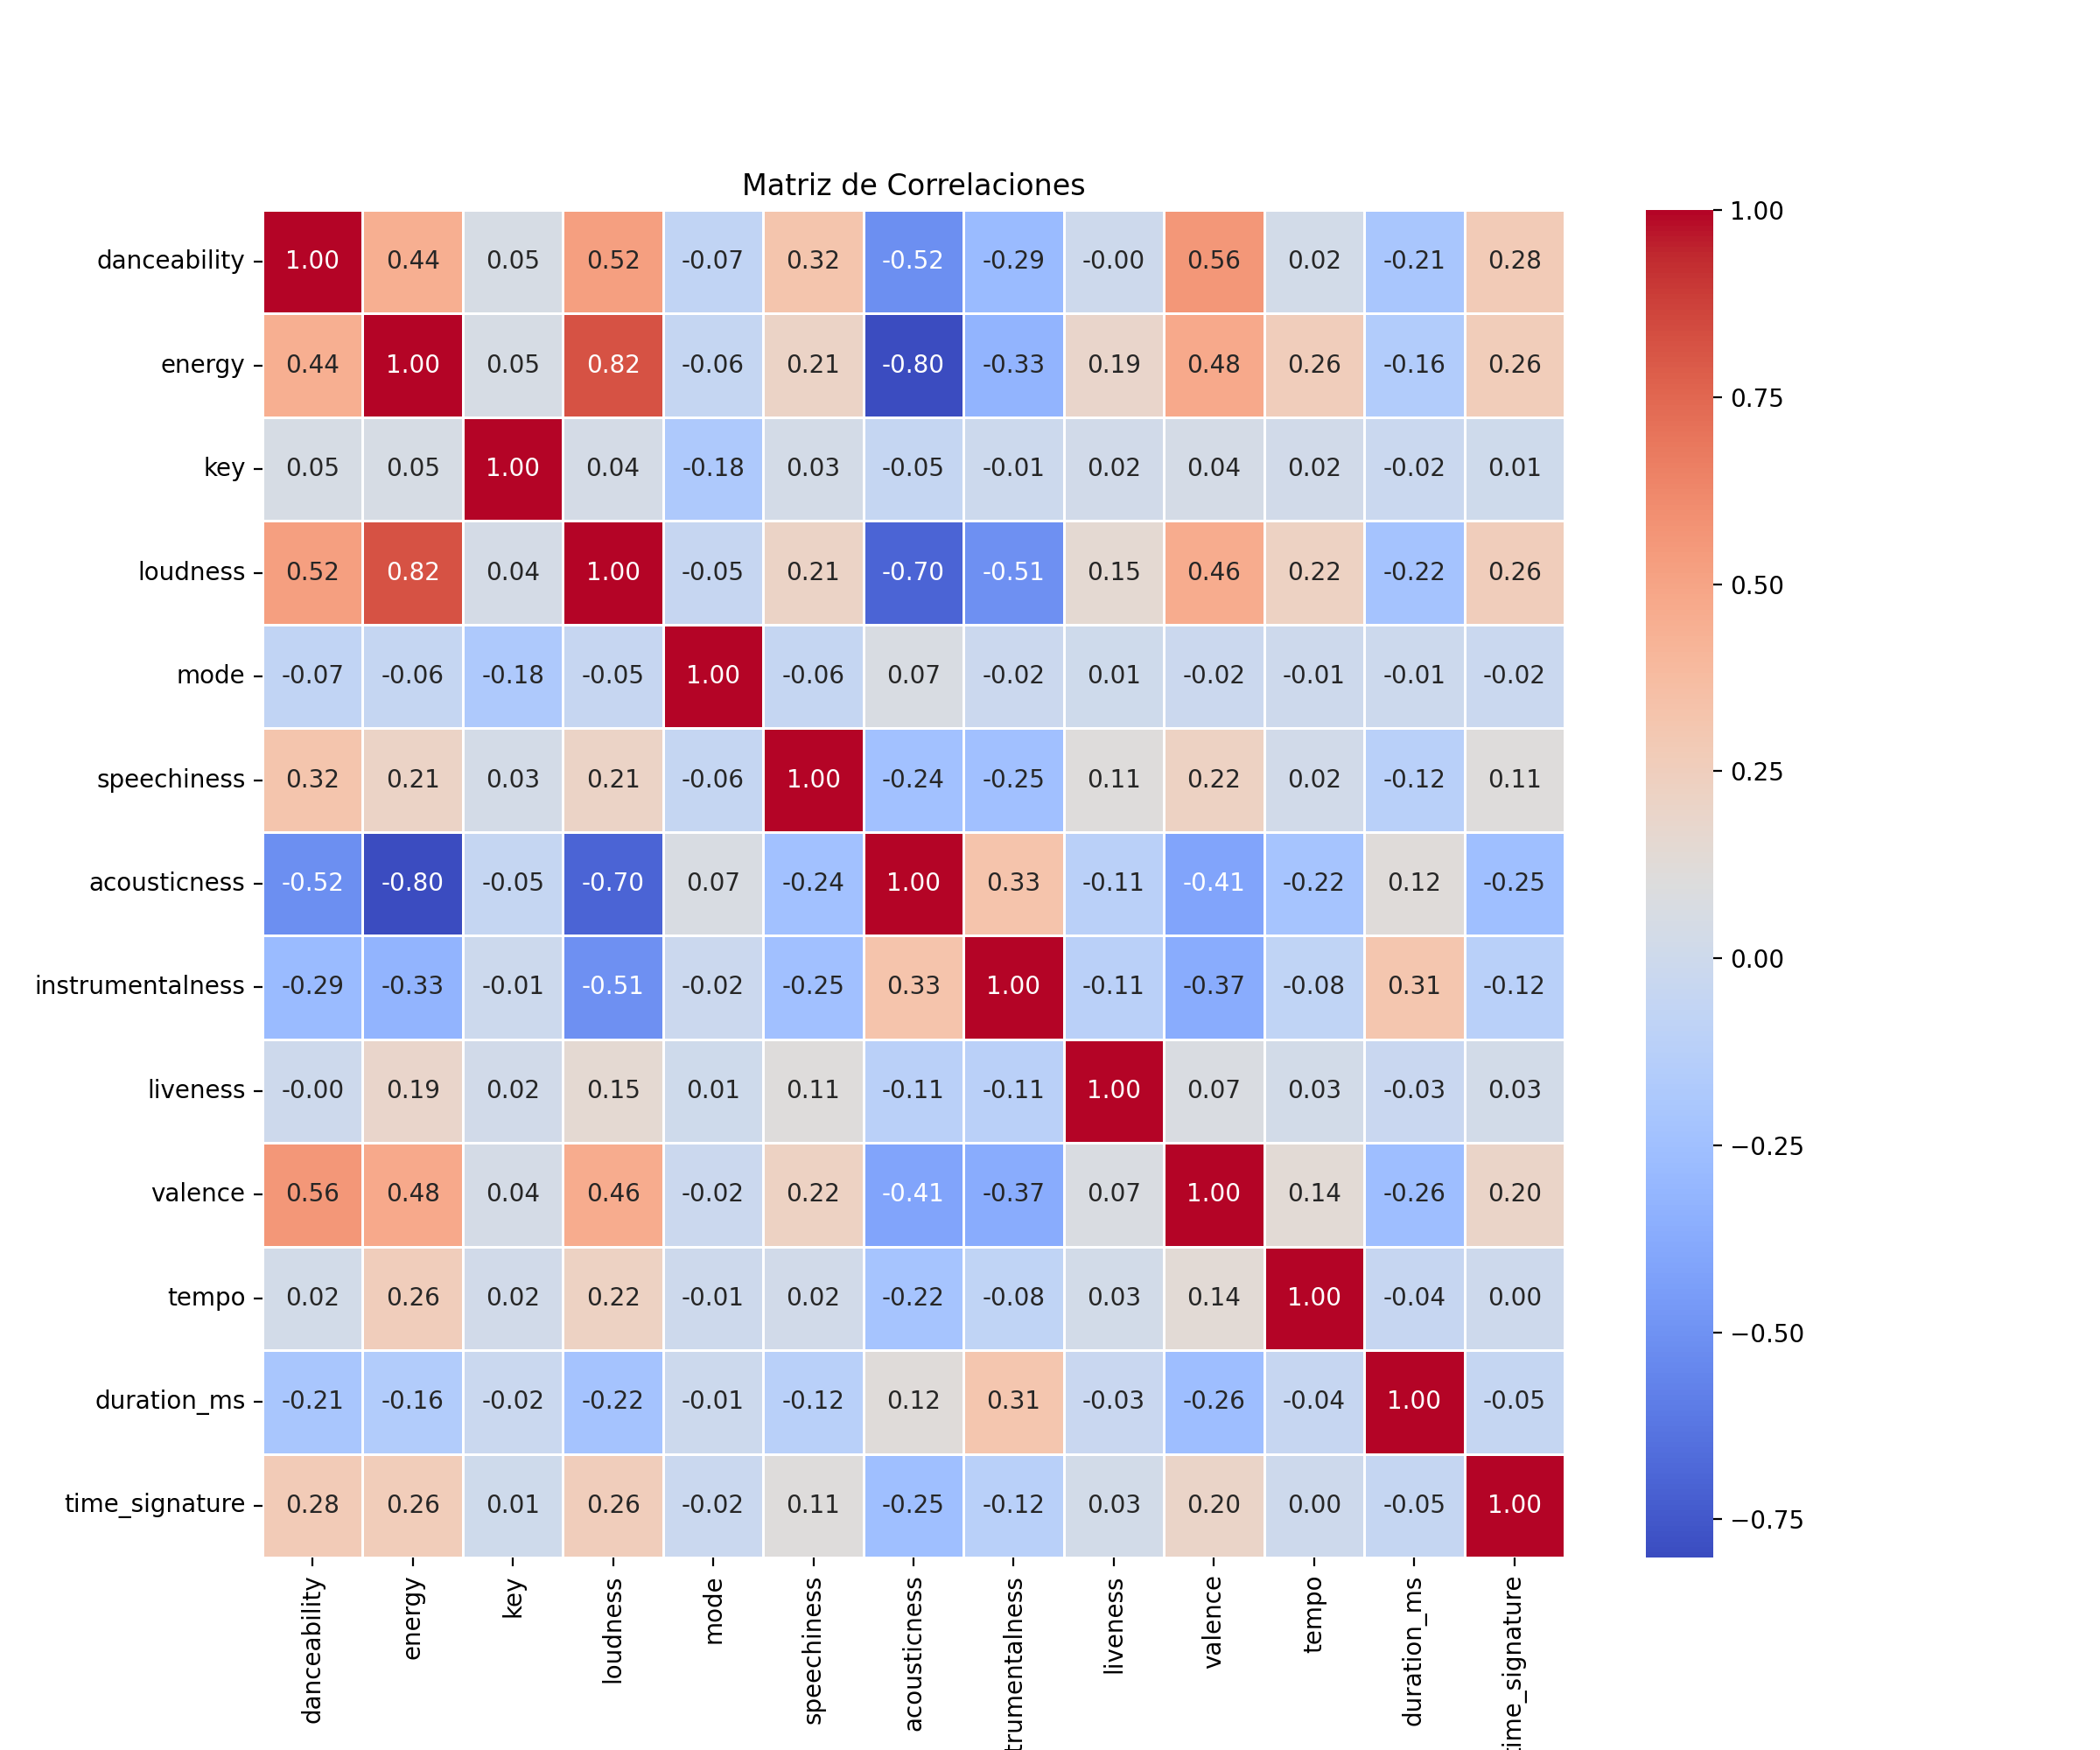

In [190]:
# Filtramos solo columnas de tipo int64 y float64
numeric_columns = df_spotify_final.select_dtypes(include=['int64', 'float64'])

# matriz de correlaciones
correlation_matrix = numeric_columns.corr()

#  mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlaciones")
plt.show()

In [191]:
df_features = df_spotify_final.drop(['track_name', 'artist_name', 'album', 'mode', 'key'], axis=1)
df_features

danceability  energy  loudness  speechiness  acousticness  \
0             0.63    0.62    -10.95         0.04          0.49   
1             0.73    0.05    -22.56         0.04          0.91   
2             0.70    0.48    -12.21         0.05          0.15   
3             0.74    0.44     -9.62         0.04          0.60   
4             0.75    0.29    -14.44         0.05          0.66   
...            ...     ...       ...          ...           ...   
8977          0.78    0.64     -9.45         0.05          0.00   
8978          0.72    0.83     -9.15         0.11          0.01   
8979          0.72    0.65    -11.22         0.05          0.00   
8980          0.76    0.45    -10.23         0.07          0.03   
8981          0.68    0.57    -15.71         0.04          0.01   

      instrumentalness  liveness  valence  tempo  duration_ms  time_signature  \
0                 0.00      0.20     0.84 103.36       147800               4   
1                 0.05      0.12     0.42  78.03       338333               4   
2                 0.03      0.20     0.71 122.86       181786               4   
3                 0.02      0.61     0.77 114.22       188200               4   
4                 0.00      0.12     0.57 111.33       143332               4   
...                ...       ...      ...    ...          ...             ...   
8977              0.76      0.11     0.23 135.34       212160               4   
8978              0.94      0.12     0.42 133.99       317483               3   
8979              0.94      0.12     0.18 130.01       355586               4   
8980              0.86      0.11     0.69 148.00       236333               4   
8981              0.90      0.12     0.41 134.77       335063               4   

           genre  
0          blues  
1          blues  
2          blues  
3          blues  
4          blues  
...          ...  
8977  electronic  
8978  electronic  
8979  electronic  
8980  electronic  
8981  electronic  

[8982 rows x 12 columns]

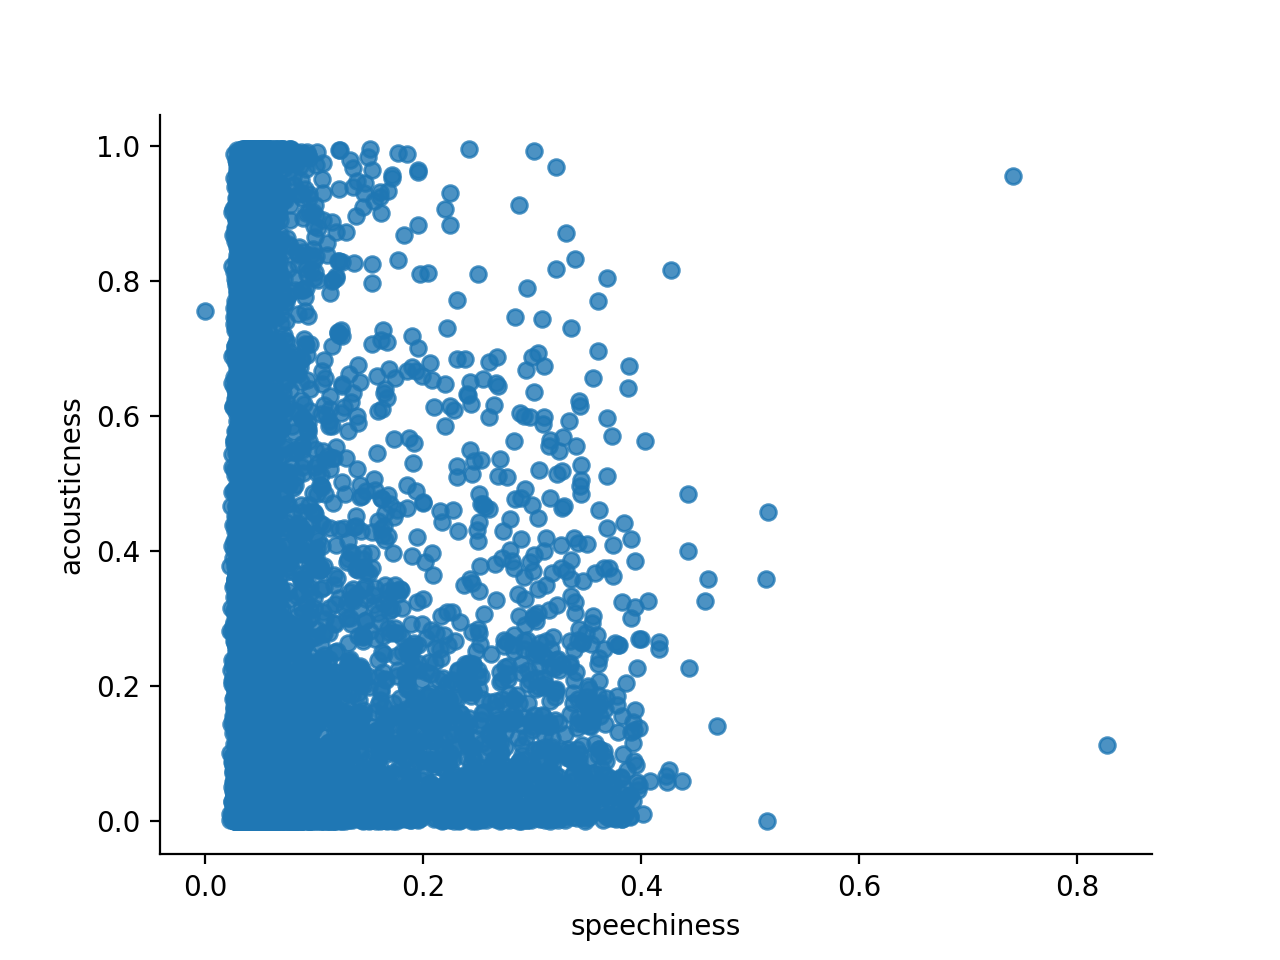

In [192]:
# @title speechiness vs acousticness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='speechiness', y='acousticness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

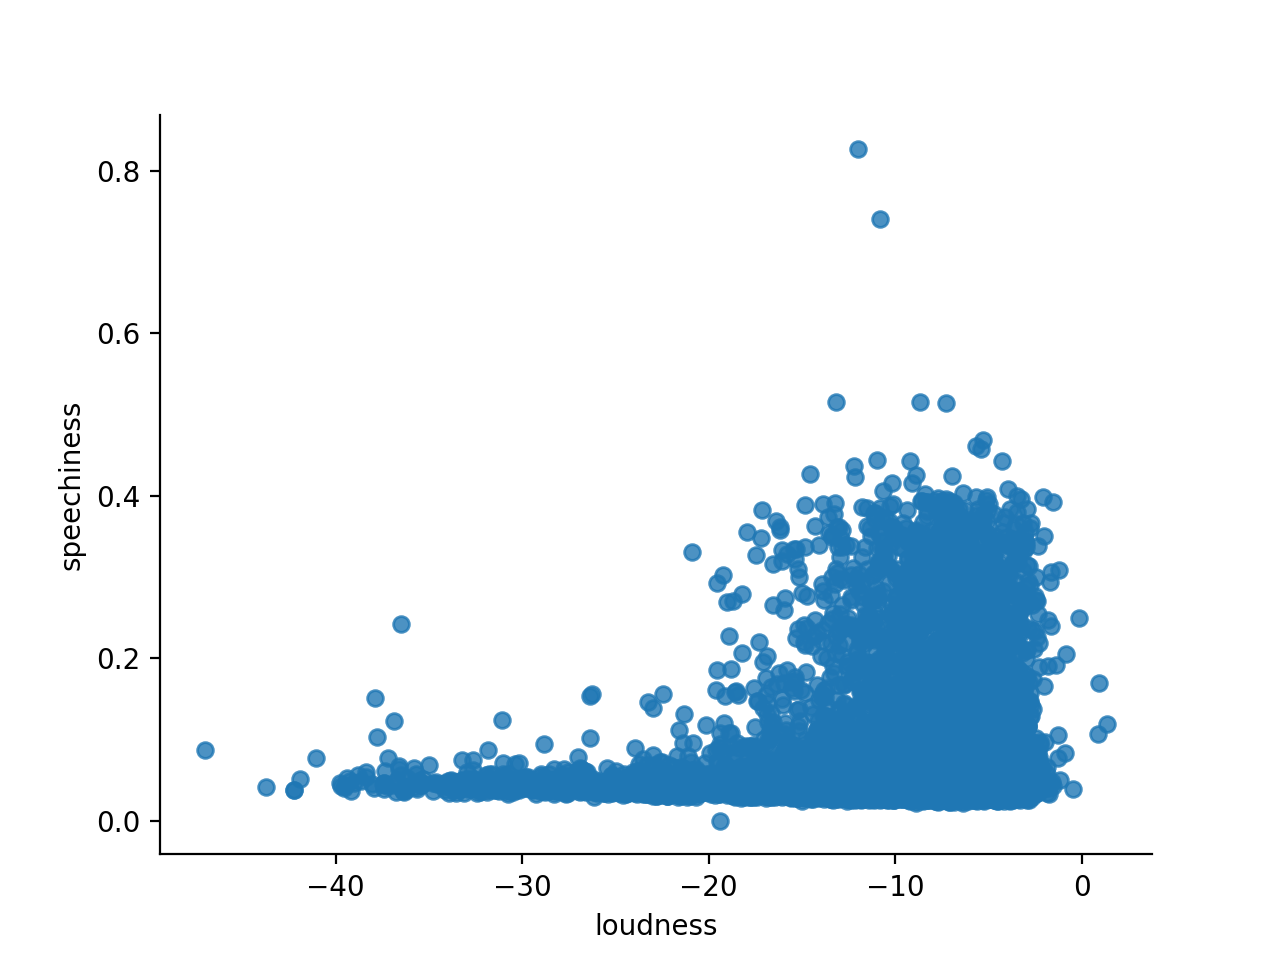

In [193]:
# @title loudness vs speechiness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='loudness', y='speechiness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

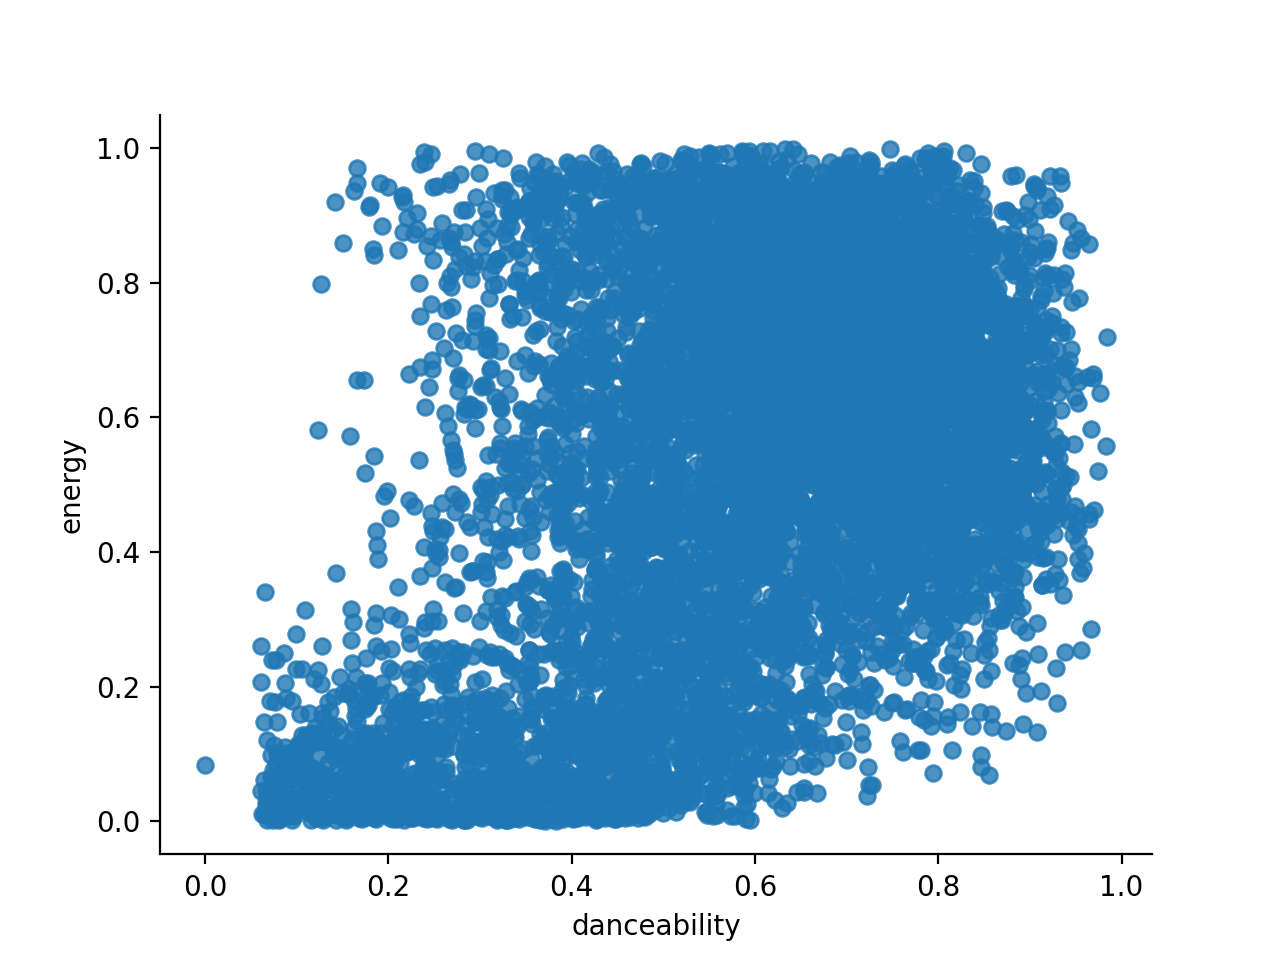

In [194]:
# @title danceability vs energy

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='danceability', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

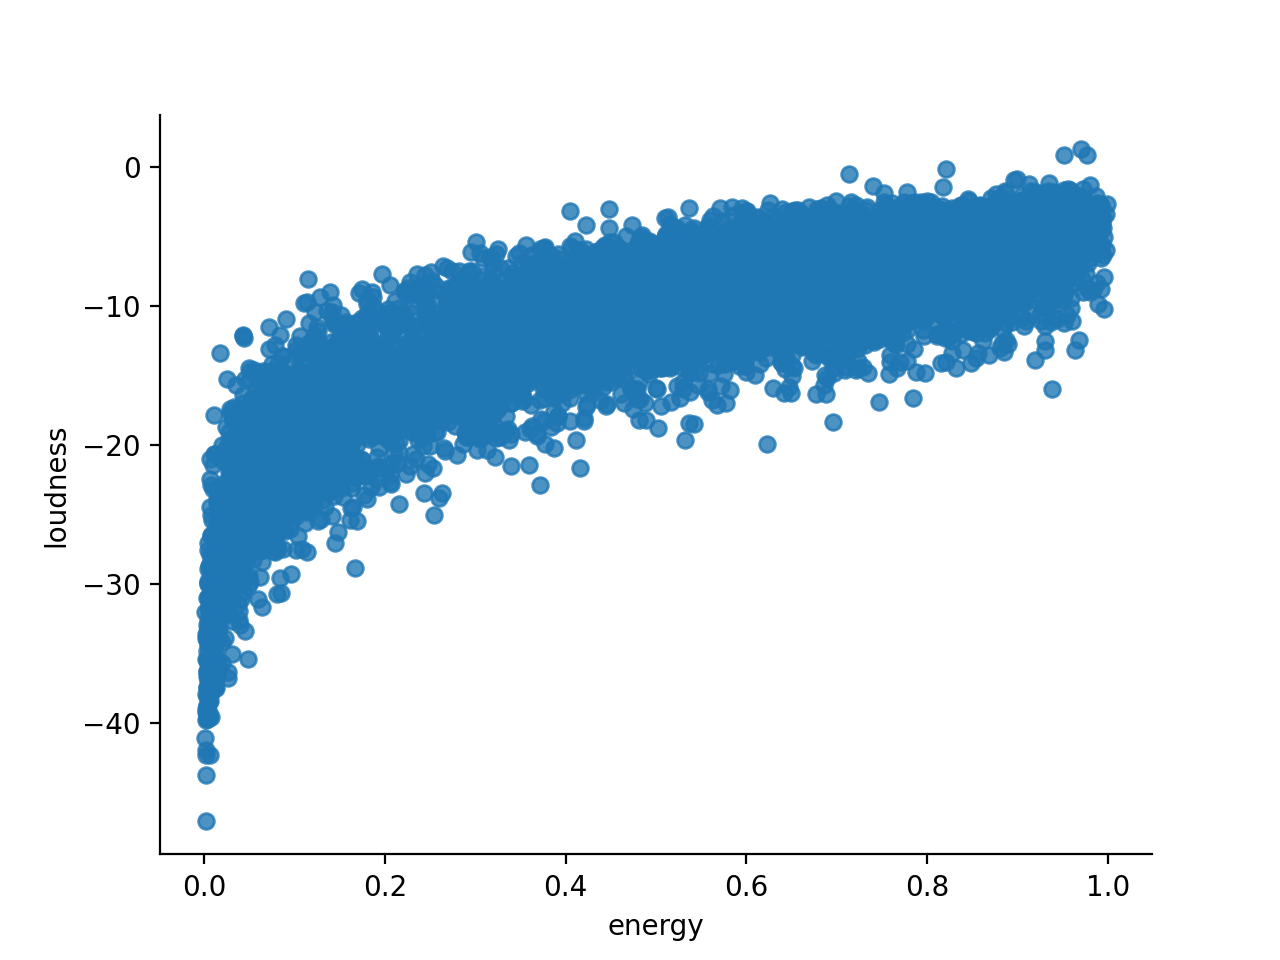

In [195]:
# @title energy vs loudness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='energy', y='loudness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

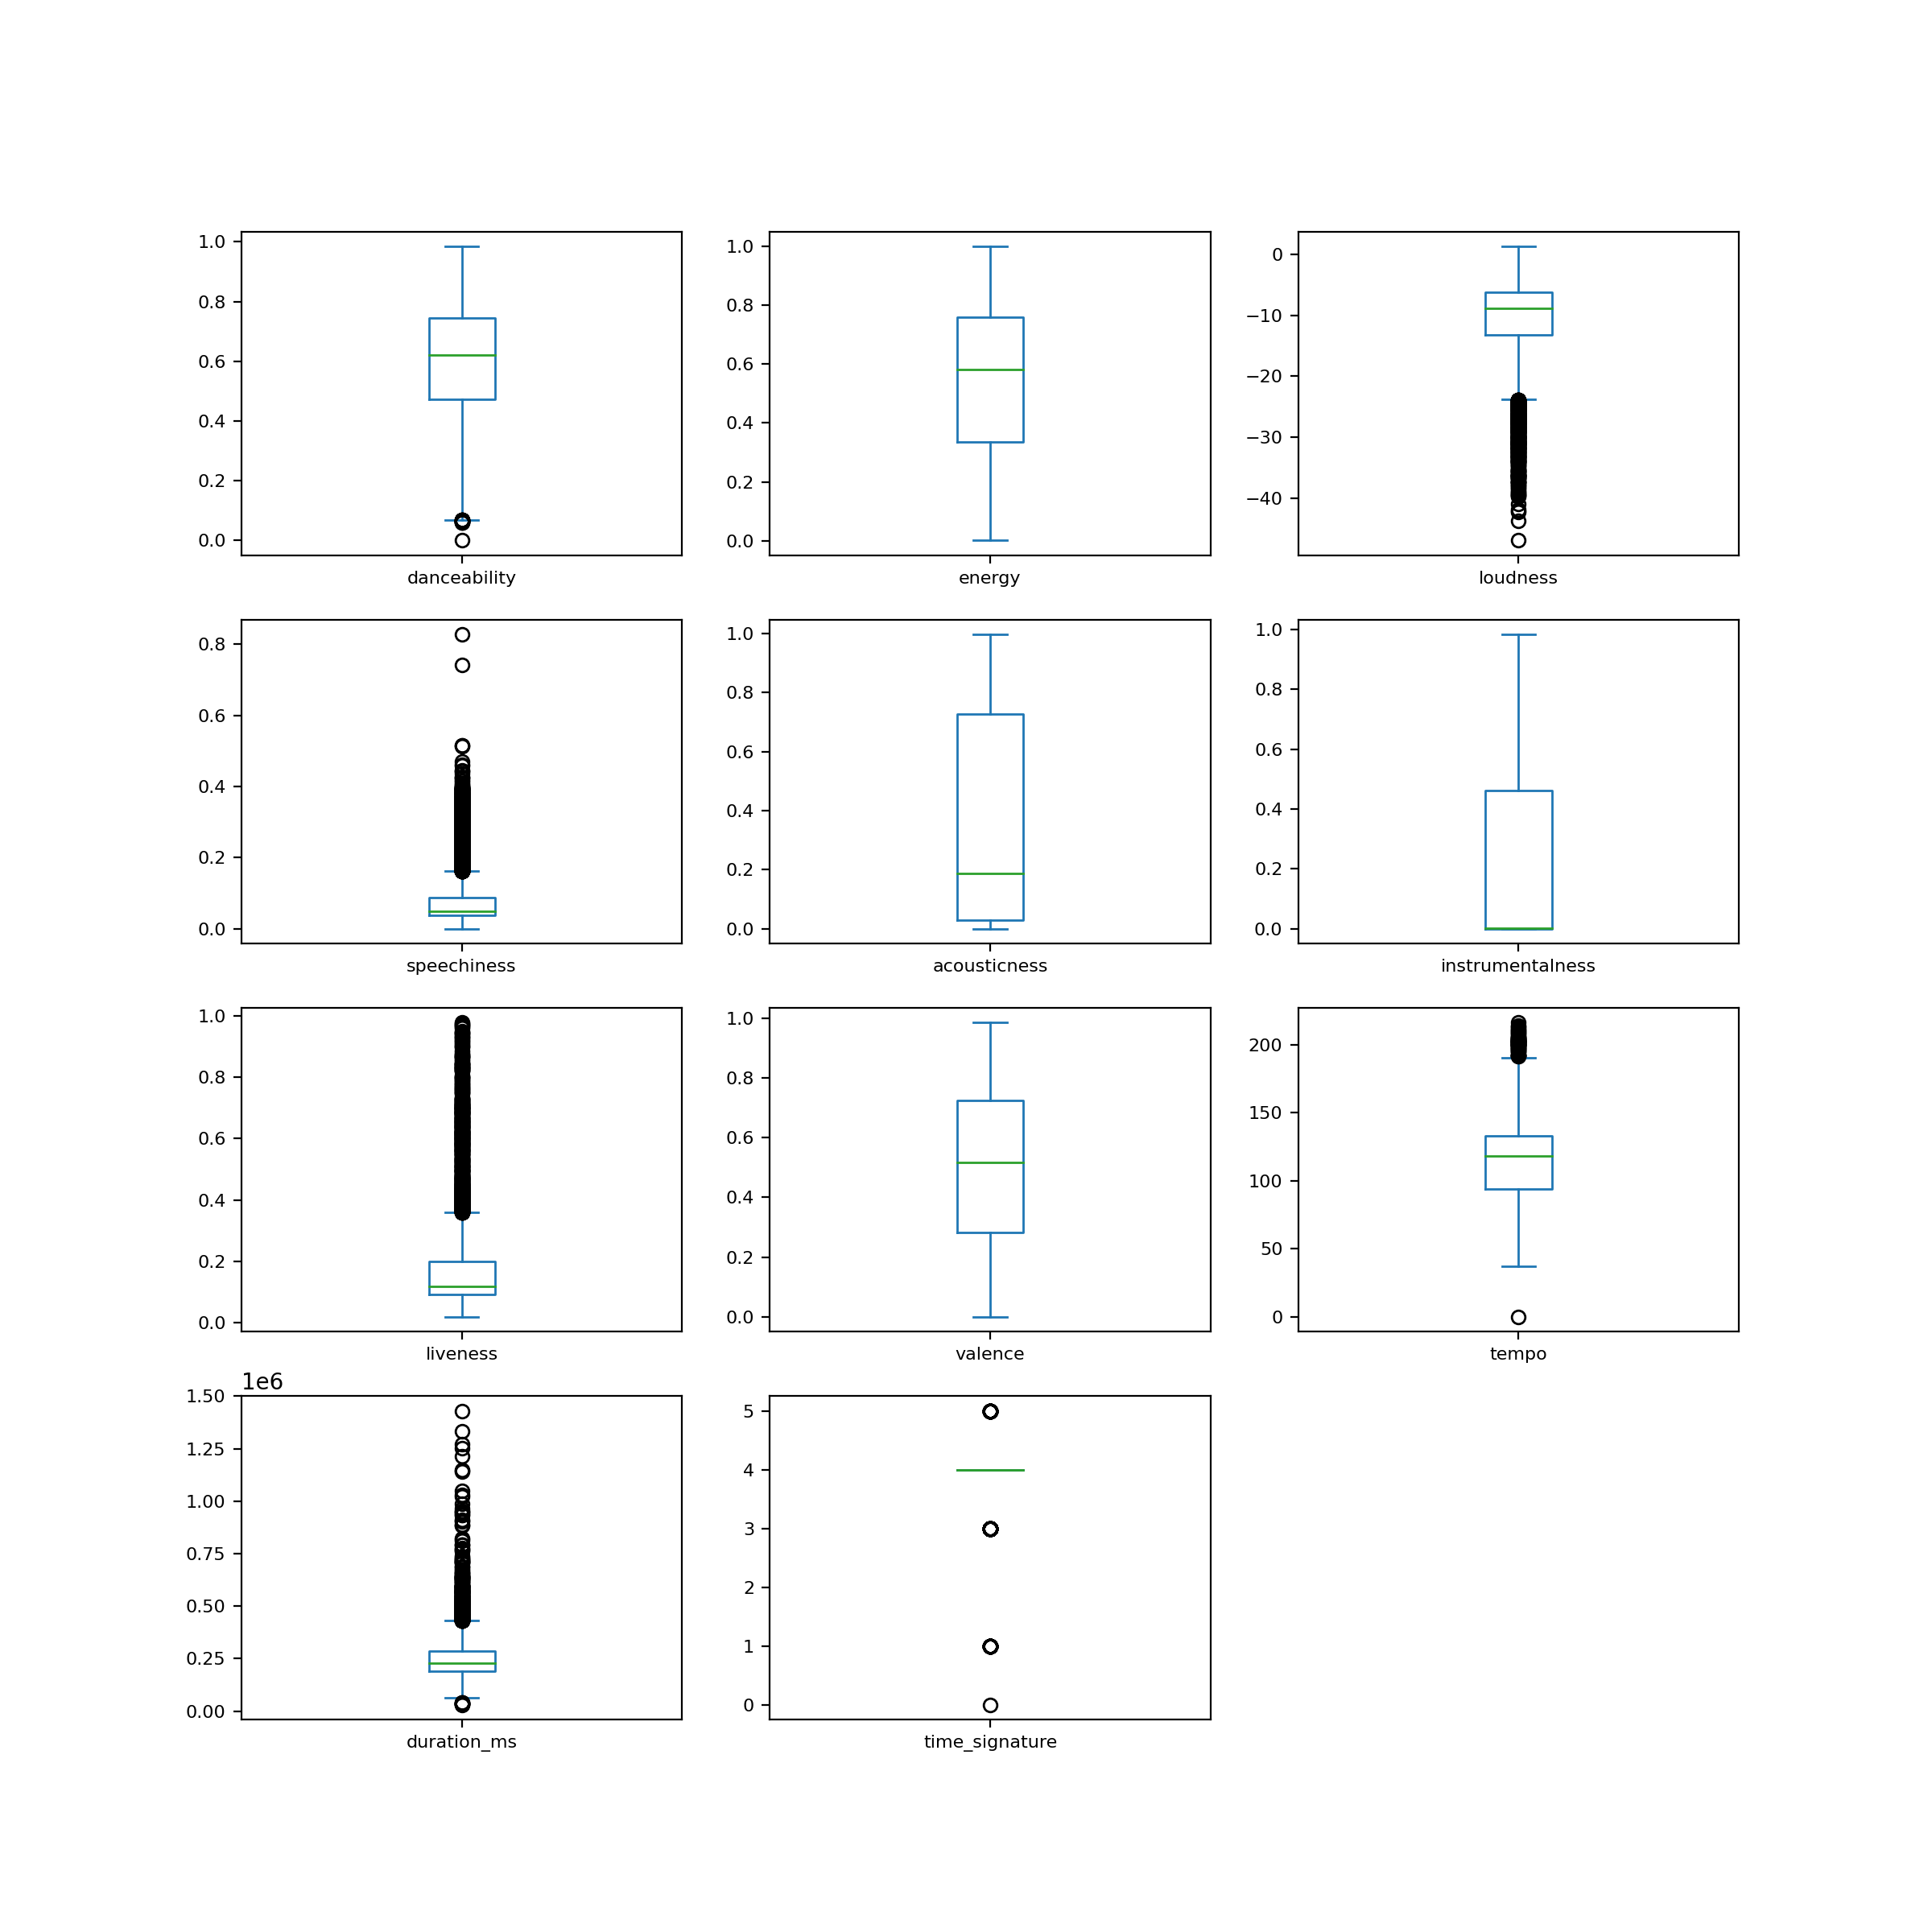

In [196]:
df_features.plot(kind='box',subplots=True, layout=(4,3), fontsize=8, figsize=(12,12));

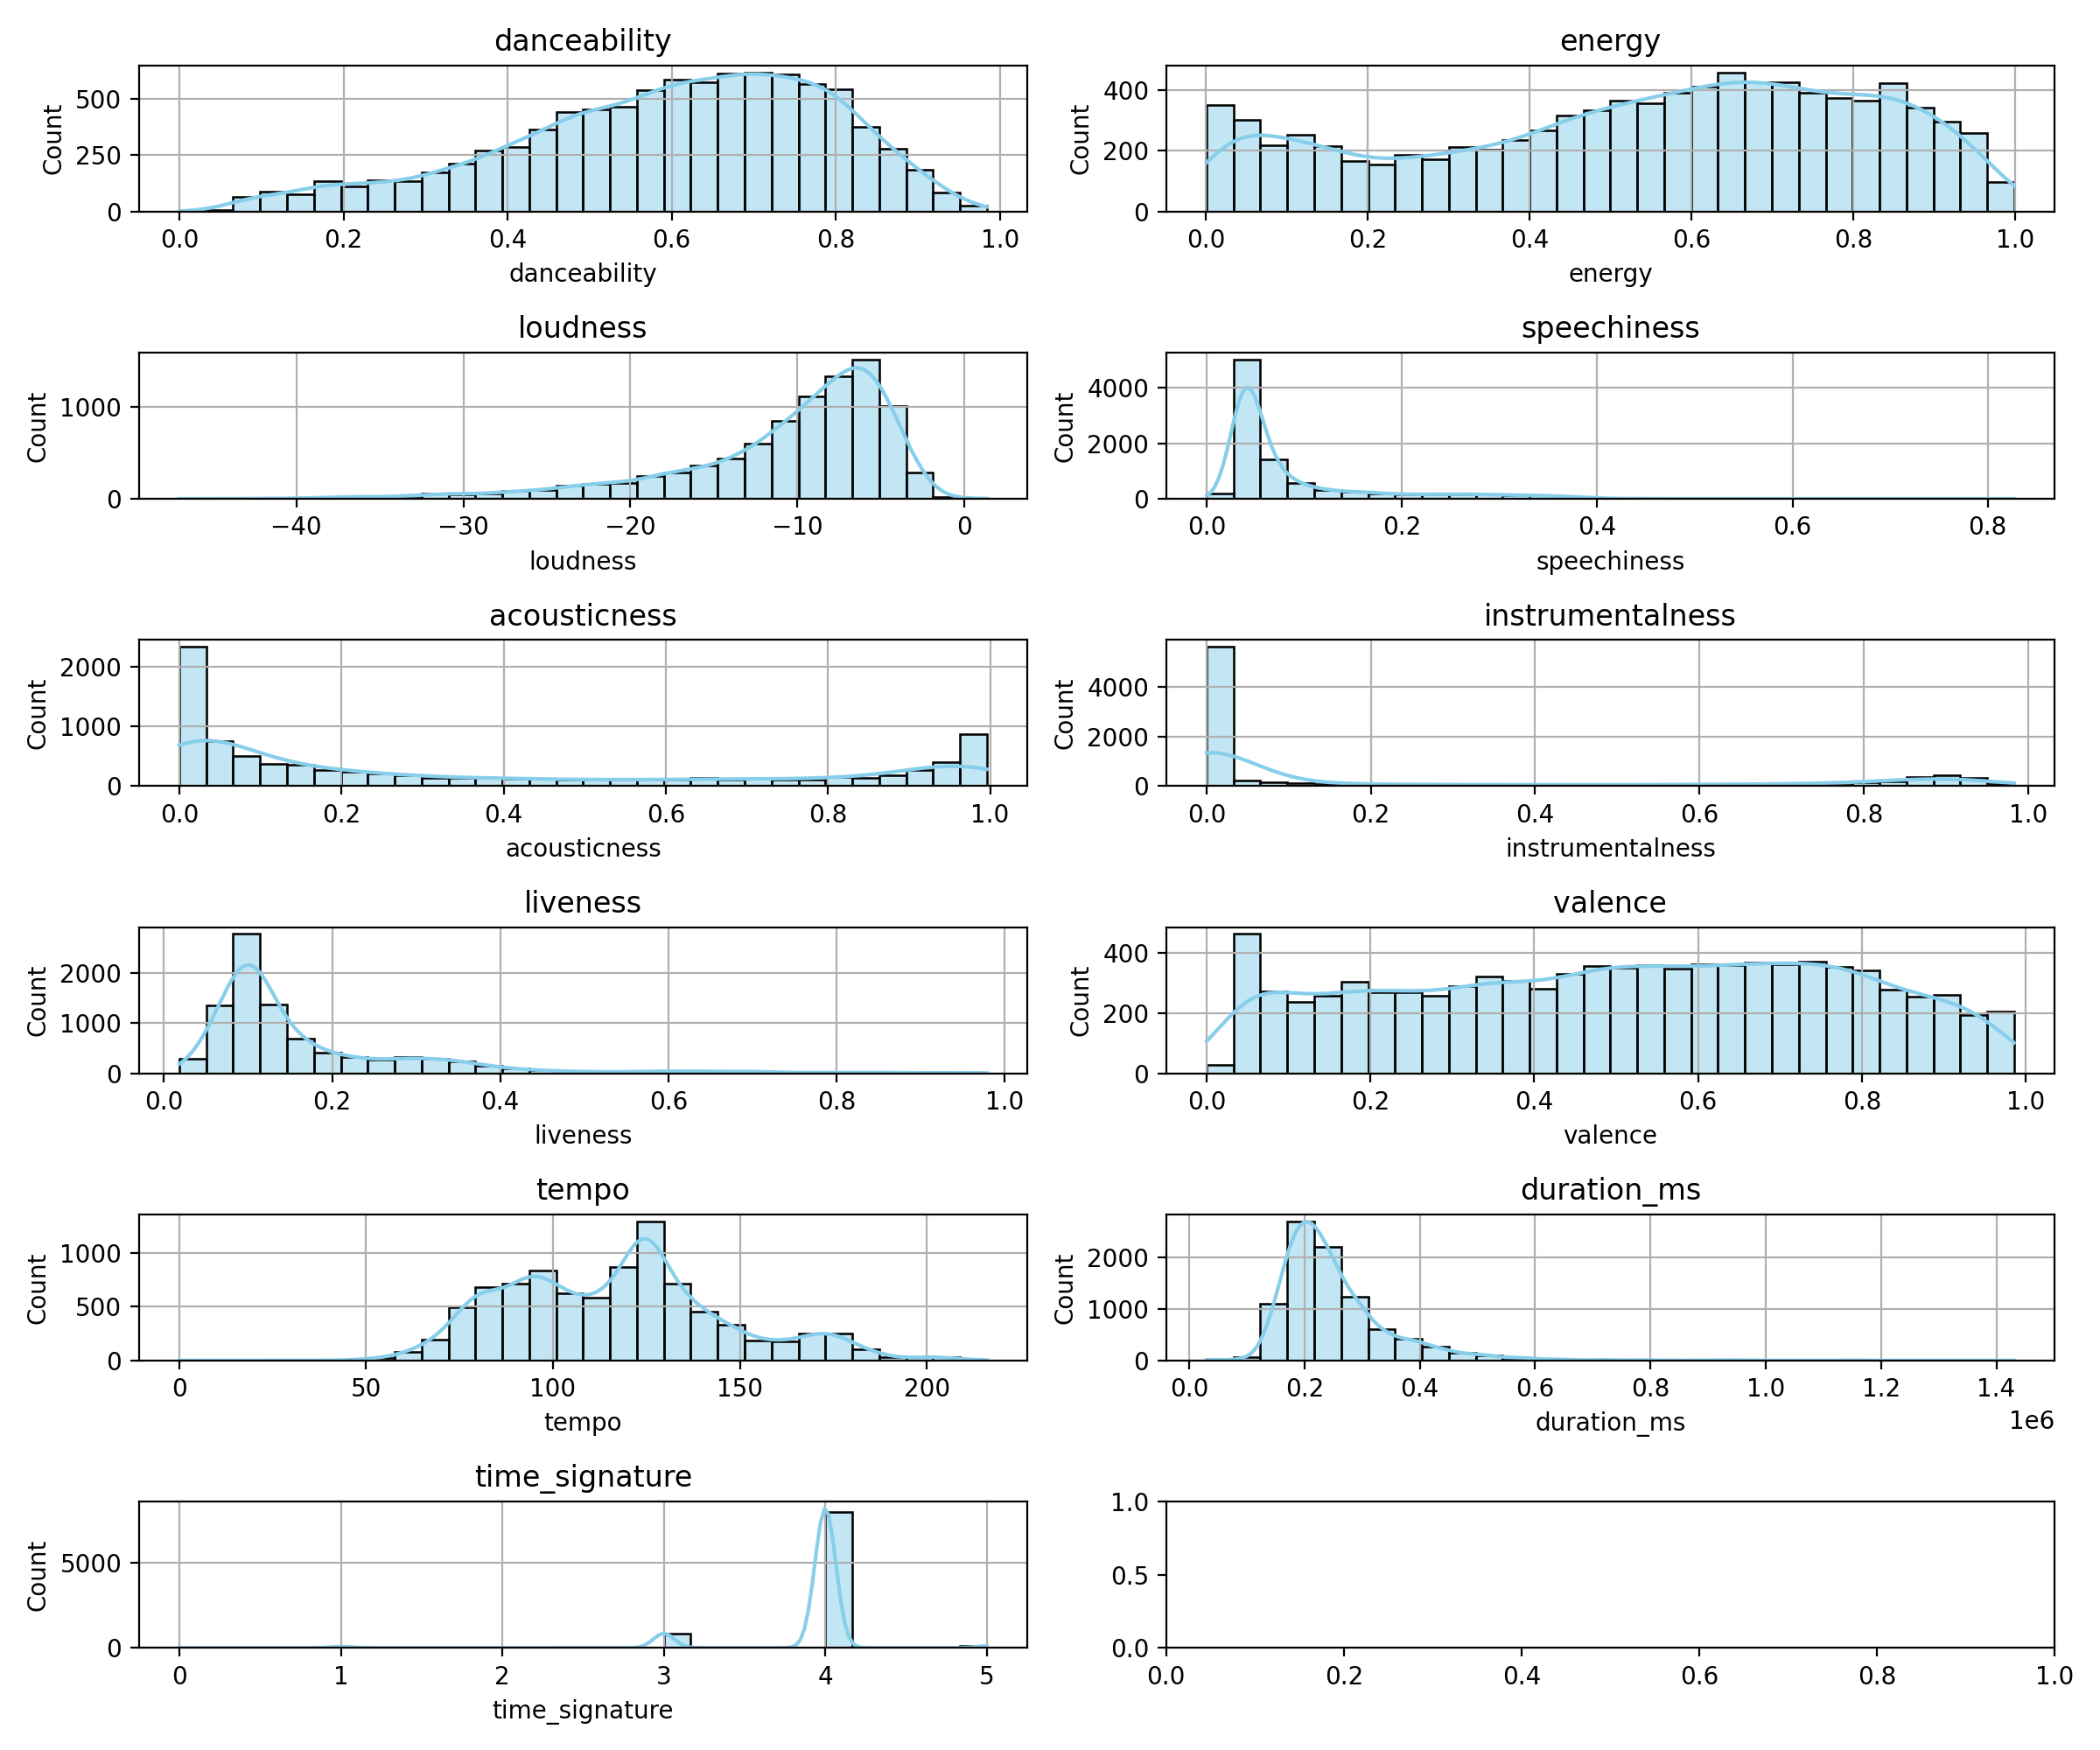

In [197]:
# Filtramos solo columnas de tipo int64 y float64
columnas_numericas = df_features.select_dtypes(include=['int64', 'float64'])

# Calculamos el número necesario de filas y columnas para los subgráficos
num_plots = len(columnas_numericas.columns)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Creamos histogramas y KDE para cada columna
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df_features[columna], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axs[i // num_cols, i % num_cols])
    axs[i // num_cols, i % num_cols].set_title(columna)
    axs[i // num_cols, i % num_cols].grid(True)

# Ajustamos el diseño
fig.tight_layout()
plt.show()



In [198]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

 #Realizamos el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_features[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: danceability, Estadística: 0.969, p-valor: 0.000
Columna: energy, Estadística: 0.950, p-valor: 0.000
Columna: loudness, Estadística: 0.861, p-valor: 0.000
Columna: speechiness, Estadística: 0.668, p-valor: 0.000
Columna: acousticness, Estadística: 0.818, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.653, p-valor: 0.000
Columna: liveness, Estadística: 0.725, p-valor: 0.000
Columna: valence, Estadística: 0.963, p-valor: 0.000
Columna: tempo, Estadística: 0.980, p-valor: 0.000
Columna: duration_ms, Estadística: 0.807, p-valor: 0.000
Columna: time_signature, Estadística: 0.377, p-valor: 0.000


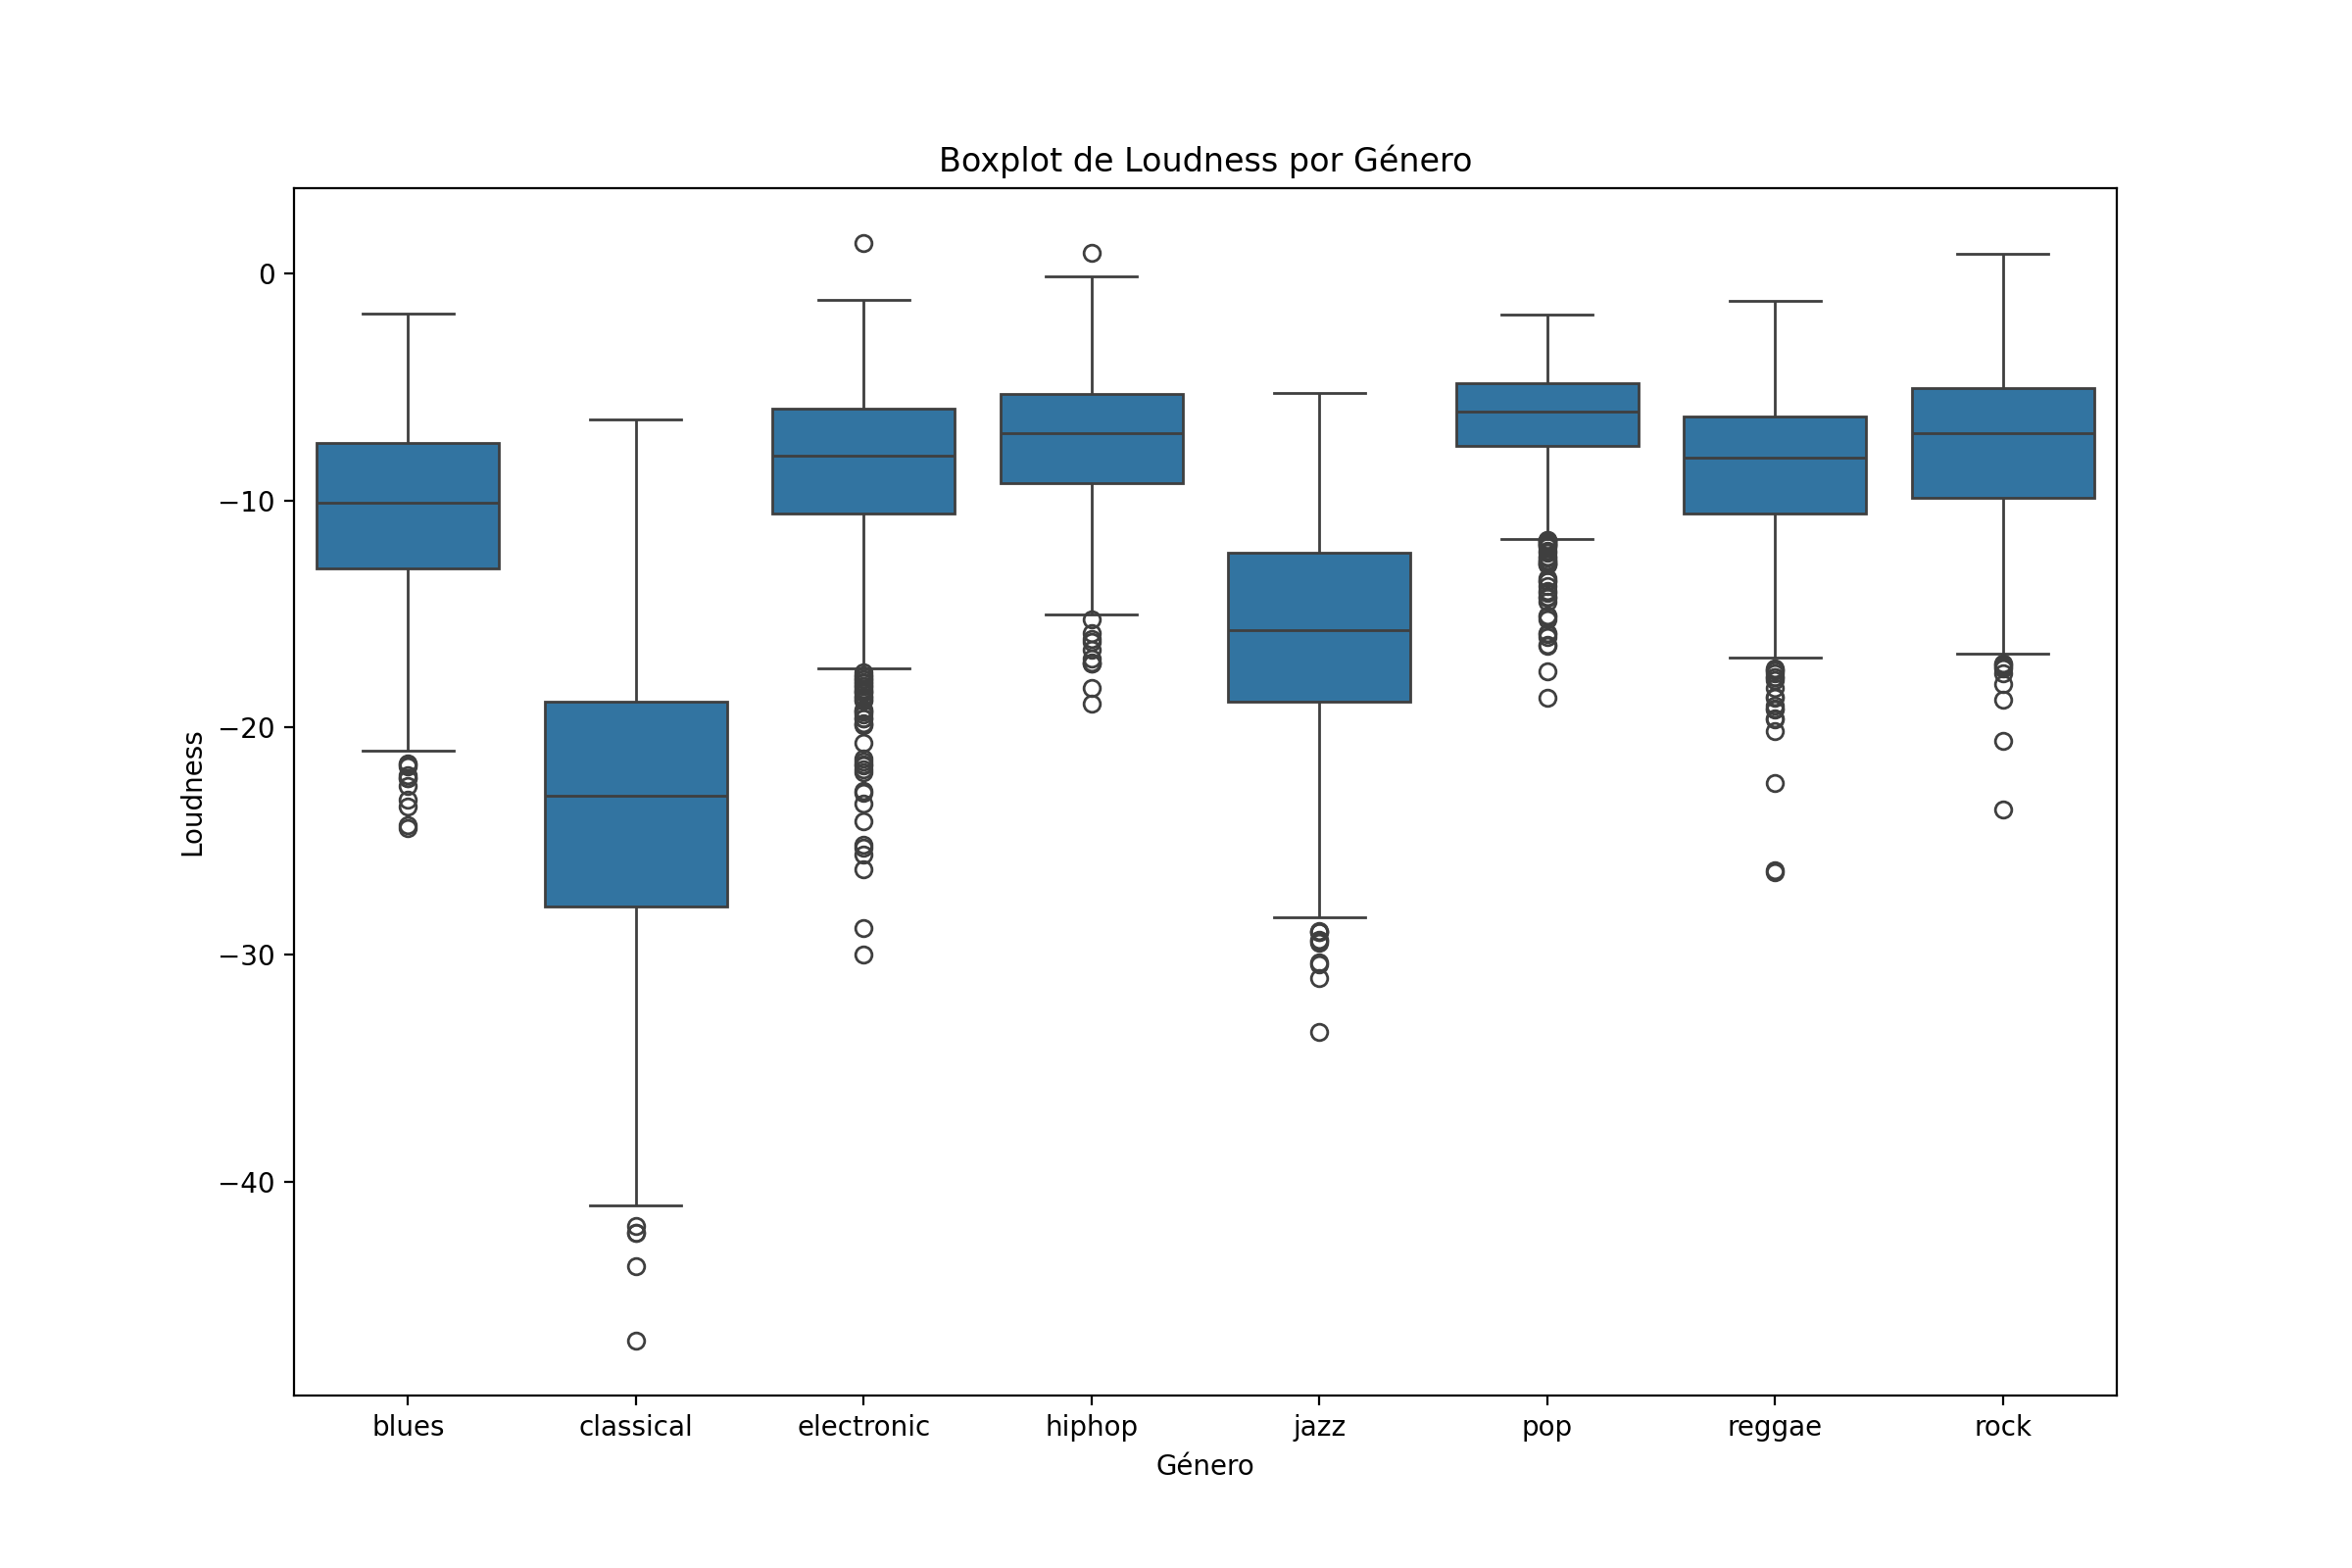

In [199]:
# gráfico de loudness por género
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='loudness', data=df_features)
plt.title('Boxplot de Loudness por Género')
plt.xlabel('Género')
plt.ylabel('Loudness')
plt.show()

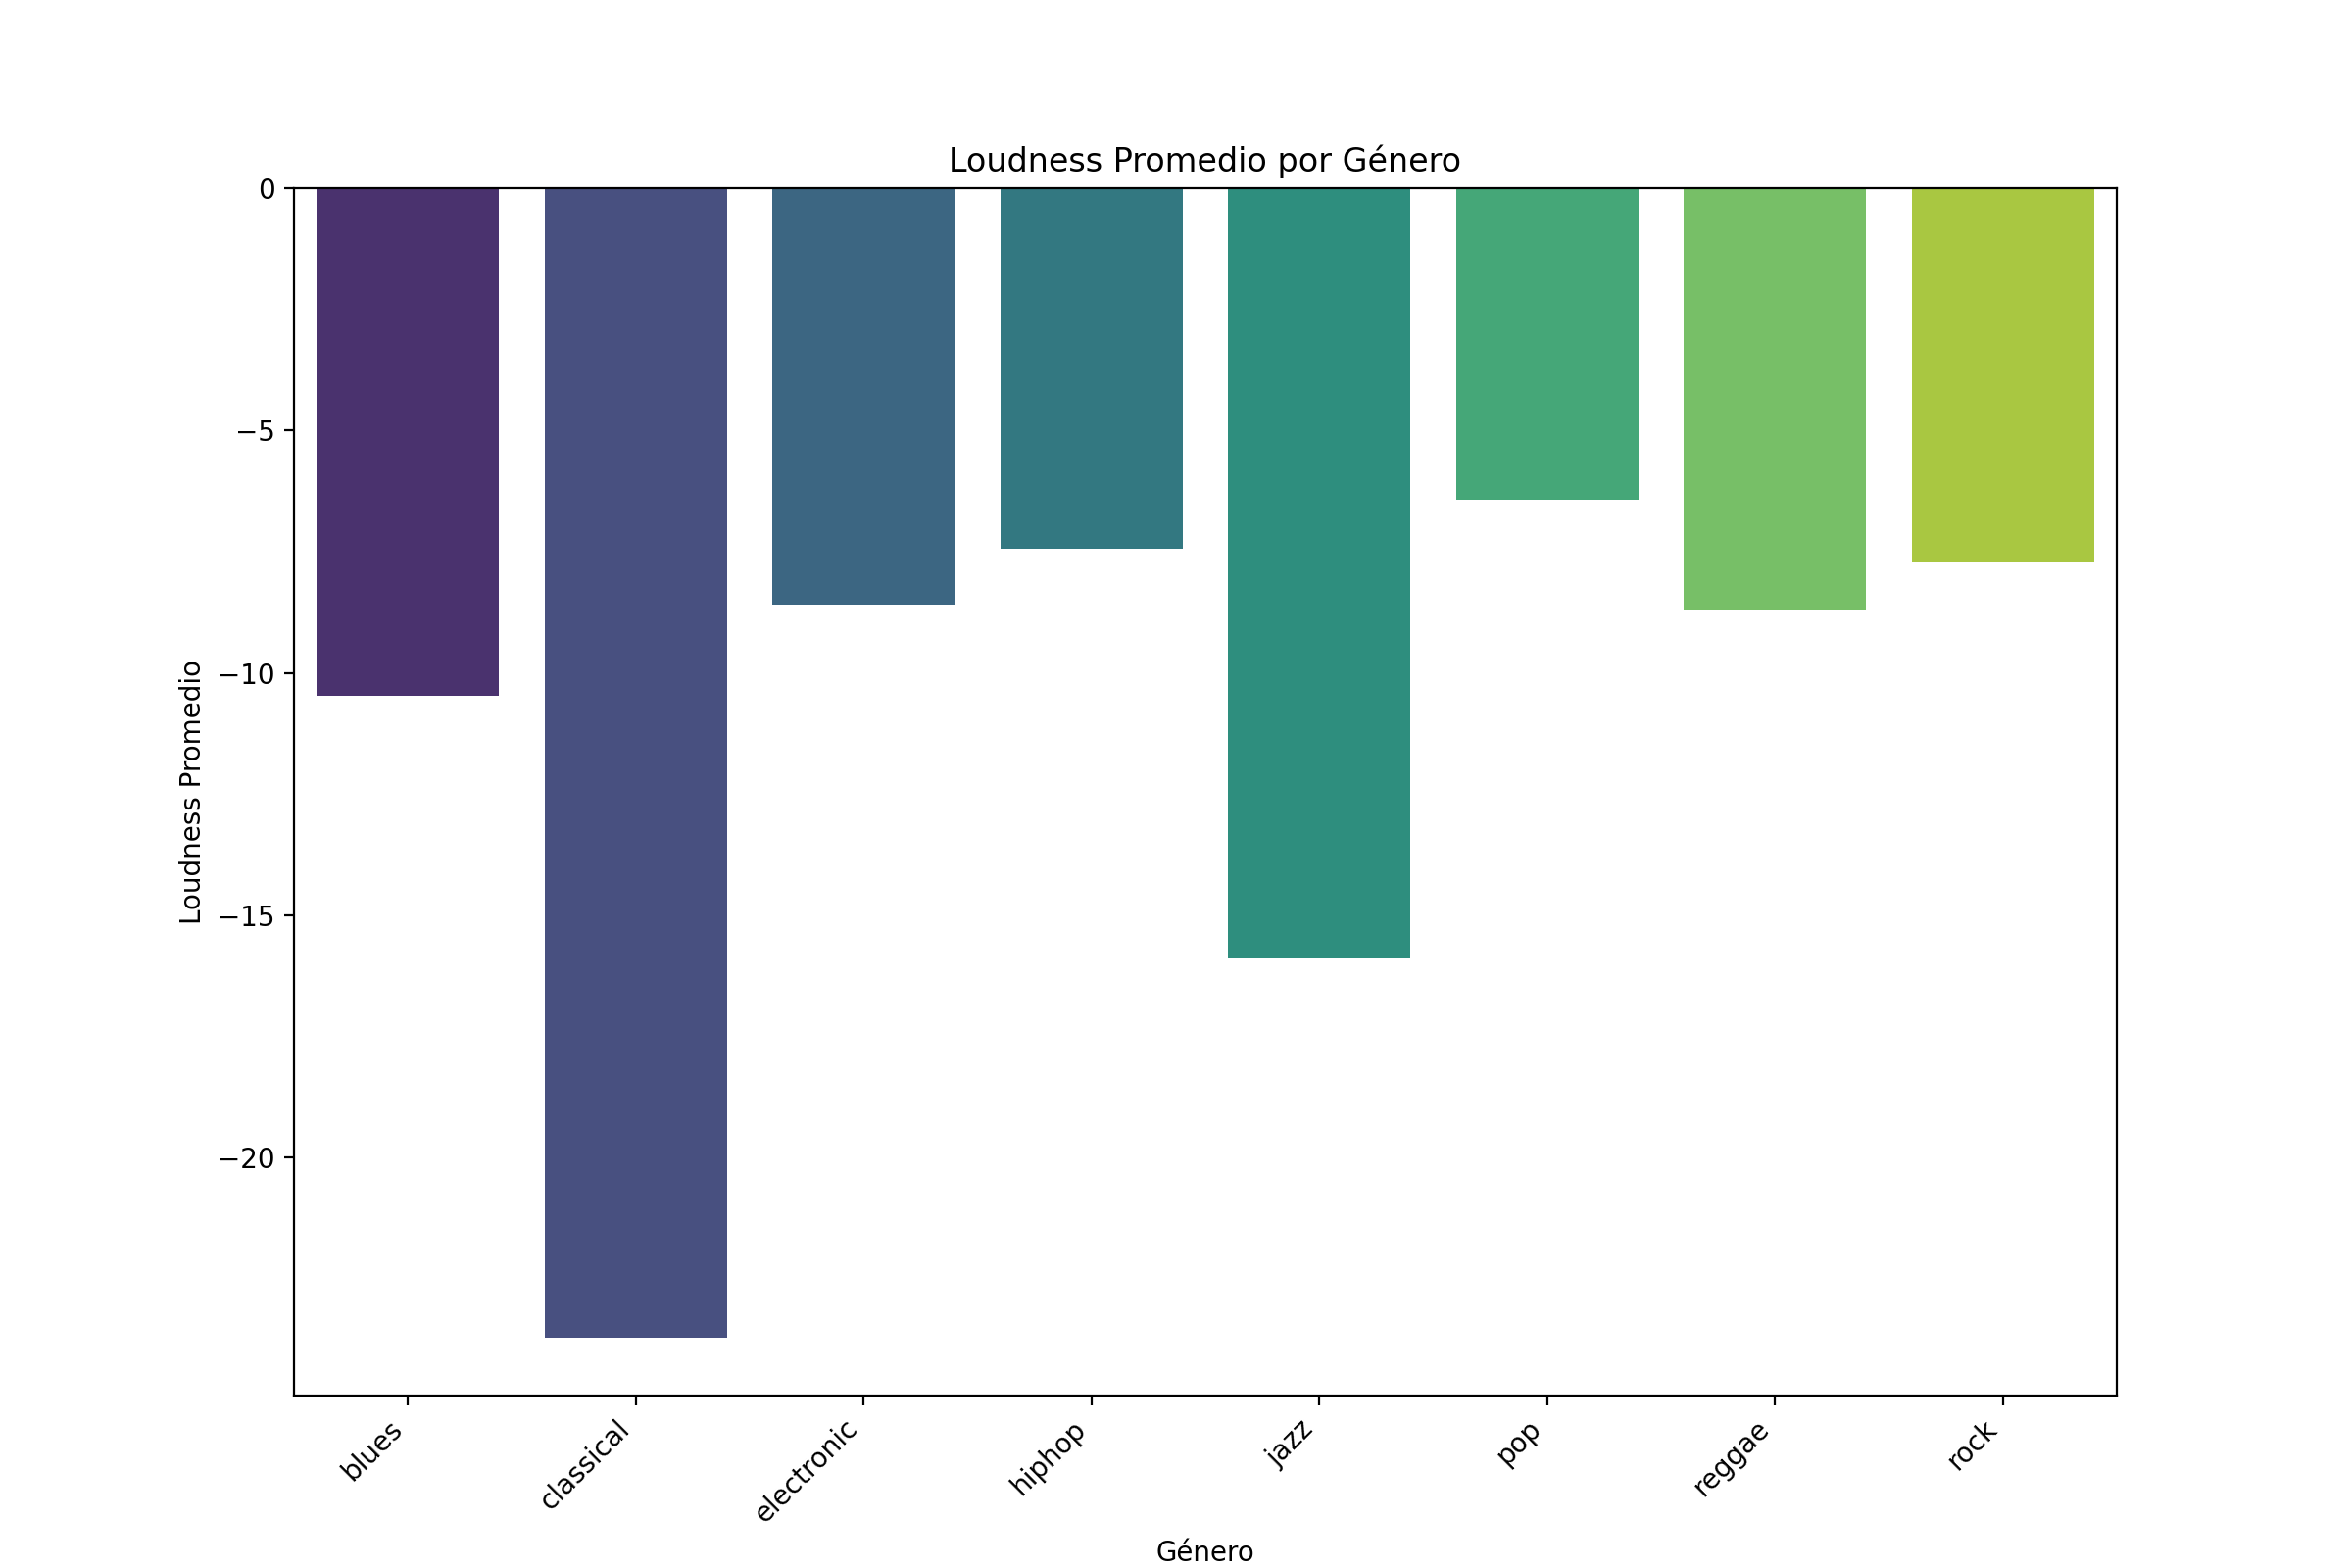

In [200]:
# gráfico de barras loudness por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='loudness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Loudness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

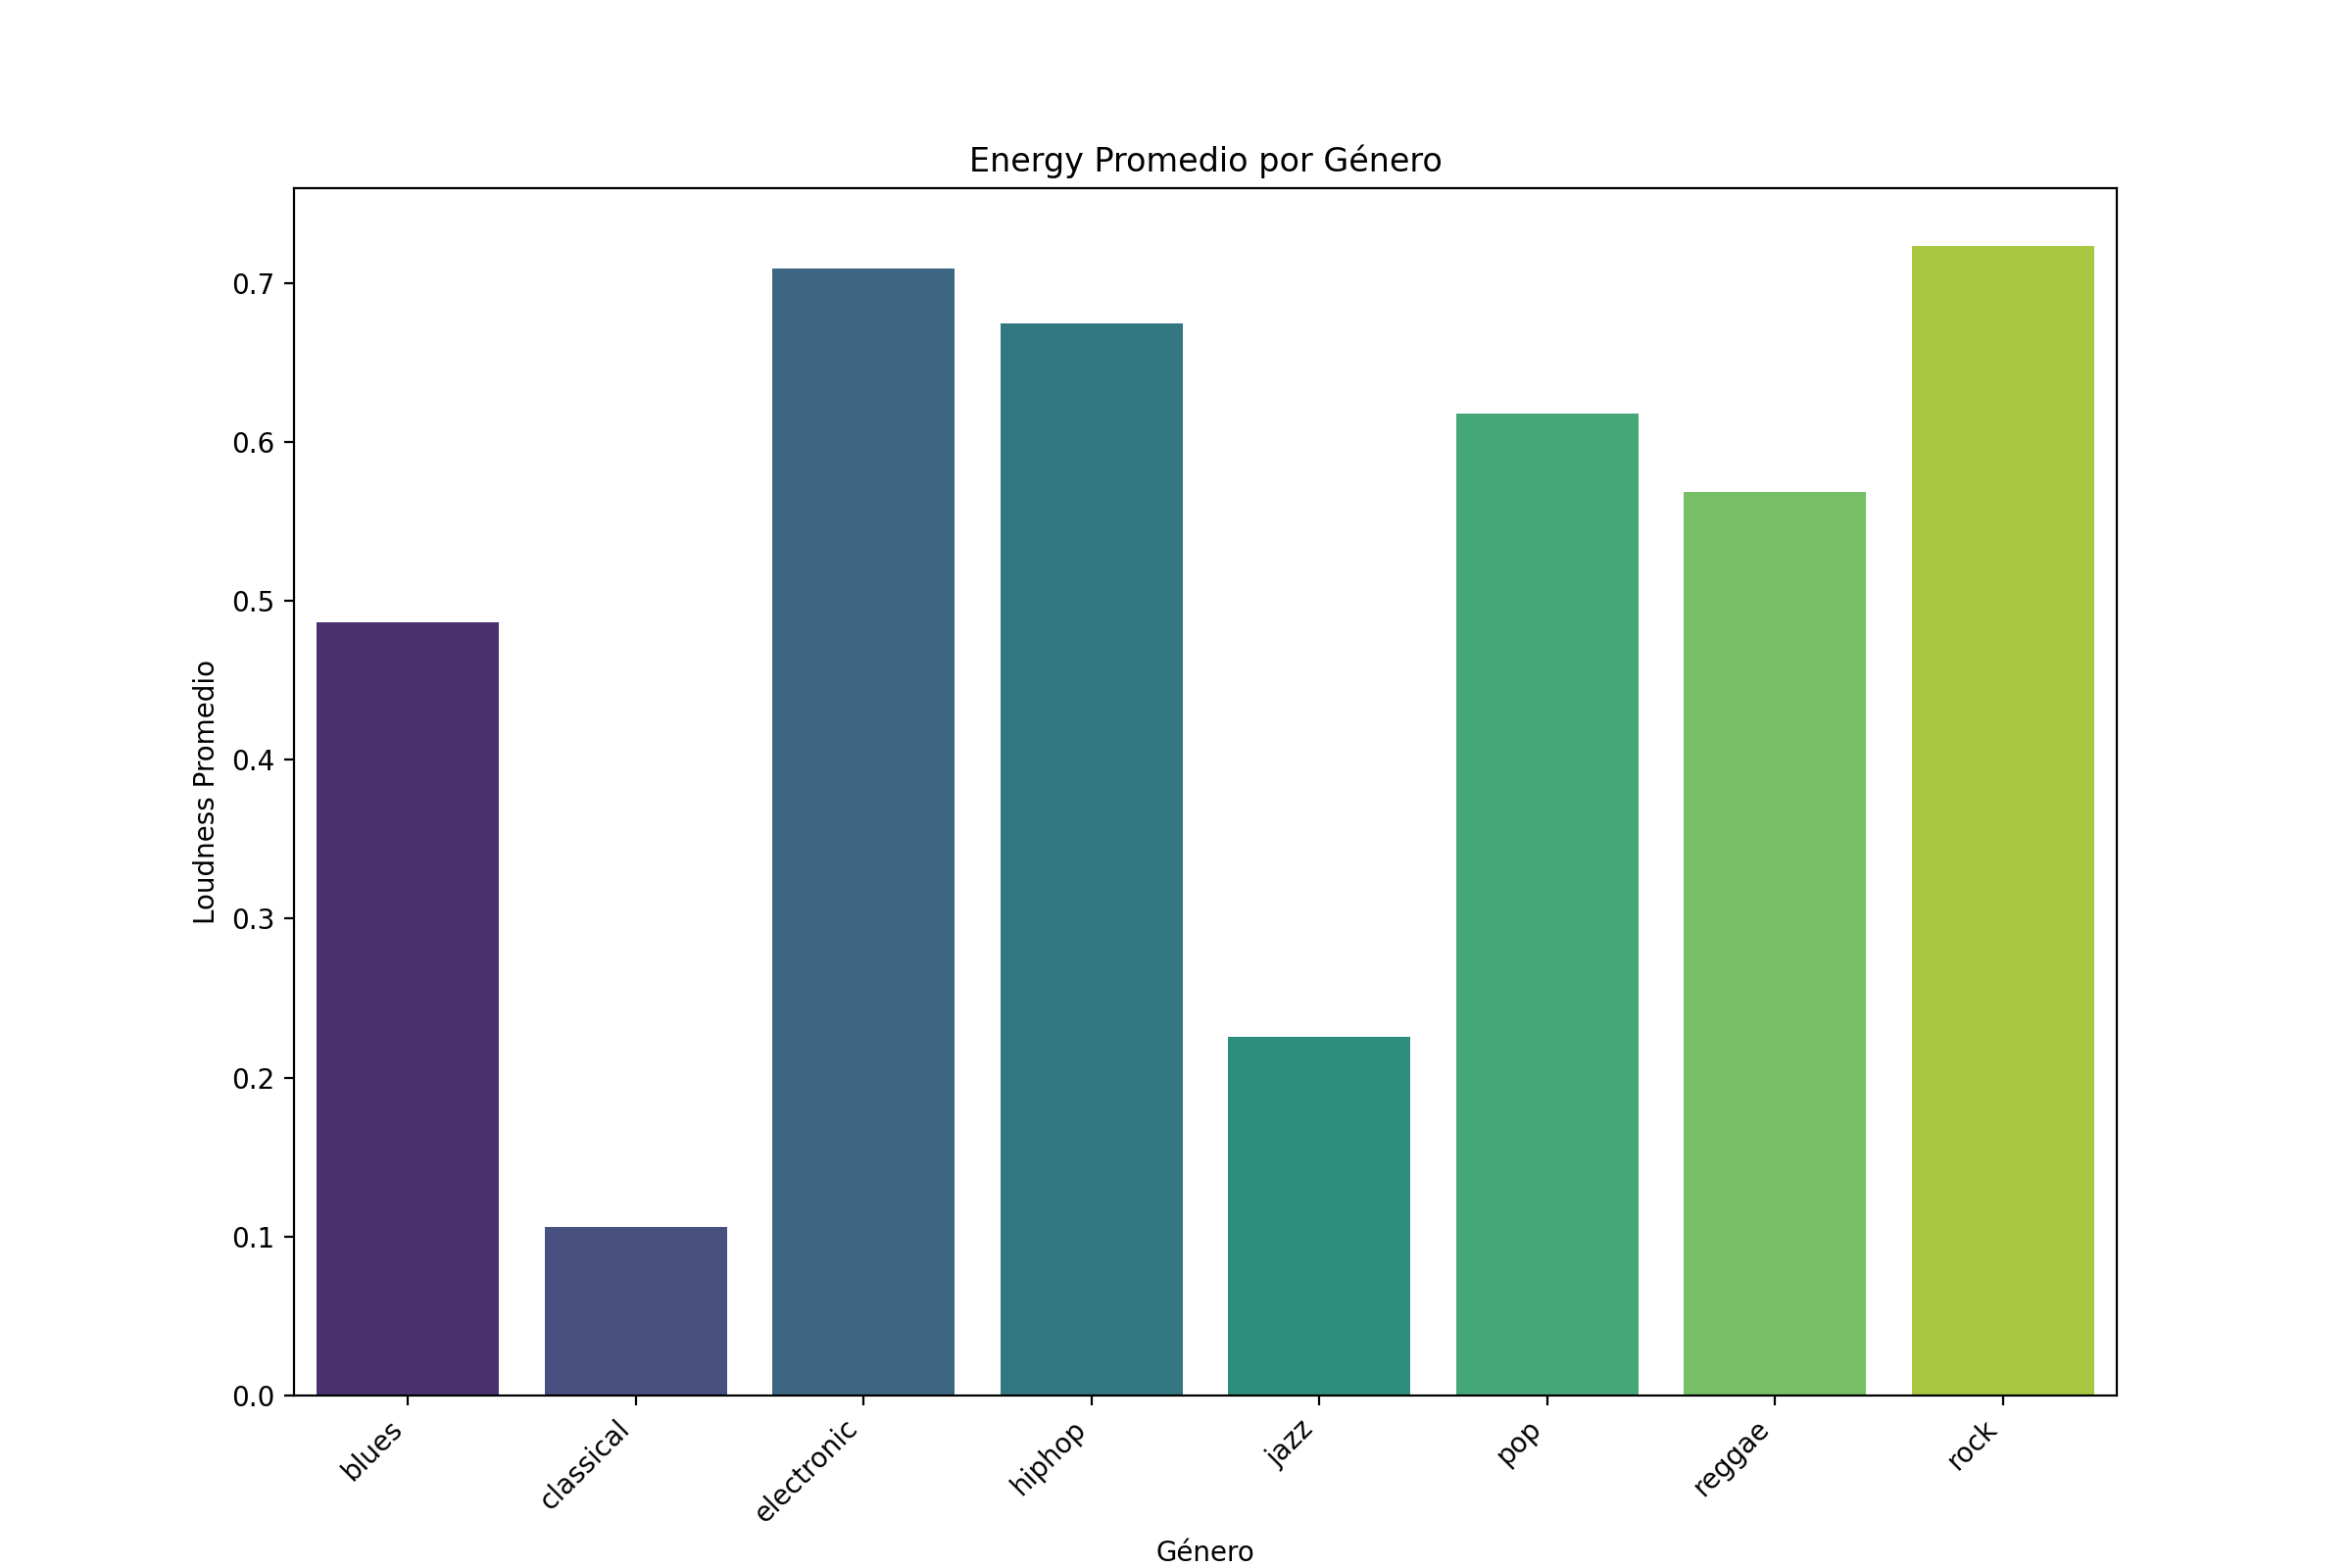

In [201]:
# gráfico de barras energy por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='energy', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Energy Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


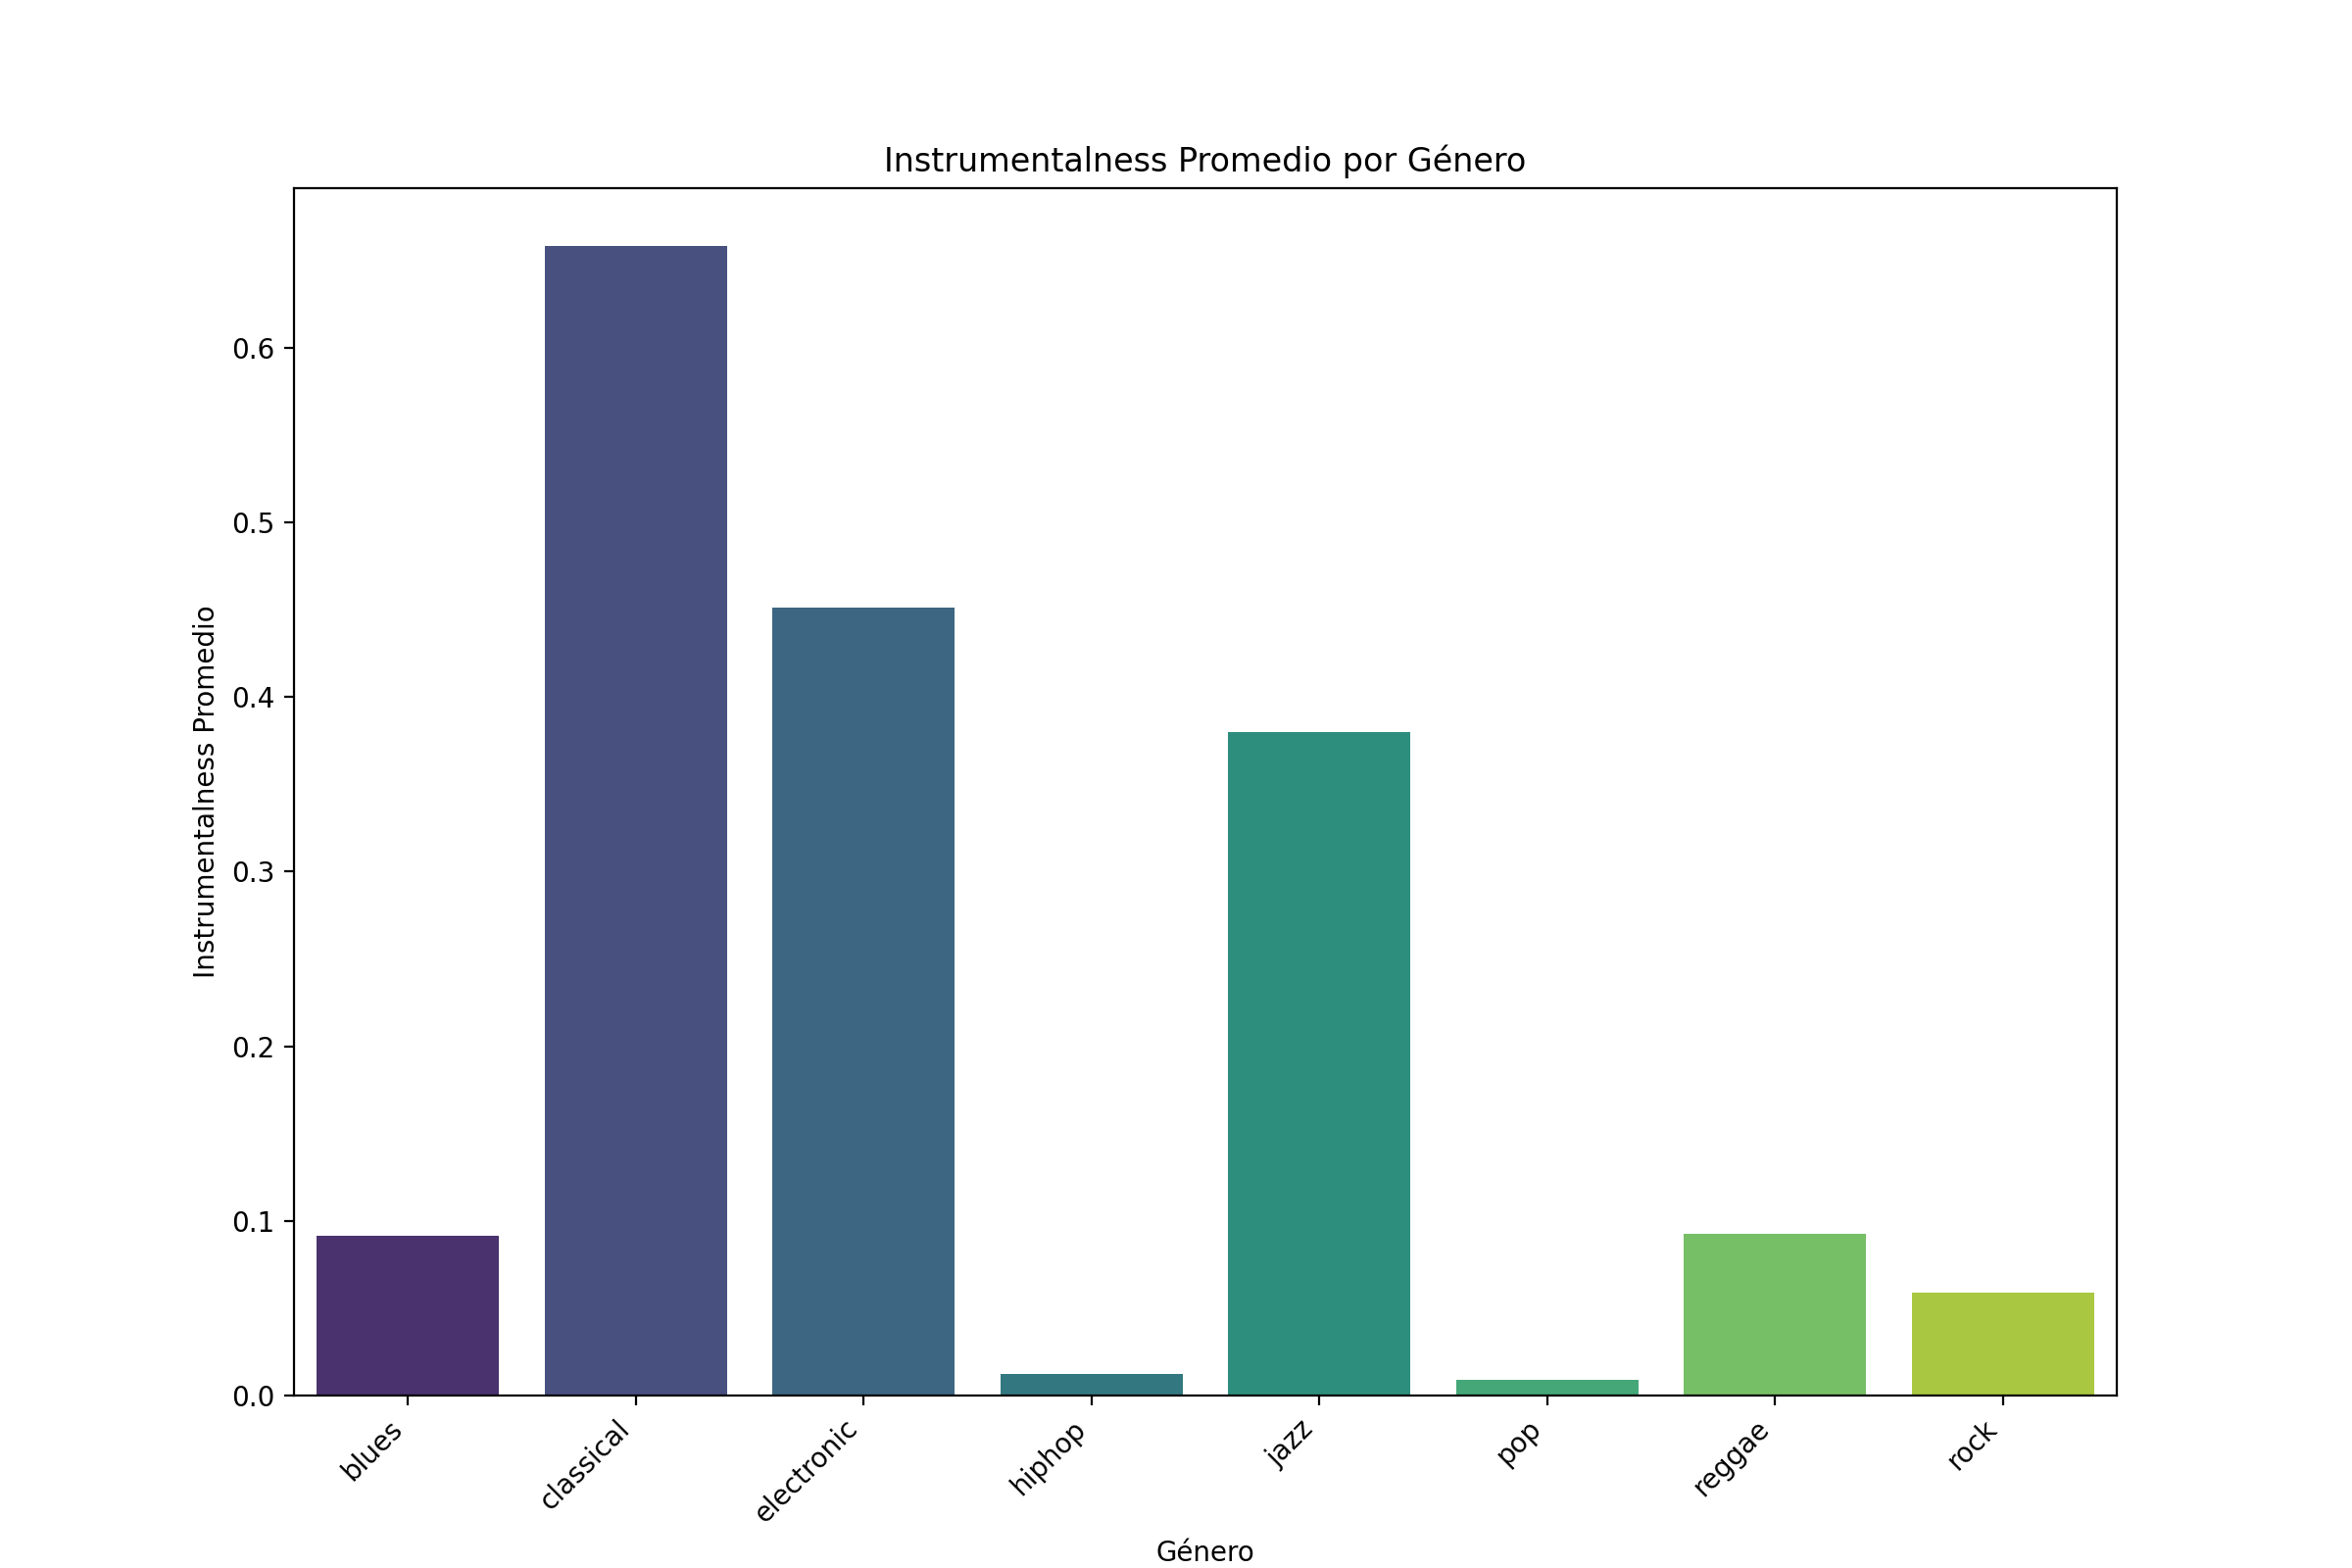

In [202]:
# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='instrumentalness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Instrumentalness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Instrumentalness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

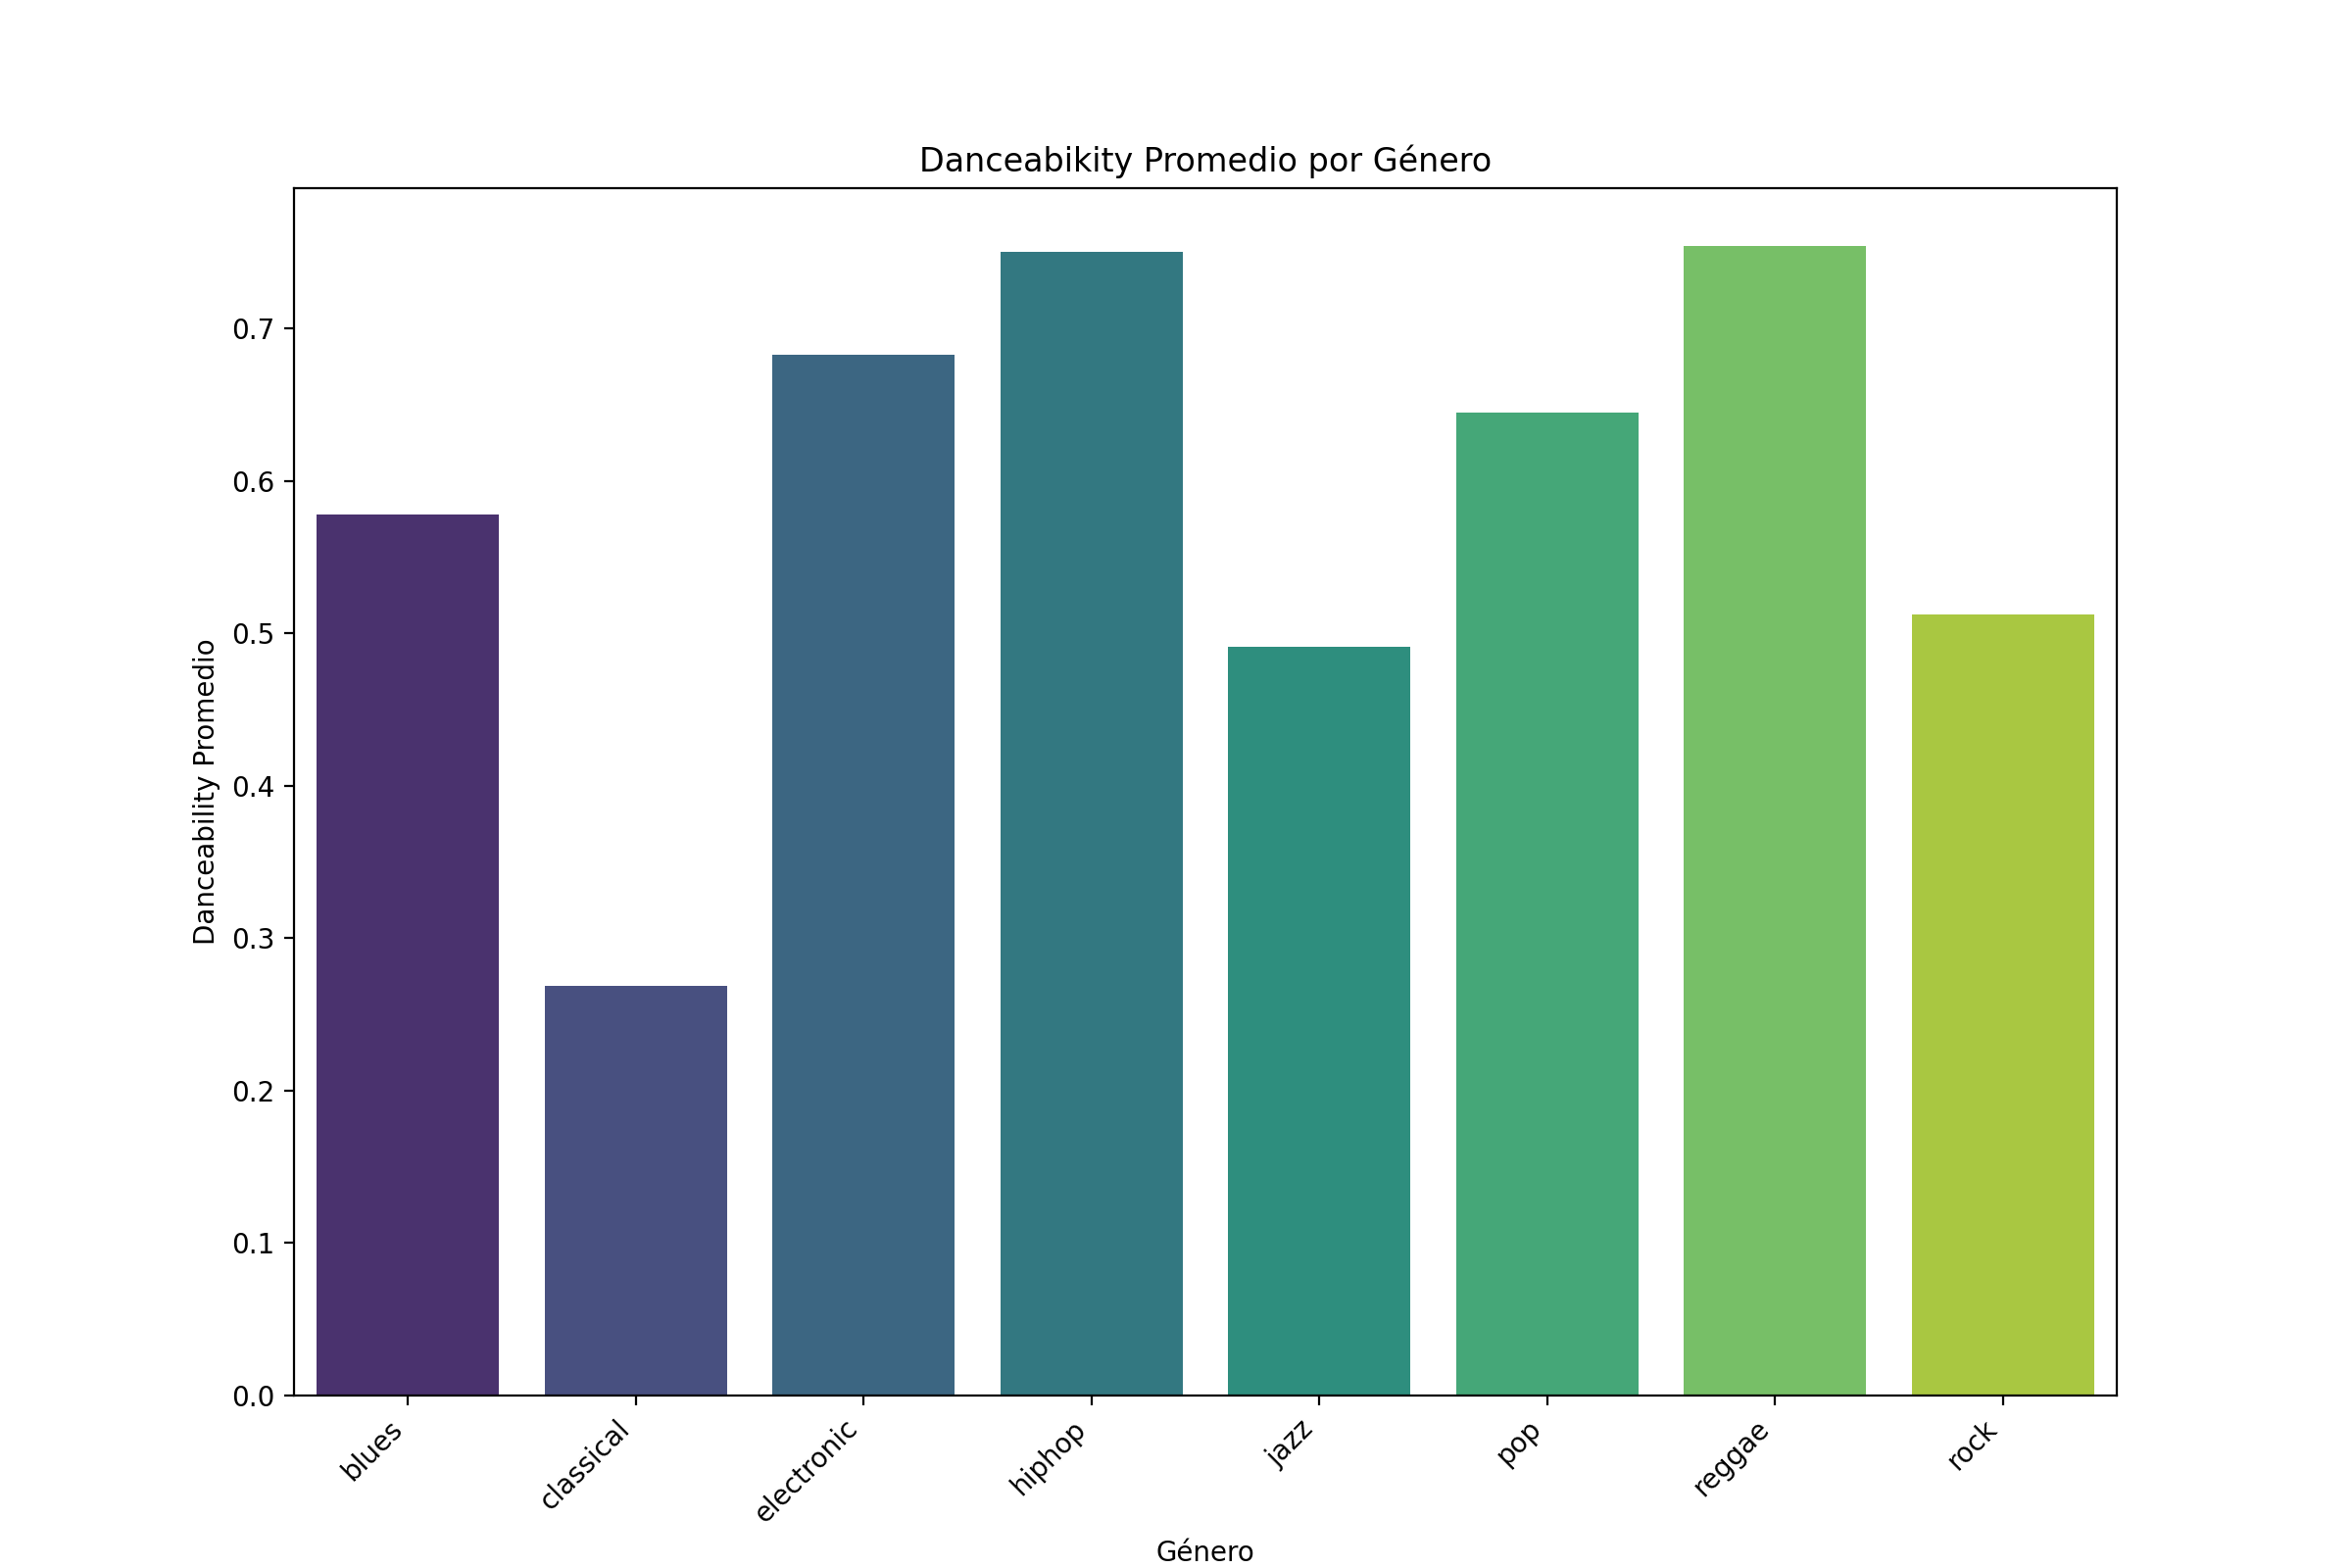

In [203]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='danceability', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Danceabikity Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Danceability Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

In [204]:
X = df_features.drop('genre', axis=1)
y = df_features['genre']

# Aplicamos LabelEncoder a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Obtener los equivalentes originales y sus códigos
equivalentes_originales = le.classes_
codigos_asignados = le.transform(equivalentes_originales)

# Visualizamos los equivalentes originales y sus códigos
for codigo, equivalente_original in zip(codigos_asignados, equivalentes_originales):
    print(f"Código: {codigo}, Equivalente Original: {equivalente_original}")


Código: 0, Equivalente Original: blues
Código: 1, Equivalente Original: classical
Código: 2, Equivalente Original: electronic
Código: 3, Equivalente Original: hiphop
Código: 4, Equivalente Original: jazz
Código: 5, Equivalente Original: pop
Código: 6, Equivalente Original: reggae
Código: 7, Equivalente Original: rock


In [206]:
df_features.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

In [207]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = robust_scaler.fit_transform(X_train)

# Solo transformar los datos de prueba (no volver a ajustar para evitar data leakage)
X_test_scaled = robust_scaler.transform(X_test)

In [208]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:54<00:01,  1.27s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 7185, number of used features: 11
[LightGBM] [Info] Start training from score -2.200152
[LightGBM] [Info] Start training from score -2.259678
[LightGBM] [Info] Start training from score -1.669671
[LightGBM] [Info] Start training from score -2.169228
[LightGBM] [Info] Start training from score -2.180250
[LightGBM] [Info] Start training from score -1.995264
[LightGBM] [Info] Start training from score -2.208984
[LightGBM] [Info] Start training from score -2.091906


100%|██████████| 29/29 [00:56<00:00,  1.95s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.71               0.70    None      0.71   
XGBClassifier                      0.70               0.69    None      0.69   
ExtraTreesClassifier               0.70               0.69    None      0.70   
LGBMClassifier                     0.69               0.69    None      0.69   
SVC                                0.68               0.68    None      0.68   
NuSVC                              0.66               0.65    None      0.66   
BaggingClassifier                  0.66               0.65    None      0.66   
QuadraticDiscriminantAnalysis      0.64               0.64    None      0.64   
LogisticRegression                 0.64               0.63    None      0.64   
KNeighborsClassifier               0.63               0.62    None      0.63   
LinearDiscriminantAnalysis         0.62               0.62    None      0.63   
CalibratedClassifierCV             0.63               0.61    None      0.62   
LinearSVC                          0.62               0.61    None      0.62   
NearestCentroid                    0.58               0.59    None      0.59   
LabelSpreading                     0.59               0.58    None      0.59   
LabelPropagation                   0.59               0.58    None      0.59   
GaussianNB                         0.58               0.58    None      0.58   
SGDClassifier                      0.58               0.57    None      0.58   
RidgeClassifier                    0.58               0.56    None      0.57   
RidgeClassifierCV                  0.58               0.56    None      0.56   
DecisionTreeClassifier             0.57               0.56    None      0.57   
BernoulliNB                        0.51               0.50    None      0.51   
ExtraTreeClassifier                0.50               0.49    None      0.50   
AdaBoostClassifier                 0.45               0.46    None      0.43   
Perceptron                         0.48               0.45    None      0.47   
PassiveAggressiveClassifier        0.40               0.40    None      0.38   
DummyClassifier                    0.20               0.12    None      0.07   

                               Time Taken  
Model                                      
RandomForestClassifier               3.47  
XGBClassifier                        2.14  
ExtraTreesClassifier                 1.89  
LGBMClassifier                       1.64  
SVC                                  3.19  
NuSVC                                5.05  
BaggingClassifier                    2.83  
QuadraticDiscriminantAnalysis        0.03  
LogisticRegression                   0.25  
KNeighborsClassifier                 0.47  
LinearDiscriminantAnalysis           0.03  
CalibratedClassifierCV              20.17  
LinearSVC                            2.06  
NearestCentroid                      0.02  
LabelSpreading                       5.45  
LabelPropagation                     4.75  
GaussianNB                           0.08  
SGDClassifier                        0.34  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.07  
DecisionTreeClassifier               0.20  
BernoulliNB                          0.04  
ExtraTreeClassifier                  0.04  
AdaBoostClassifier                   2.04  
Perceptron                           0.07  
PassiveAggressiveClassifier          0.07  
DummyClassifier                      0.03

Random Forest Classifier:

In [209]:
# clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [210]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [211]:
# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       193
           1       0.90      0.85      0.87       200
           2       0.80      0.78      0.79       358
           3       0.71      0.78      0.75       198
           4       0.67      0.71      0.69       177
           5       0.64      0.68      0.66       239
           6       0.68      0.63      0.66       209
           7       0.64      0.65      0.64       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



In [212]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [213]:
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 50, num=5)] + [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]

}




In [214]:
random_search_rf = RandomizedSearchCV(rf_clf, param_dist_rf, n_iter=50, cv=5, verbose = 2, scoring='accuracy', n_jobs=-1)


In [215]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=2)

In [216]:
# mejores parámetros encontrados
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados:", best_params_rf)

Mejores hiperparámetros encontrados: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [217]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


print("Informe de clasificación:\n", classification_report(y_test, y_pred_rf))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.58      0.58       193
           1       0.90      0.84      0.87       200
           2       0.80      0.77      0.79       358
           3       0.72      0.73      0.72       198
           4       0.67      0.70      0.69       177
           5       0.64      0.69      0.67       239
           6       0.66      0.63      0.64       209
           7       0.64      0.66      0.65       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



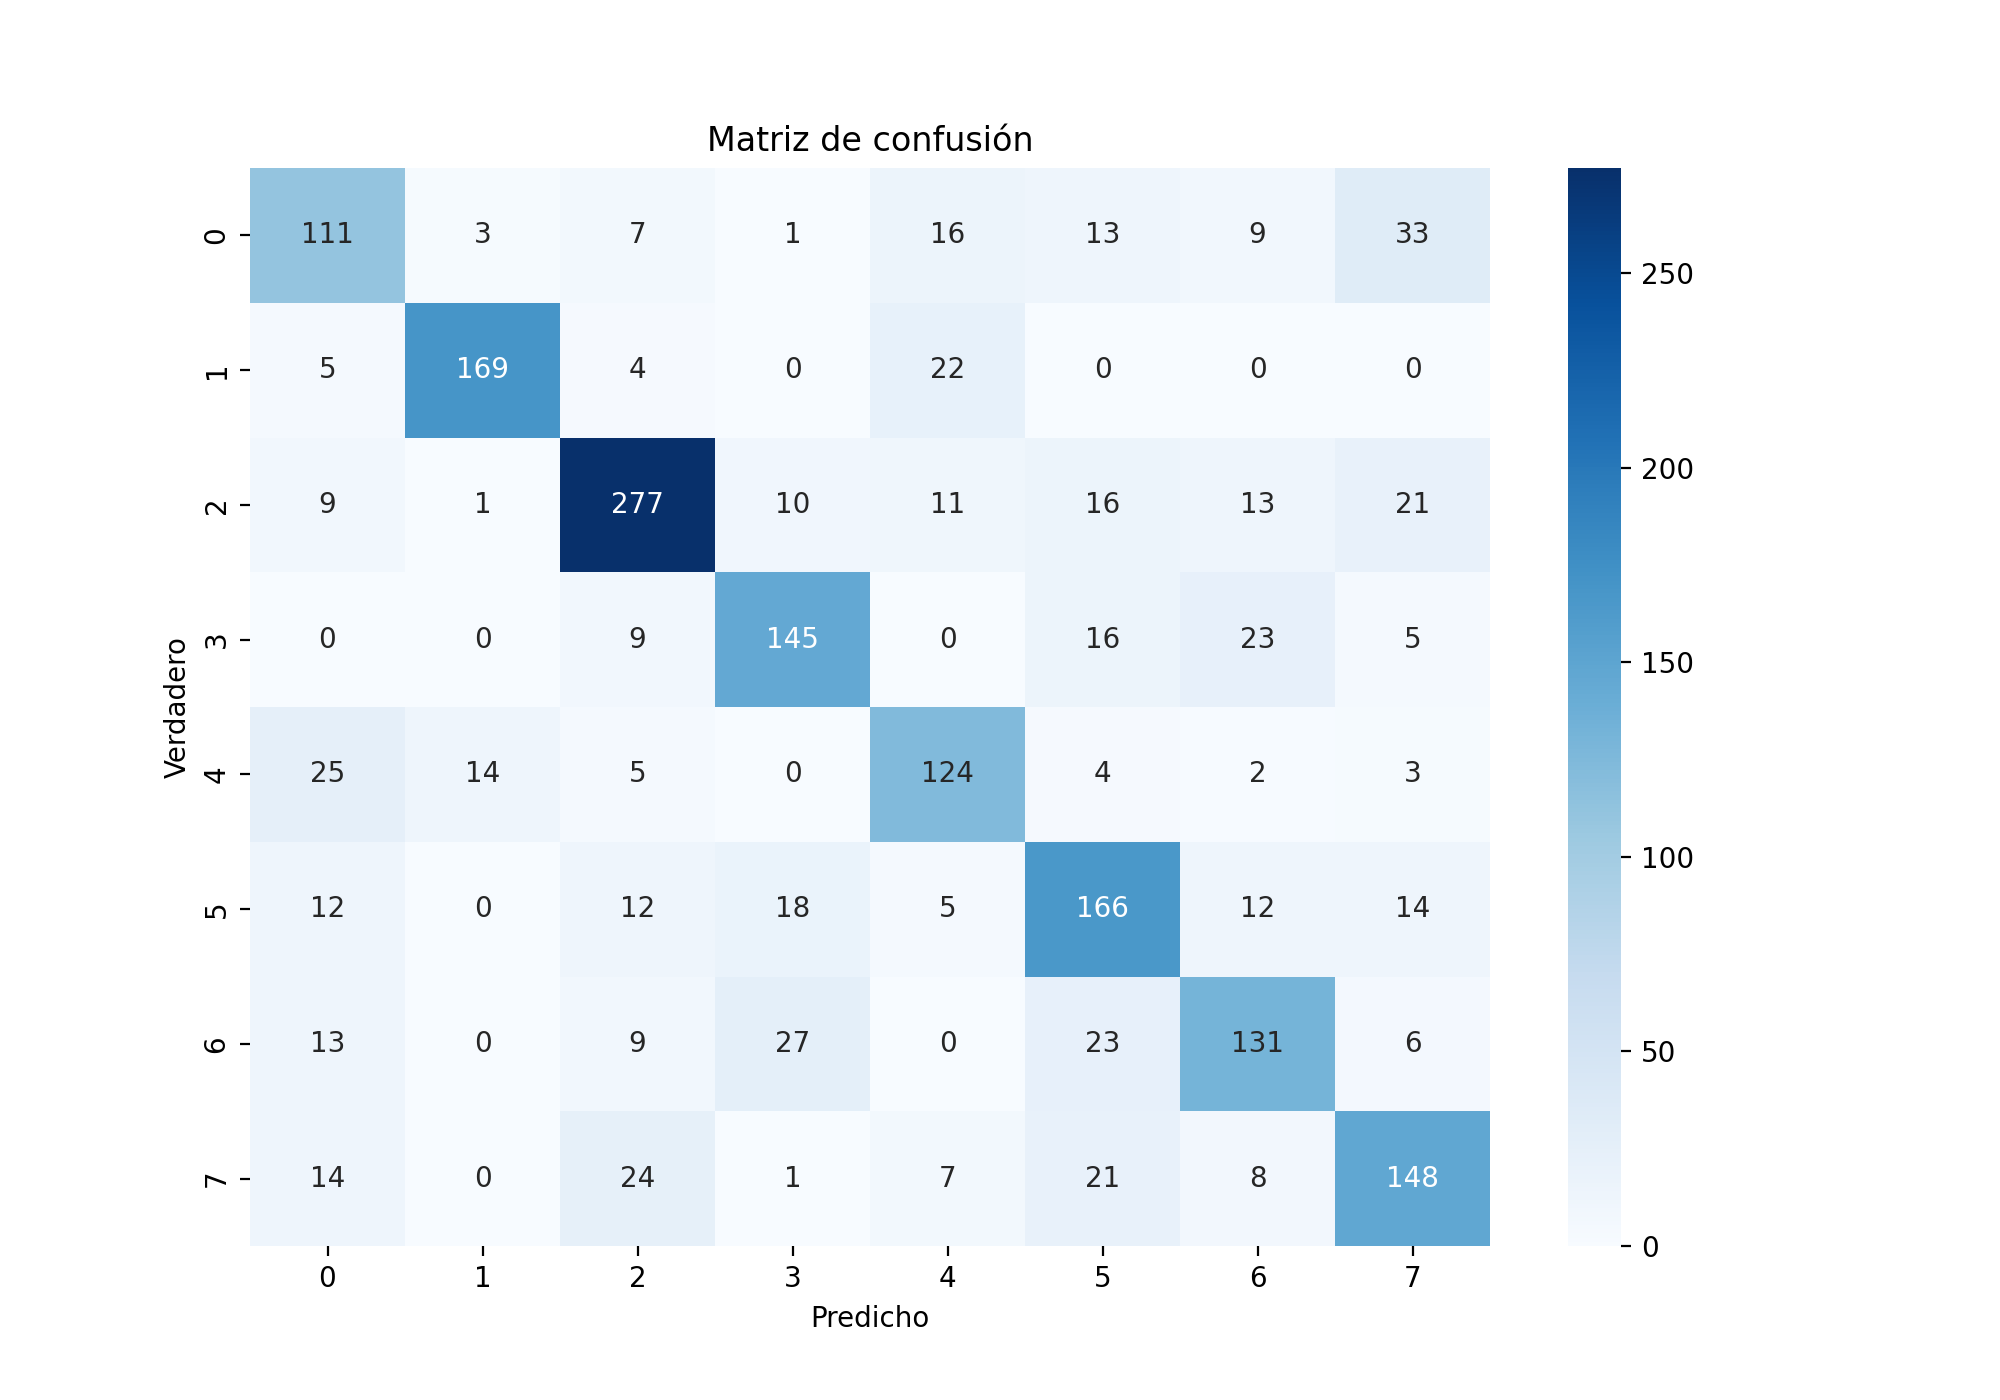

In [218]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [219]:
# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.69589422 0.68475992 0.71468337 0.71189979 0.69798191]
Precisión media: 0.7010438413361169
Desviación estándar de la precisión: 0.010999532252458878


Aplicamos las predicciones a Dataset con 1.200.000 canciones aprox

In [220]:
df_predictions = pd.read_csv('tracks_features.csv')

df_predictions


id                   name  \
0        7lmeHLHBe4nmXzuXc0HDjk                Testify   
1        1wsRitfRRtWyEapl0q22o8        Guerrilla Radio   
2        1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb   
3        2lbASgTSoDO7MTuLAXlTW0              Mic Check   
4        1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire   
...                         ...                    ...   
1204020  0EsMifwUmMfJZxzoMPXJKZ         Gospel of Juke   
1204021  2WSc2TB1CSJgGE0PEzVeiu          Prism Visions   
1204022  6iProIgUe3ETpO6UT0v5Hg              Tokyo 360   
1204023  37B4SXC8uoBsUyKCWnhPfX                 Yummy!   
1204024  3GgQmOxxLyRoAb4j86zOBX   That's The Way It Is   

                             album                album_id  \
0        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
1        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
2        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
3        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
4        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
...                            ...                     ...   
1204020                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204021                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204022                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204023                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   
1204024                 Notch - EP  38O5Ys0W9PFS5K7dMb7yKb   

                              artists                  artist_ids  \
0        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
1        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
2        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
3        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
4        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
...                               ...                         ...   
1204020                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204021                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204022                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204023                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   
1204024                   ['FVLCRVM']  ['7AjItKsRnEYRSiBt2OxK1y']   

         track_number  disc_number  explicit  danceability  ...  speechiness  \
0                   1            1     False          0.47  ...         0.07   
1                   2            1      True          0.60  ...         0.19   
2                   3            1     False          0.32  ...         0.48   
3                   4            1      True          0.44  ...         0.24   
4                   5            1     False          0.43  ...         0.07   
...               ...          ...       ...           ...  ...          ...   
1204020             2            1     False          0.26  ...         0.07   
1204021             3            1     False          0.80  ...         0.09   
1204022             4            1     False          0.79  ...         0.06   
1204023             5            1     False          0.67  ...         0.04   
1204024             6            1     False          0.74  ...         0.05   

         acousticness  instrumentalness  liveness  valence  tempo  \
0                0.03              0.00      0.36     0.50 117.91   
1                0.01              0.00      0.15     0.49 103.68   
2                0.02              0.00      0.12     0.37 149.75   
3                0.16              0.00      0.12     0.57  96.75   
4                0.00              0.10      0.08     0.54 127.06   
...               ...               ...       ...      ...    ...   
1204020          0.01              0.00      0.34     0.41 159.59   
1204021          0.10              0.64      0.07     0.78 121.98   
1204022          0.03              0.92      0.07     0.47 122.00   
1204023          0.00              0.78      0.12     0.23 124.99   
1204024          0.02              0.3

Aplicamos las predicciones a Dataset con 1.200.000 canciones aprox

In [221]:
df_predictions.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [222]:
df_predictions_cleaned = df_predictions.drop(['id', 'album_id', 'artist_ids',
                'track_number','disc_number','explicit','release_date'], axis=1)




In [223]:
df_predictions_cleaned.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    1204025.00 1204025.00 1204025.00 1204025.00 1204025.00   1204025.00   
mean           0.49       0.51       5.19     -11.81       0.67         0.08   
std            0.19       0.29       3.54       6.98       0.47         0.12   
min            0.00       0.00       0.00     -60.00       0.00         0.00   
25%            0.36       0.25       2.00     -15.25       0.00         0.04   
50%            0.50       0.52       5.00      -9.79       1.00         0.04   
75%            0.63       0.77       8.00      -6.72       1.00         0.07   
max            1.00       1.00      11.00       7.23       1.00         0.97   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    1204025.00        1204025.00 1204025.00 1204025.00 1204025.00   
mean           0.45              0.28       0.20       0.43     117.63   
std            0.39              0.38       0.18       0.27      30.94   
min            0.00              0.00       0.00       0.00       0.00   
25%            0.04              0.00       0.10       0.19      94.05   
50%            0.39              0.01       0.12       0.40     116.73   
75%            0.86              0.72       0.24       0.64     137.05   
max            1.00              1.00       1.00       1.00     248.93   

       duration_ms  time_signature       year  
count   1204025.00      1204025.00 1204025.00  
mean     248839.86            3.83    2007.33  
std      162210.36            0.56      12.10  
min        1000.00            0.00       0.00  
25%      174090.00            4.00    2002.00  
50%      224339.00            4.00    2009.00  
75%      285840.00            4.00    2015.00  
max     6061090.00            5.00    2020.00

In [224]:
df_predictions_cleaned.isnull().sum()

name                0
album               0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
dtype: int64

In [225]:
filas_con_nulos = df_predictions_cleaned.isnull().any(axis=1)


print("Filas con al menos un valor nulo:")
df_predictions_cleaned[filas_con_nulos]

Filas con al menos un valor nulo:


Empty DataFrame
Columns: [name, album, artists, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, year]
Index: []

In [226]:
df_predictions_final = df_predictions_cleaned.dropna()

df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                              artists  danceability  energy  key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98    7     -5.40   
1        ['Rage Against The Machine']          0.60    0.96   11     -5.76   
2        ['Rage Against The Machine']          0.32    0.97    7     -5.42   
3        ['Rage Against The Machine']          0.44    0.97   11     -5.83   
4        ['Rage Against The Machine']          0.43    0.93    2     -6.73   
...                               ...           ...     ...  ...       ...   
1204020                   ['FVLCRVM']          0.26    0.97    5     -6.97   
1204021                   ['FVLCRVM']          0.80    0.70   11     -6.60   
1204022                   ['FVLCRVM']          0.79    0.80    9     -5.96   
1204023                   ['FVLCRVM']          0.67    0.86    6     -6.79   
1204024                   ['FVLCRVM']          0.74    0.71    2     -9.28   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0           1         0.07          0.03              0.00      0.36     0.50   
1           1         0.19          0.01              0.00      0.15     0.49   
2           1         0.48          0.02              0.00      0.12     0.37   
3           0         0.24          0.16              0.00      0.12     0.57   
4           1         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1204020     0         0.07          0.01              0.00      0.34     0.41   
1204021     0         0.09          0.10              0.64      0.07     0.78   
1204022     0         0.06          0.03              0.92      0.07     0.47   
1204023     0         0.04          0.00              0.78      0.12     0.23   
1204024     0         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  
0       117.91       210133            4.00  1999  
1       103.68       206200            4.00  1999  
2       149.75       298893            4.00  1999  
3        96.75       213640            4.00  1999  
4       127.06       205600            4.00  1999  
...        ...          ...             ...   ...  
1204020 159.59       276213            4.00  2014  
1204021 121.98       363179            4.00  2014  
1204022 122.00       385335            4.00  2014  
1204023 124.99       324455            4.00  2014  
1204024 117.99       304982            4.00  2014  

[1204025 rows x 17 columns]

In [227]:
df_predictions_final.reset_index(drop=True, inplace=True)

df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                              artists  danceability  energy  key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98    7     -5.40   
1        ['Rage Against The Machine']          0.60    0.96   11     -5.76   
2        ['Rage Against The Machine']          0.32    0.97    7     -5.42   
3        ['Rage Against The Machine']          0.44    0.97   11     -5.83   
4        ['Rage Against The Machine']          0.43    0.93    2     -6.73   
...                               ...           ...     ...  ...       ...   
1204020                   ['FVLCRVM']          0.26    0.97    5     -6.97   
1204021                   ['FVLCRVM']          0.80    0.70   11     -6.60   
1204022                   ['FVLCRVM']          0.79    0.80    9     -5.96   
1204023                   ['FVLCRVM']          0.67    0.86    6     -6.79   
1204024                   ['FVLCRVM']          0.74    0.71    2     -9.28   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0           1         0.07          0.03              0.00      0.36     0.50   
1           1         0.19          0.01              0.00      0.15     0.49   
2           1         0.48          0.02              0.00      0.12     0.37   
3           0         0.24          0.16              0.00      0.12     0.57   
4           1         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1204020     0         0.07          0.01              0.00      0.34     0.41   
1204021     0         0.09          0.10              0.64      0.07     0.78   
1204022     0         0.06          0.03              0.92      0.07     0.47   
1204023     0         0.04          0.00              0.78      0.12     0.23   
1204024     0         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  
0       117.91       210133            4.00  1999  
1       103.68       206200            4.00  1999  
2       149.75       298893            4.00  1999  
3        96.75       213640            4.00  1999  
4       127.06       205600            4.00  1999  
...        ...          ...             ...   ...  
1204020 159.59       276213            4.00  2014  
1204021 121.98       363179            4.00  2014  
1204022 122.00       385335            4.00  2014  
1204023 124.99       324455            4.00  2014  
1204024 117.99       304982            4.00  2014  

[1204025 rows x 17 columns]

In [228]:
df_predictions_final['year'] = df_predictions_final['year'].astype('int64')

In [229]:
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("[", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("]", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("'", "")

print(df_predictions_final['artists'])

0          Rage Against The Machine
1          Rage Against The Machine
2          Rage Against The Machine
3          Rage Against The Machine
4          Rage Against The Machine
                     ...           
1204020                     FVLCRVM
1204021                     FVLCRVM
1204022                     FVLCRVM
1204023                     FVLCRVM
1204024                     FVLCRVM
Name: artists, Length: 1204025, dtype: object


In [230]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year'],
      dtype='object')

In [231]:
df_features_2 = df_predictions_final.drop([ 'name', 'album','artists','year','mode','key'], axis=1)

In [232]:
df_features_2

danceability  energy  loudness  speechiness  acousticness  \
0                0.47    0.98     -5.40         0.07          0.03   
1                0.60    0.96     -5.76         0.19          0.01   
2                0.32    0.97     -5.42         0.48          0.02   
3                0.44    0.97     -5.83         0.24          0.16   
4                0.43    0.93     -6.73         0.07          0.00   
...               ...     ...       ...          ...           ...   
1204020          0.26    0.97     -6.97         0.07          0.01   
1204021          0.80    0.70     -6.60         0.09          0.10   
1204022          0.79    0.80     -5.96         0.06          0.03   
1204023          0.67    0.86     -6.79         0.04          0.00   
1204024          0.74    0.71     -9.28         0.05          0.02   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                    0.00      0.36     0.50 117.91       210133   
1                    0.00      0.15     0.49 103.68       206200   
2                    0.00      0.12     0.37 149.75       298893   
3                    0.00      0.12     0.57  96.75       213640   
4                    0.10      0.08     0.54 127.06       205600   
...                   ...       ...      ...    ...          ...   
1204020              0.00      0.34     0.41 159.59       276213   
1204021              0.64      0.07     0.78 121.98       363179   
1204022              0.92      0.07     0.47 122.00       385335   
1204023              0.78      0.12     0.23 124.99       324455   
1204024              0.30      0.28     0.20 117.99       304982   

         time_signature  
0                  4.00  
1                  4.00  
2                  4.00  
3                  4.00  
4                  4.00  
...                 ...  
1204020            4.00  
1204021            4.00  
1204022            4.00  
1204023            4.00  
1204024            4.00  

[1204025 rows x 11 columns]

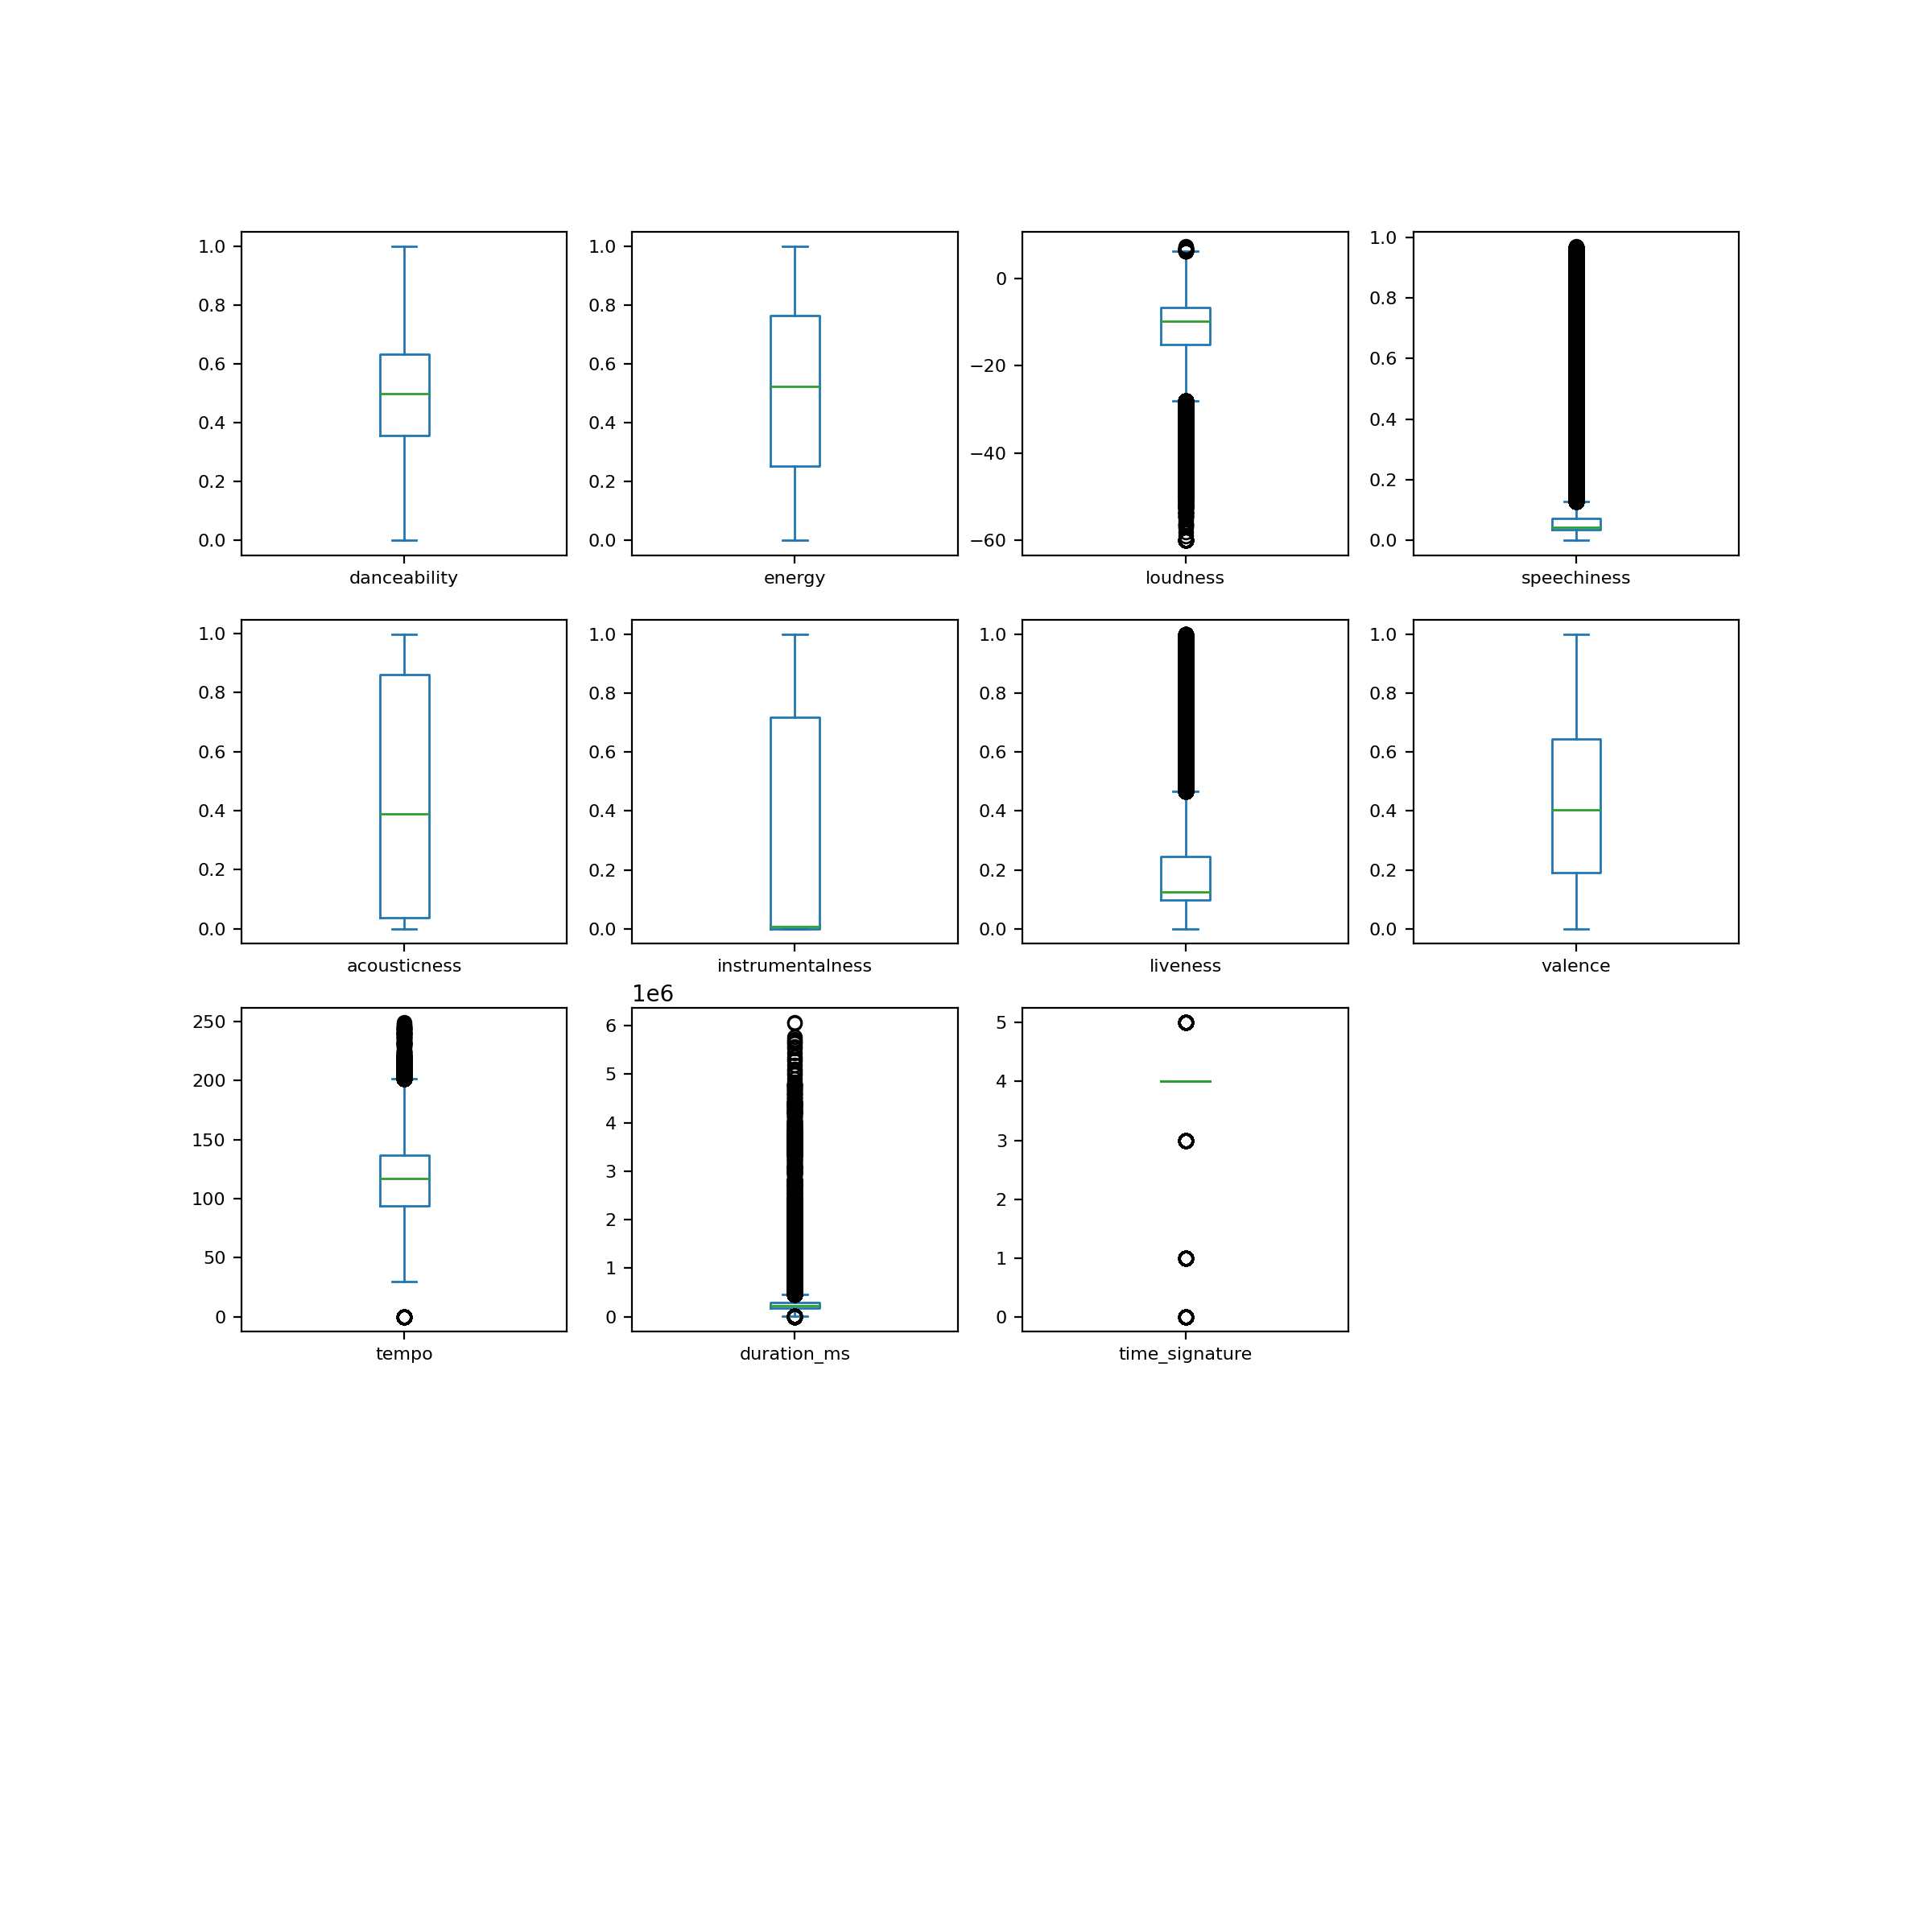

In [233]:
df_features_2.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

In [234]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar todos los datos
df_features_2_scaled = robust_scaler.fit_transform(df_features_2)

# Crear un nuevo DataFrame con los datos escalados
df_features_2_scaled = pd.DataFrame(df_features_2_scaled, columns=df_features_2.columns)

# Mostrar el DataFrame escalado
df_features_2_scaled

danceability  energy  loudness  speechiness  acousticness  \
0               -0.11    0.88      0.51         0.76         -0.44   
1                0.35    0.84      0.47         3.85         -0.46   
2               -0.67    0.87      0.51        11.78         -0.44   
3               -0.22    0.86      0.46         5.17         -0.27   
4               -0.27    0.79      0.36         0.69         -0.47   
...               ...     ...       ...          ...           ...   
1204020         -0.86    0.86      0.33         0.61         -0.46   
1204021          1.06    0.34      0.37         1.17         -0.35   
1204022          1.03    0.53      0.45         0.32         -0.44   
1204023          0.59    0.65      0.35        -0.10         -0.47   
1204024          0.85    0.36      0.06         0.25         -0.45   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                   -0.01      1.56     0.22   0.03        -0.13   
1                   -0.01      0.20     0.19  -0.30        -0.16   
2                   -0.01     -0.02    -0.07   0.77         0.67   
3                   -0.01     -0.03     0.38  -0.46        -0.10   
4                    0.13     -0.31     0.30   0.24        -0.17   
...                   ...       ...      ...    ...          ...   
1204020             -0.01      1.43     0.03   1.00         0.46   
1204021              0.88     -0.34     0.83   0.12         1.24   
1204022              1.27     -0.40     0.14   0.12         1.44   
1204023              1.07     -0.05    -0.39   0.19         0.90   
1204024              0.40      1.04    -0.44   0.03         0.72   

         time_signature  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
...                 ...  
1204020            0.00  
1204021            0.00  
1204022            0.00  
1204023            0.00  
1204024            0.00  

[1204025 rows x 11 columns]

In [235]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_genres = best_model_rf.predict(df_features_2)

In [236]:
predicted_genres

array([7, 7, 7, ..., 2, 2, 2])

In [237]:
df_predictions_final['predicted_genre'] = predicted_genres

In [238]:
df_predictions_final

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  danceability  energy  key  loudness  mode  \
0        Rage Against The Machine          0.47    0.98    7     -5.40     1   
1        Rage Against The Machine          0.60    0.96   11     -5.76     1   
2        Rage Against The Machine          0.32    0.97    7     -5.42     1   
3        Rage Against The Machine          0.44    0.97   11     -5.83     0   
4        Rage Against The Machine          0.43    0.93    2     -6.73     1   
...                           ...           ...     ...  ...       ...   ...   
1204020                   FVLCRVM          0.26    0.97    5     -6.97     0   
1204021                   FVLCRVM          0.80    0.70   11     -6.60     0   
1204022                   FVLCRVM          0.79    0.80    9     -5.96     0   
1204023                   FVLCRVM          0.67    0.86    6     -6.79     0   
1204024                   FVLCRVM          0.74    0.71    2     -9.28     0   

         speechiness  acousticness  instrumentalness  liveness  valence  \
0               0.07          0.03              0.00      0.36     0.50   
1               0.19          0.01              0.00      0.15     0.49   
2               0.48          0.02              0.00      0.12     0.37   
3               0.24          0.16              0.00      0.12     0.57   
4               0.07          0.00              0.10      0.08     0.54   
...              ...           ...               ...       ...      ...   
1204020         0.07          0.01              0.00      0.34     0.41   
1204021         0.09          0.10              0.64      0.07     0.78   
1204022         0.06          0.03              0.92      0.07     0.47   
1204023         0.04          0.00              0.78      0.12     0.23   
1204024         0.05          0.02              0.30      0.28     0.20   

         tempo  duration_ms  time_signature  year  predicted_genre  
0       117.91       210133            4.00  1999                7  
1       103.68       206200            4.00  1999                7  
2       149.75       298893            4.00  1999                7  
3        96.75       213640            4.00  1999                3  
4       127.06       205600            4.00  1999                7  
...        ...          ...             ...   ...              ...  
1204020 159.59       276213            4.00  2014                7  
1204021 121.98       363179            4.00  2014                2  
1204022 122.00       385335            4.00  2014                2  
1204023 124.99       324455            4.00  2014                2  
1204024 117.99       304982            4.00  2014                2  

[1204025 rows x 18 columns]

In [239]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year',
       'predicted_genre'],
      dtype='object')

In [240]:
df_final_genre_predictions = df_predictions_final.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature' ], axis=1)

df_final_genre_predictions

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  year  predicted_genre  
0        Rage Against The Machine  1999                7  
1        Rage Against The Machine  1999                7  
2        Rage Against The Machine  1999                7  
3        Rage Against The Machine  1999                3  
4        Rage Against The Machine  1999                7  
...                           ...   ...              ...  
1204020                   FVLCRVM  2014                7  
1204021                   FVLCRVM  2014                2  
1204022                   FVLCRVM  2014                2  
1204023                   FVLCRVM  2014                2  
1204024                   FVLCRVM  2014                2  

[1204025 rows x 5 columns]

In [241]:
#mapeo de géneros
genre_mapping = dict(zip(codigos_asignados, equivalentes_originales))

# reemplazamos los códigos en el DataFrame
df_final_genre_predictions['predicted_genre'] = df_final_genre_predictions['predicted_genre'].map(genre_mapping)

df_final_genre_predictions

name                      album  \
0                      Testify  The Battle Of Los Angeles   
1              Guerrilla Radio  The Battle Of Los Angeles   
2             Calm Like a Bomb  The Battle Of Los Angeles   
3                    Mic Check  The Battle Of Los Angeles   
4        Sleep Now In the Fire  The Battle Of Los Angeles   
...                        ...                        ...   
1204020         Gospel of Juke                 Notch - EP   
1204021          Prism Visions                 Notch - EP   
1204022              Tokyo 360                 Notch - EP   
1204023                 Yummy!                 Notch - EP   
1204024   That's The Way It Is                 Notch - EP   

                          artists  year predicted_genre  
0        Rage Against The Machine  1999            rock  
1        Rage Against The Machine  1999            rock  
2        Rage Against The Machine  1999            rock  
3        Rage Against The Machine  1999          hiphop  
4        Rage Against The Machine  1999            rock  
...                           ...   ...             ...  
1204020                   FVLCRVM  2014            rock  
1204021                   FVLCRVM  2014      electronic  
1204022                   FVLCRVM  2014      electronic  
1204023                   FVLCRVM  2014      electronic  
1204024                   FVLCRVM  2014      electronic  

[1204025 rows x 5 columns]

In [242]:
df_pop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'pop']

df_pop.head()

name           album                  artists  year  \
23   Do It for Love  Do It for Love  Daryl Hall & John Oates  2018   
25  Forever for You  Do It for Love  Daryl Hall & John Oates  2018   
27      Getaway Car  Do It for Love  Daryl Hall & John Oates  2018   
28    Make You Stay  Do It for Love  Daryl Hall & John Oates  2018   
29          Miss DJ  Do It for Love  Daryl Hall & John Oates  2018   

   predicted_genre  
23             pop  
25             pop  
27             pop  
28             pop  
29             pop

In [243]:
df_classical= df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'classical']

df_classical.head()

name                        album         artists  year  \
53       Train In The Rain            Dart To The Heart  Bruce Cockburn  1994   
408                 Marvel                   Martin Rev      Martin Rev  2002   
409                 5 To 5                   Martin Rev      Martin Rev  2002   
417  All Through The Night  Holiday Songs And Lullabies    Shawn Colvin  1998   
425        Close Your Eyes  Holiday Songs And Lullabies    Shawn Colvin  1998   

    predicted_genre  
53        classical  
408       classical  
409       classical  
417       classical  
425       classical

In [244]:
rock_artists_df = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'rock']

rock_artists_df.head()

name                      album                   artists  \
0                Testify  The Battle Of Los Angeles  Rage Against The Machine   
1        Guerrilla Radio  The Battle Of Los Angeles  Rage Against The Machine   
2       Calm Like a Bomb  The Battle Of Los Angeles  Rage Against The Machine   
4  Sleep Now In the Fire  The Battle Of Los Angeles  Rage Against The Machine   
5   Born of a Broken Man  The Battle Of Los Angeles  Rage Against The Machine   

   year predicted_genre  
0  1999            rock  
1  1999            rock  
2  1999            rock  
4  1999            rock  
5  1999            rock

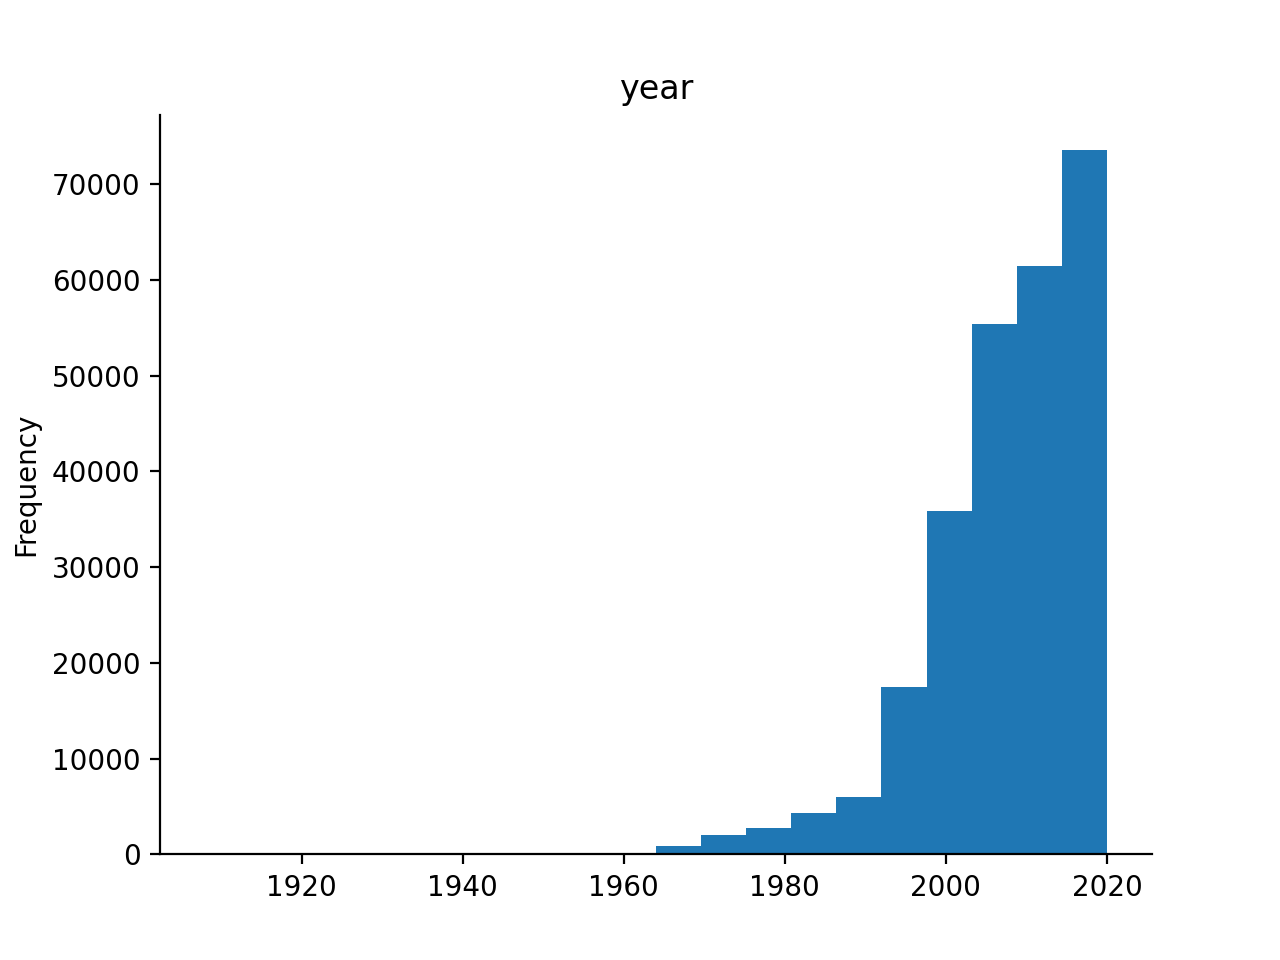

In [245]:
# @title year

from matplotlib import pyplot as plt
rock_artists_df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [246]:
df_jazz = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'jazz']

df_jazz.head()


name              album         artists  year  \
50    Burden Of The Angel/Beast  Dart To The Heart  Bruce Cockburn  1994   
63                       Carbon     Scarlet's Walk       Tori Amos  2002   
65                wampum prayer     Scarlet's Walk       Tori Amos  2002   
66  don't make me come to Vegas     Scarlet's Walk       Tori Amos  2002   
68                   Your Cloud     Scarlet's Walk       Tori Amos  2002   

   predicted_genre  
50            jazz  
63            jazz  
65            jazz  
66            jazz  
68            jazz

In [247]:
df_electronic = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'electronic']

df_electronic.head()

name           album     artists  year predicted_genre
45       Out Of My Mind   Fridays Child  Will Young  2003      electronic
75             Virginia  Scarlet's Walk   Tori Amos  2002      electronic
100           Walk Away   Waste Of Mind   zebrahead  1998      electronic
102               Swing   Waste Of Mind   zebrahead  1998      electronic
107  Bootylicious Vinyl   Waste Of Mind   zebrahead  1998      electronic

In [248]:
df_blues = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'blues']

df_blues.head()

name              album         artists  year  \
46              Friday's Child      Fridays Child      Will Young  2003   
47        Listen For The Laugh  Dart To The Heart  Bruce Cockburn  1994   
48     All The Ways I Want You  Dart To The Heart  Bruce Cockburn  1994   
49              Bone In My Ear  Dart To The Heart  Bruce Cockburn  1994   
56  Sunrise On The Mississippi  Dart To The Heart  Bruce Cockburn  1994   

   predicted_genre  
46           blues  
47           blues  
48           blues  
49           blues  
56           blues

In [250]:
df_hiphop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'hiphop']

df_hiphop.head()

name                      album                   artists  \
3             Mic Check  The Battle Of Los Angeles  Rage Against The Machine   
14  Take the Power Back   Rage Against The Machine  Rage Against The Machine   
37            Your Game              Fridays Child                Will Young   
42            Very Kind              Fridays Child                Will Young   
77          Rosaryville                Rosaryville             Kate Campbell   

    year predicted_genre  
3   1999          hiphop  
14  1992          hiphop  
37  2003          hiphop  
42  2003          hiphop  
77  1999          hiphop

In [251]:
df_reggae = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'reggae']

df_reggae.head()

name           album                  artists  year  \
31   Breath of Your Life  Do It for Love  Daryl Hall & John Oates  2018   
33       Heartbreak Time  Do It for Love  Daryl Hall & John Oates  2018   
38              Stronger   Fridays Child               Will Young  2003   
43                  Free   Fridays Child               Will Young  2003   
113            Hurricane       Swing Set             Ani DiFranco  2000   

    predicted_genre  
31           reggae  
33           reggae  
38           reggae  
43           reggae  
113          reggae

In [252]:
# Convertimos predicted_genres: array de NumPy a dataframe
predicted_genres_series = pd.Series(predicted_genres)

# conteo de predicciones para cada género
predictions_count = predicted_genres_series.map(genre_mapping).value_counts()

predictions_count

rock          260144
classical     205875
electronic    189333
blues         157233
jazz          147418
pop           114088
hiphop         80516
reggae         49418
dtype: int64

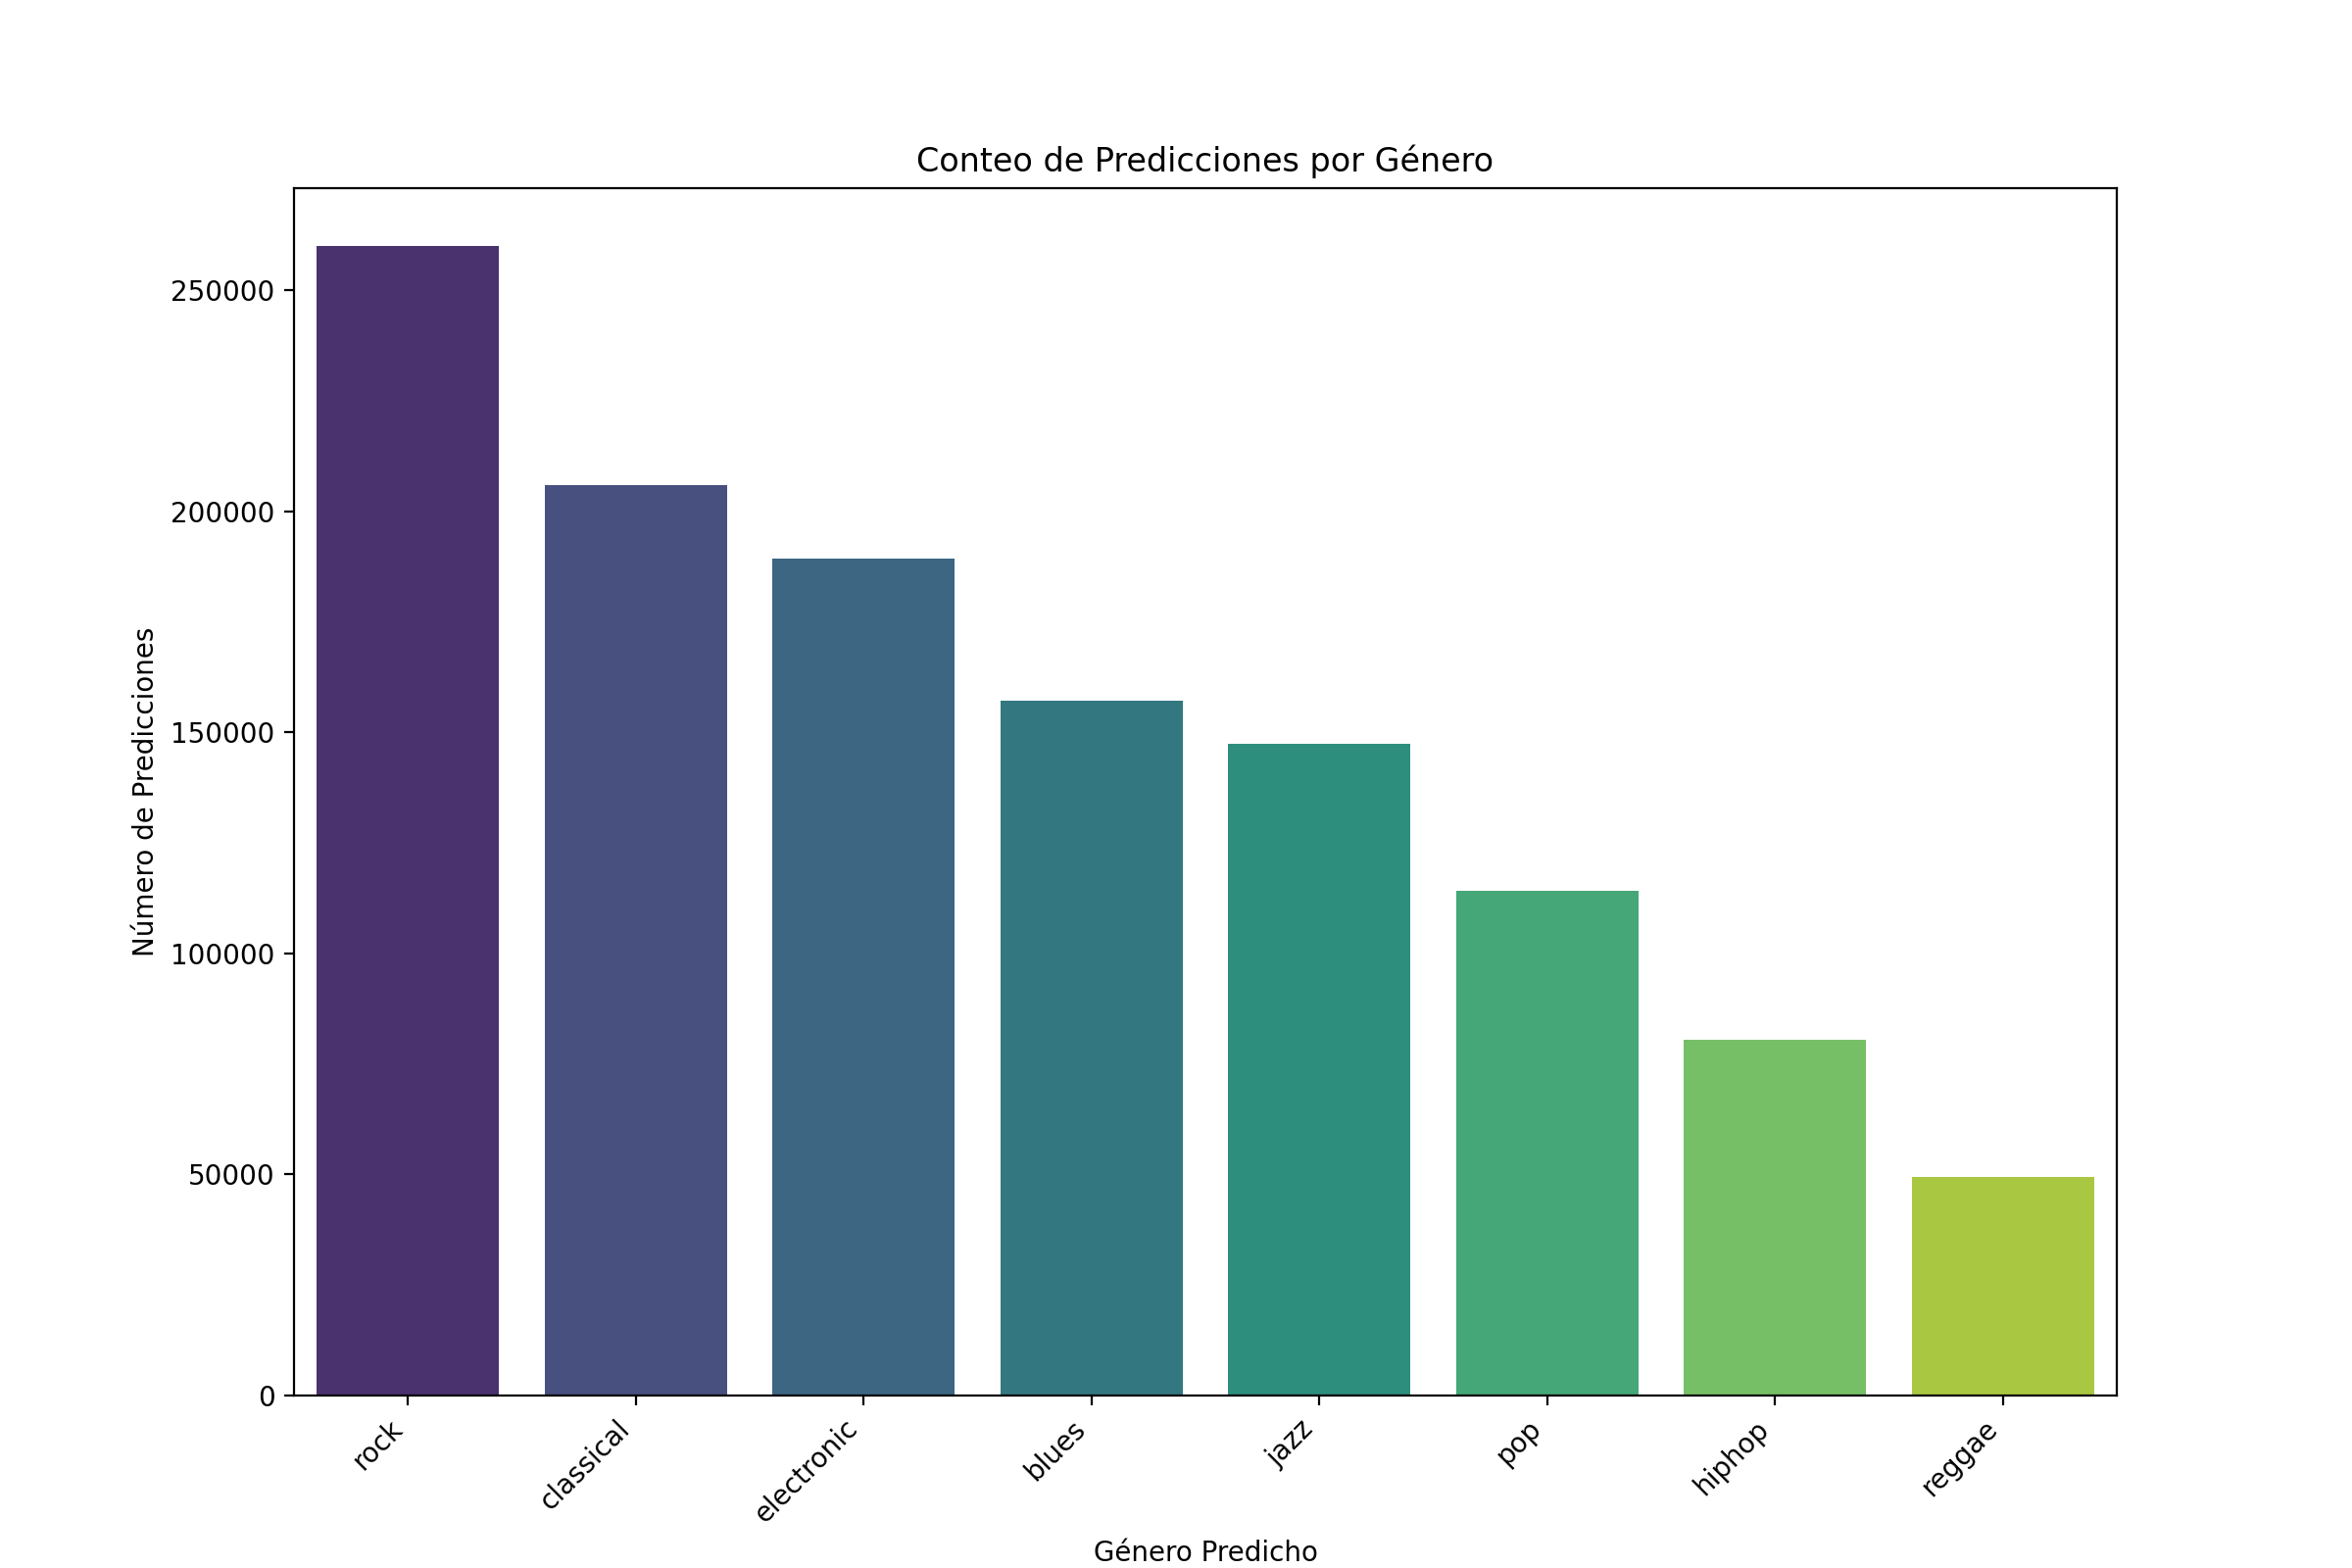

In [253]:
plt.figure(figsize=(12, 8))
sns.barplot(x=predictions_count.index, y=predictions_count.values, palette='viridis')
plt.title('Conteo de Predicciones por Género')
plt.xlabel('Género Predicho')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=45, ha='right')
plt.show()

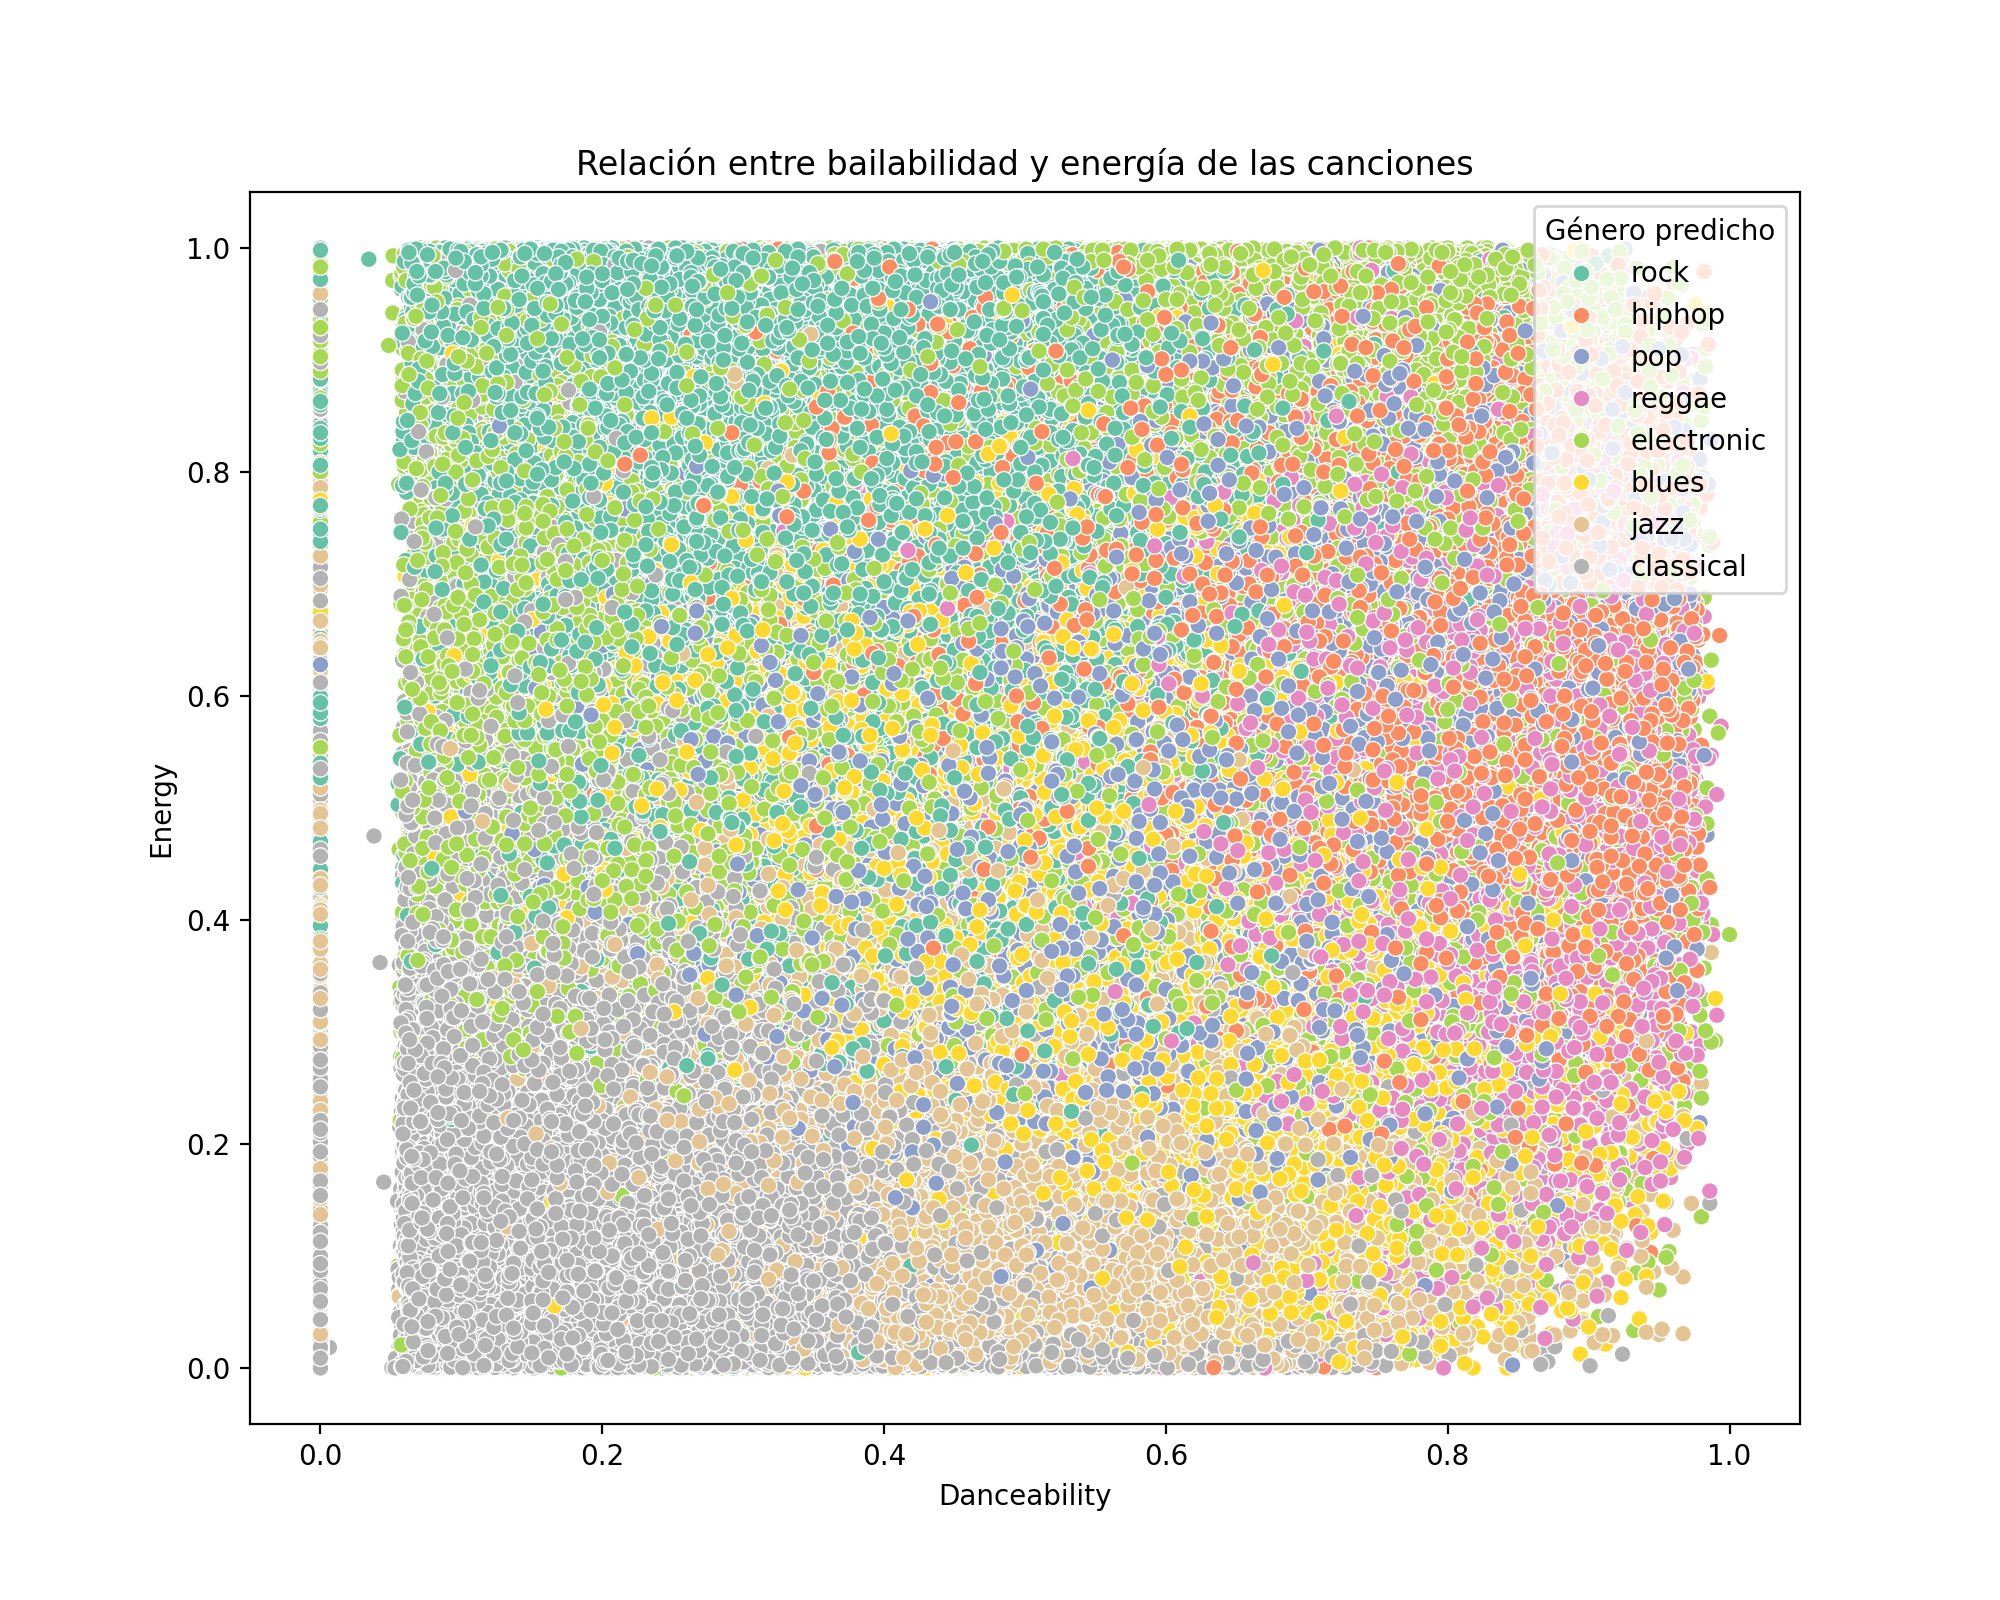

In [254]:
# Invertimos las predicciones a las etiquetas originales
predicted_labels_original = le.inverse_transform(df_predictions_final["predicted_genre"])

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_predictions_final, x="danceability", y="energy", hue=predicted_labels_original, palette="Set2")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Relación entre bailabilidad y energía de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show();

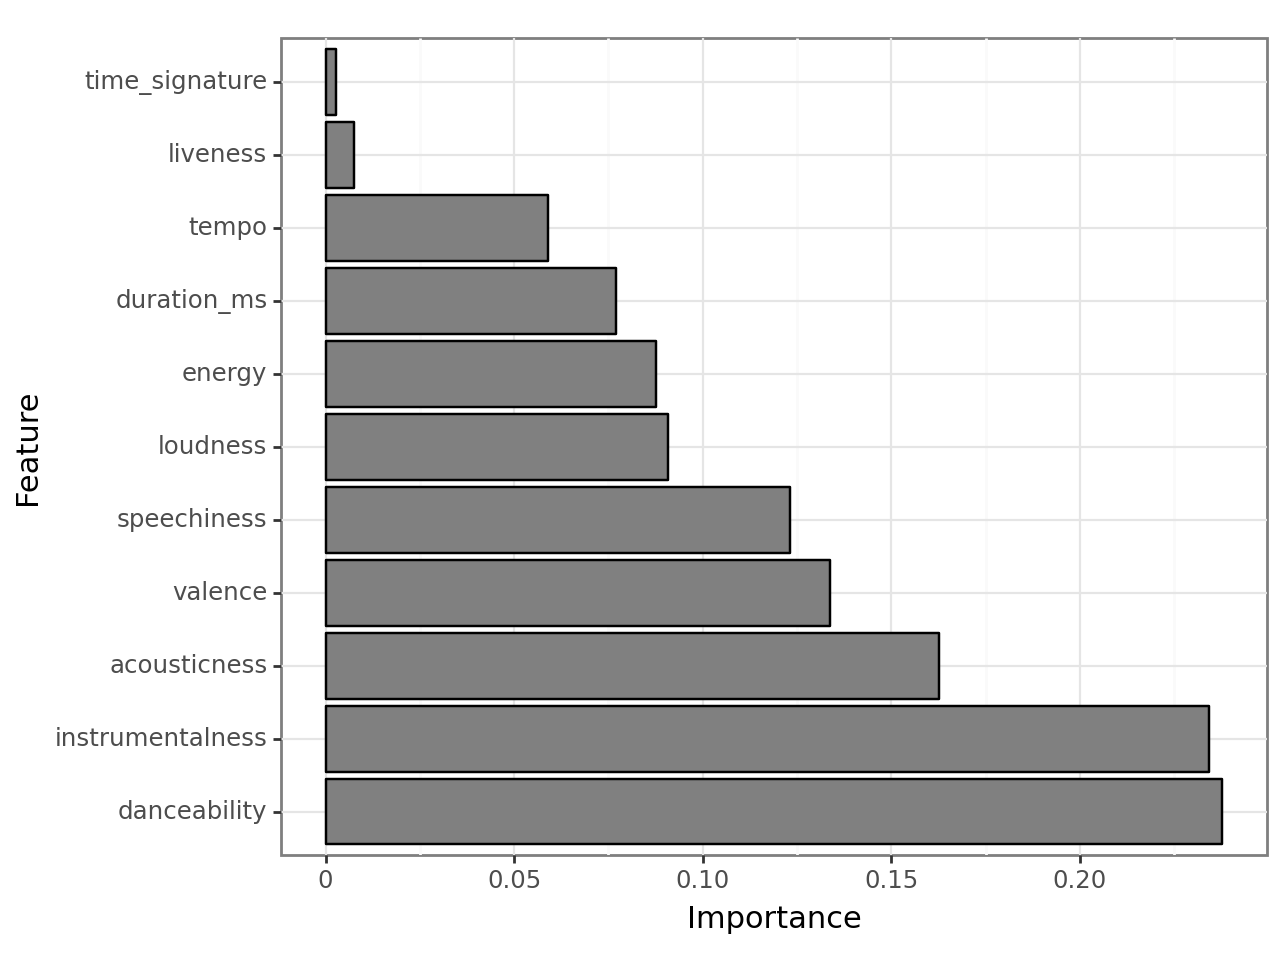

<Figure Size: (640 x 480)>

In [255]:
# Calcular la importancia de las características por permutación
result = permutation_importance(
    rf_clf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

# Crear un dataframe con los resultados
feature_names = X.columns
importances = result.importances_mean
std = result.importances_std
df_importances = pd.DataFrame(
    {"feature": feature_names, "importance": importances, "std": std}
)

# Ordenar el dataframe por importancia decreciente
df_importances = df_importances.sort_values(by="importance", ascending=False)

# Convertir la característica en un factor ordenado
df_importances["feature"] = pd.Categorical(
    df_importances["feature"], categories=df_importances["feature"], ordered=True
)

# Hacer una gráfica de barras con ggplot2
(ggplot(df_importances, aes(x="feature", y="importance")) +
 geom_col(fill="grey", color="black") +
 coord_flip() +
 labs(x="Feature", y="Importance") +
 theme_bw())

array([<Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>], dtype=object)

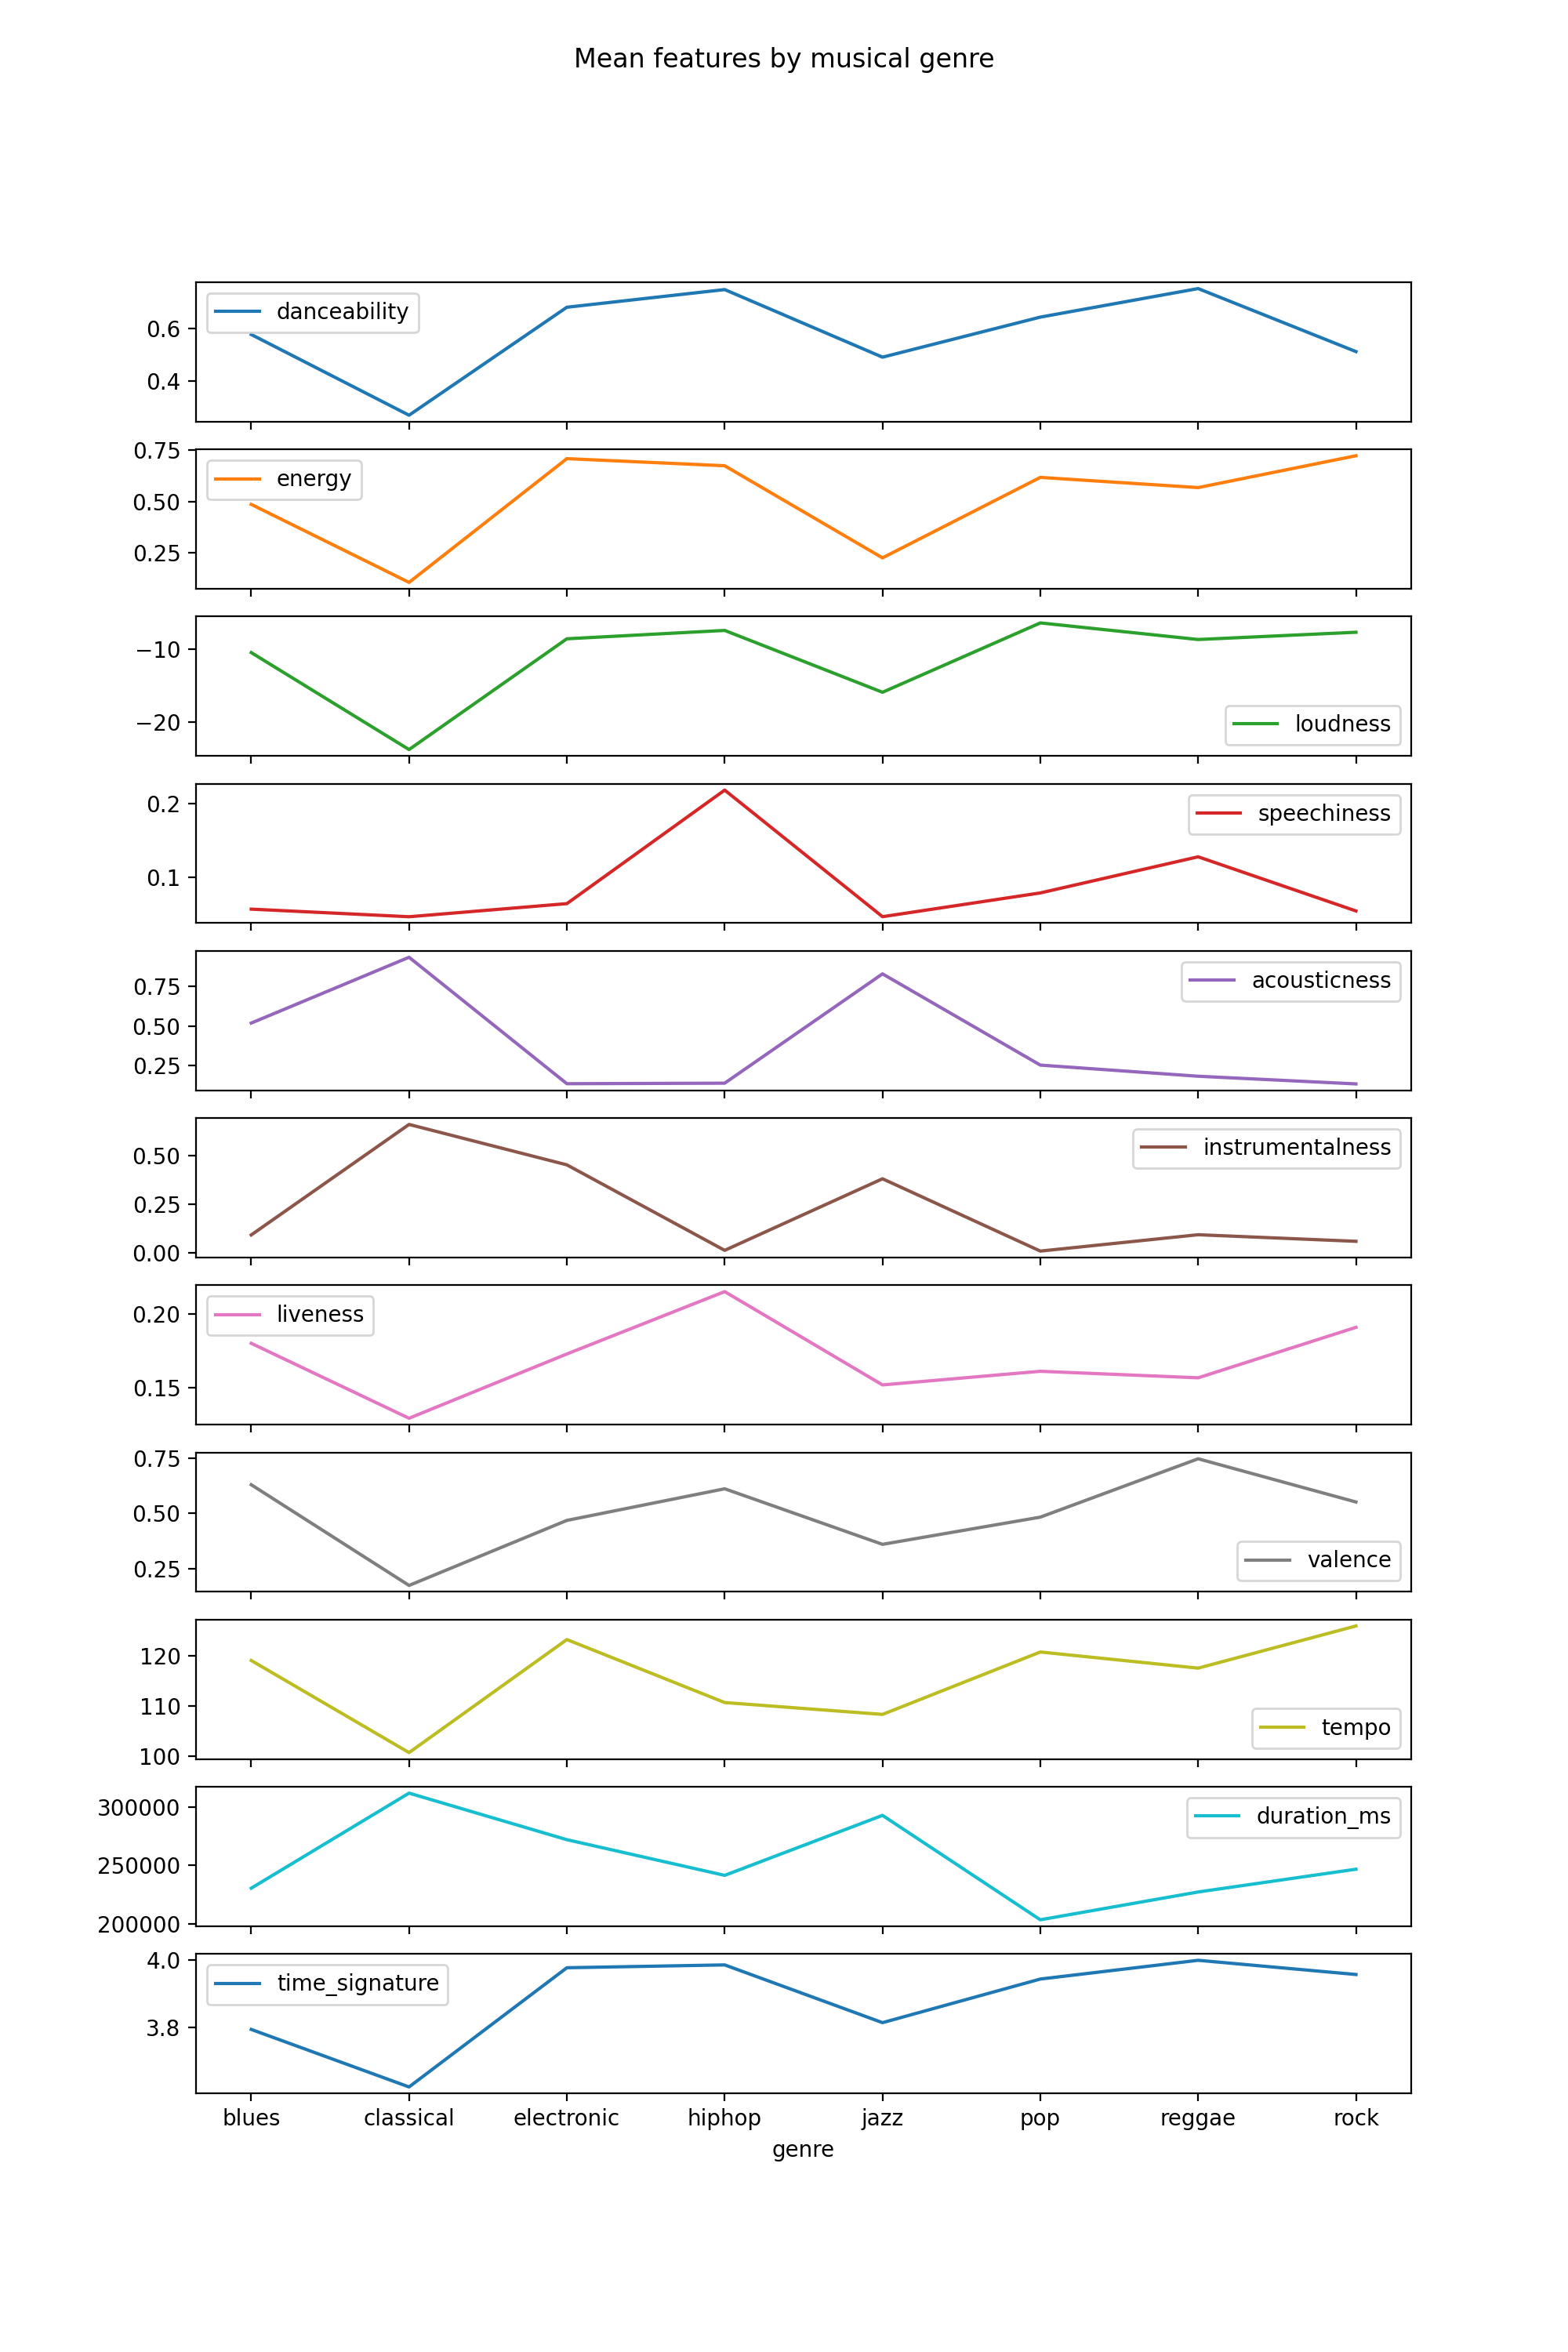

In [256]:
# FEATURES POR GENERO - PRIMER DATASET (TRAIN TEST)

# Agrupar el dataframe por la columna genre y calcular la media de las demás columnas
df_mean_by_genre = df_features.groupby("genre").mean()

# Hacer una gráfica de líneas con el dataframe df_mean_by_genre
df_mean_by_genre.plot(subplots=True, figsize=(10, 15), title="Mean features by musical genre")

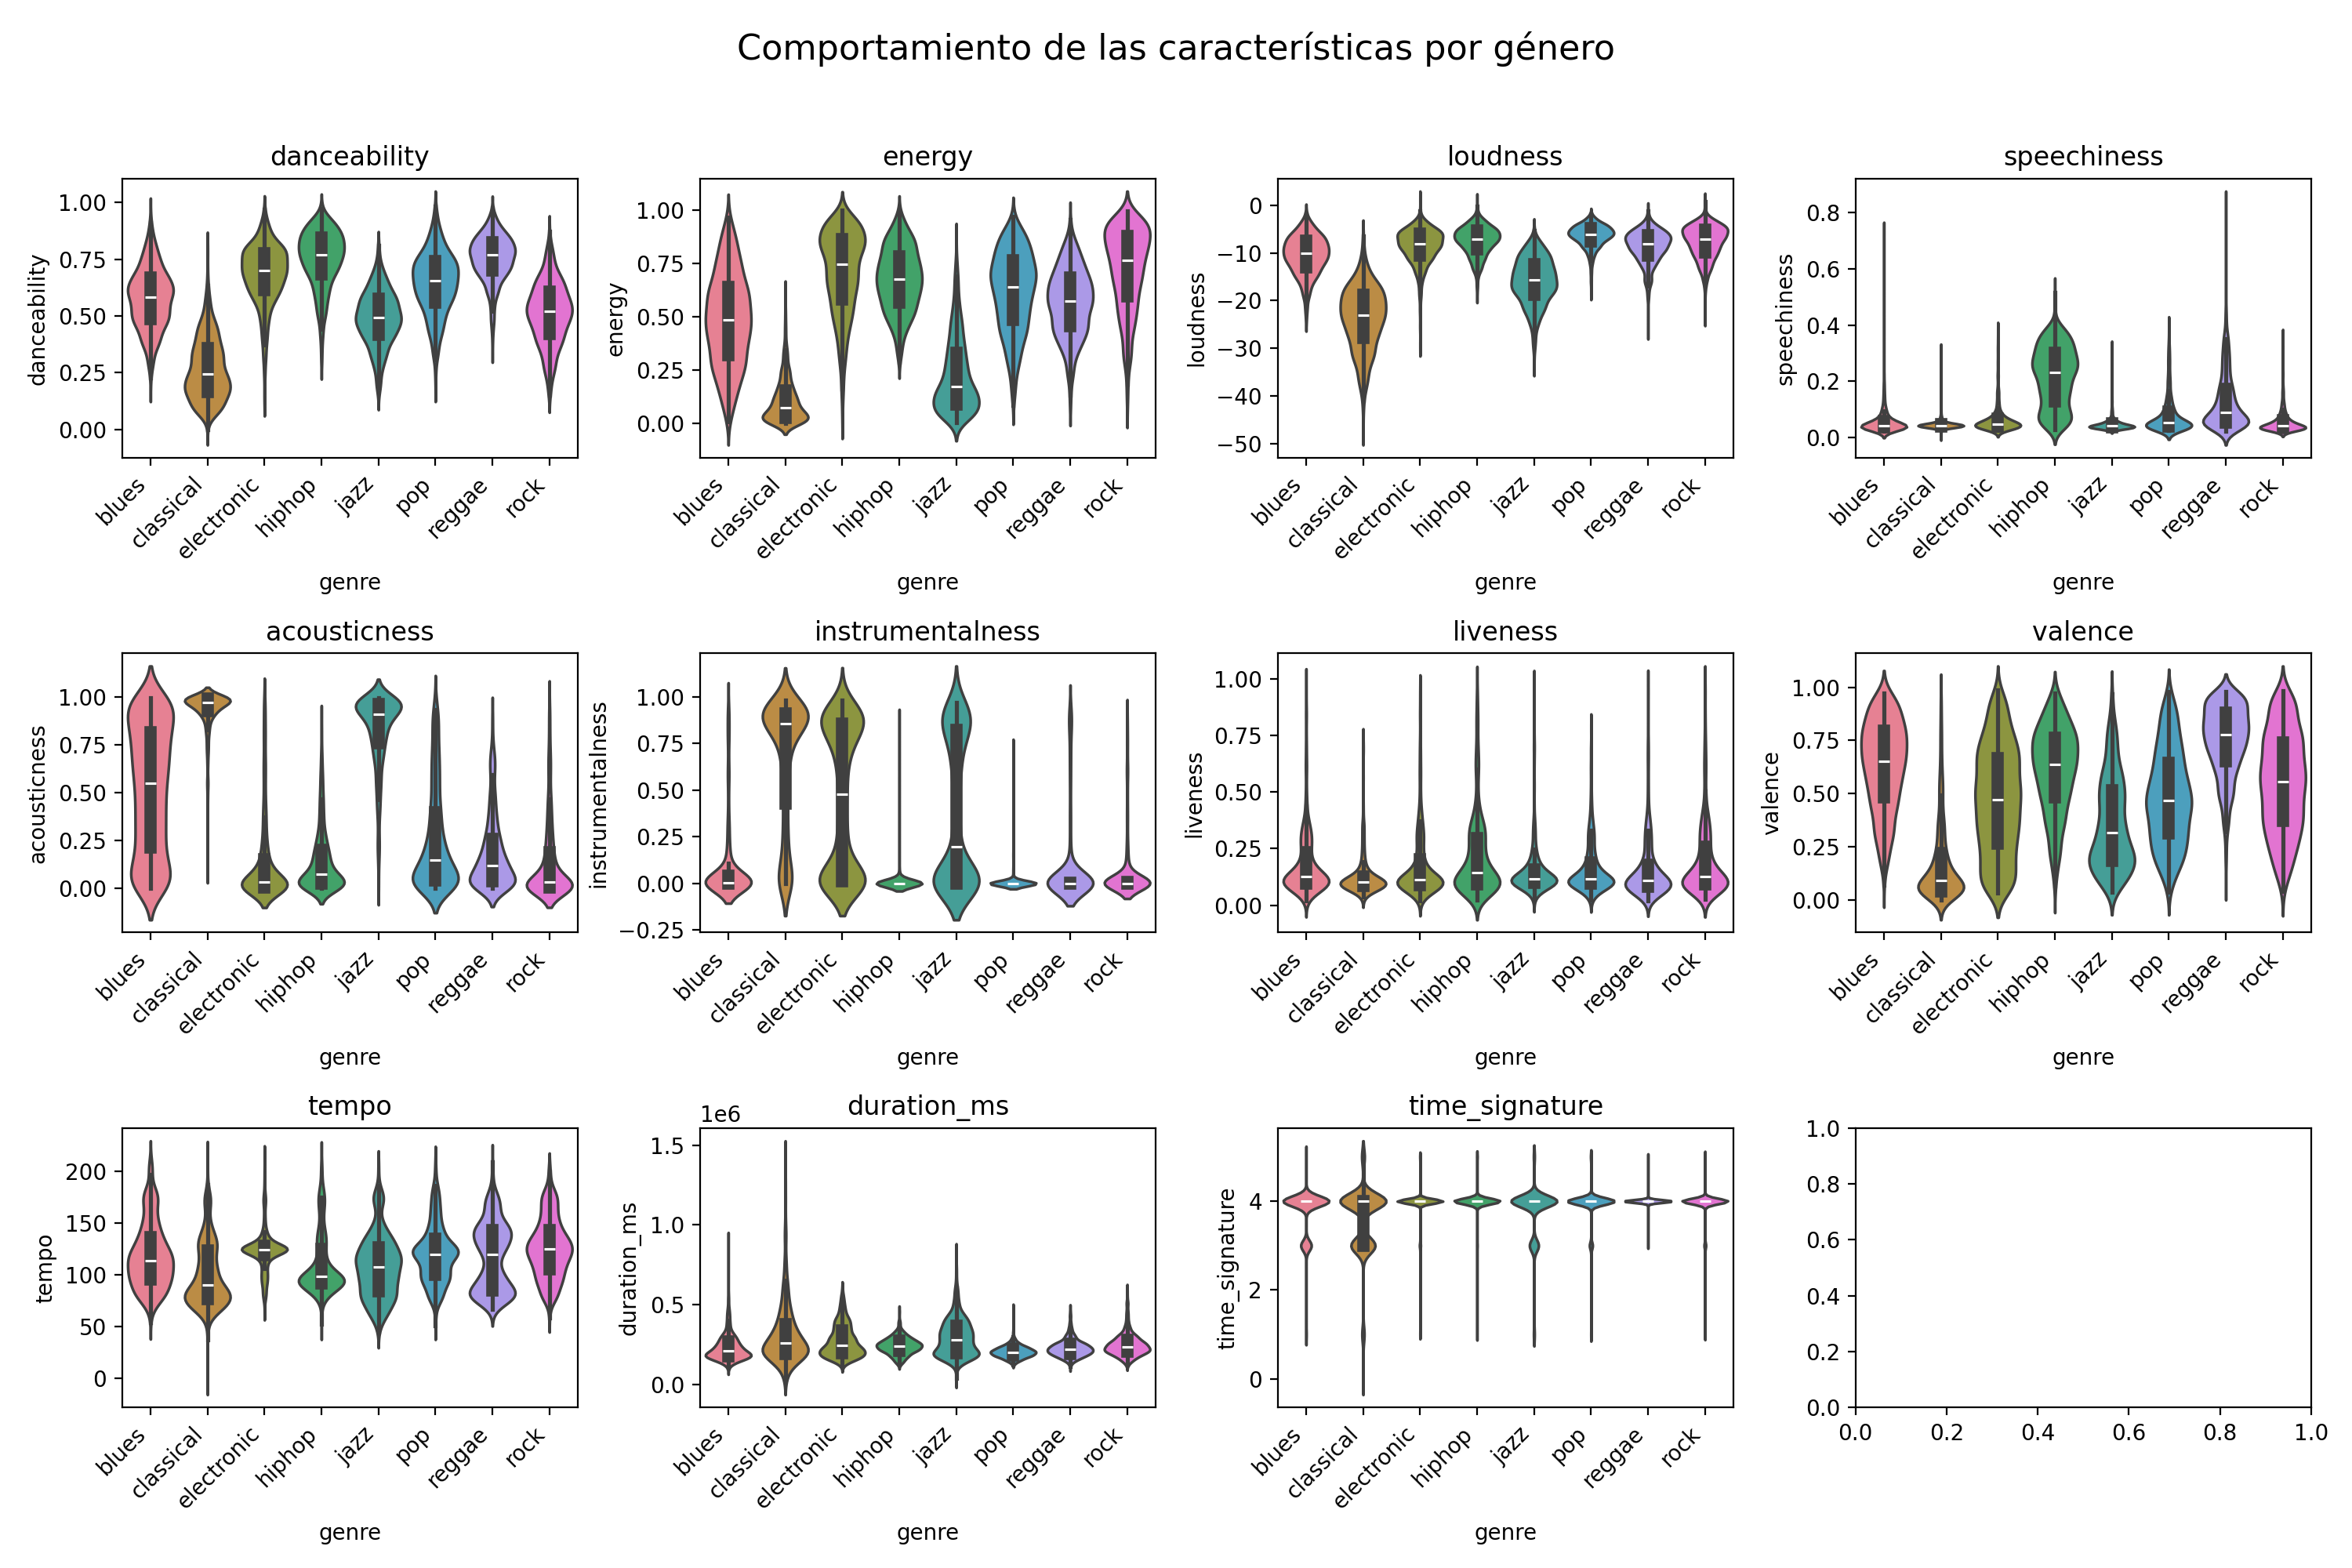

In [257]:
# Crear subplots para cada característica
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Comportamiento de las características por género', fontsize=16)

# Características a graficar
features = df_features.columns[:-1]  # Excluir la columna 'genre'

# Colores para cada género
colors = sns.color_palette("husl", n_colors=len(df_features['genre'].unique()))

# Iterar sobre cada característica y dibujar un gráfico para cada una
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4

    # Crear un gráfico de violín para la característica actual
    sns.violinplot(x='genre', y=feature, data=df_features, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(feature)

    # Rotar las etiquetas del eje x para hacerlas más legibles
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()

In [273]:
def obtener_info_cancion(dataframe, nombre_cancion):
    # Filtrar el DataFrame para encontrar exactamente la canción y obtener su información
    resultados = dataframe[dataframe['name'].str.lower() == nombre_cancion.lower()].drop_duplicates(subset=['name', 'artists', 'album', 'year'])

    # Verificar si se encontró información y mostrar el resultado
    if not resultados.empty:
        for index, row in resultados.iterrows():
            genero = row['predicted_genre']
            artista = row['artists']
            cancion = row['name']
            album = row['album']
            año = row['year']

            print(f"Información para la canción '{cancion}':")
            print(f"  Artista: {artista}")
            print(f"  Género: {genero}")
            print(f"  Álbum: {album}")
            print(f"  Año: {año}")
    else:
        print(f"No se encontró información para la canción '{nombre_cancion}'.")

# Ejemplo de uso
nombre_cancion = input("Introduce el nombre exacto de la canción: ")
obtener_info_cancion(df_final_genre_predictions, nombre_cancion)


Introduce el nombre exacto de la canción: start me up
Información para la canción 'Start Me Up':
  Artista: DJ Roc
  Género: electronic
  Álbum: On the Dancefloor
  Año: 2010
Información para la canción 'Start Me Up':
  Artista: Sebastian
  Género: rock
  Álbum: Sebastian
  Año: 2006
Información para la canción 'Start Me Up':
  Artista: Rockabye Baby!
  Género: jazz
  Álbum: Lullaby Renditions of the Rolling Stones
  Año: 2007
Información para la canción 'Start Me Up':
  Artista: "Pickin On Series"
  Género: blues
  Álbum: Pickin' On The Rolling Stones
  Año: 2000
Información para la canción 'Start Me Up':
  Artista: Mick Jagger And The Rock Hall Jam Band
  Género: rock
  Álbum: Rock and Roll Hall of Fame Volume 1: 1986-1991
  Año: 2011
